In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 1.0 Loading the Datasets

In [3]:
# Load datasets
agric_trade = pd.read_csv("agric_trade.csv", encoding='latin-1')
countries = pd.read_csv("Countries.csv", encoding='latin-1')

In [4]:
import warnings
# Suppress all future warnings
warnings.filterwarnings("ignore")

In [5]:
# Checking the  information about the DataFrame
agric_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Indicator Category                  1048575 non-null  object 
 1   Indicator Code                      1048575 non-null  object 
 2   Indicator                           1048575 non-null  object 
 3   Reporting Economy Code              1048575 non-null  int64  
 4   Reporting Economy ISO3A Code        1048575 non-null  object 
 5   Reporting Economy                   1048575 non-null  object 
 6   Partner Economy Code                1048575 non-null  int64  
 7   Partner Economy ISO3A Code          1024901 non-null  object 
 8   Partner Economy                     1048575 non-null  object 
 9   Product/Sector Classification Code  1048575 non-null  object 
 10  Product/Sector Classification       1048575 non-null  object 
 11  Product/Sec

In [6]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   5106 non-null   object 
 1   Country Code                   5106 non-null   object 
 2   Year                           5106 non-null   int64  
 3   Agriculture (% GDP)            4830 non-null   float64
 4   Ease of Doing Business         4508 non-null   float64
 5   Education Expenditure (% GDP)  4738 non-null   float64
 6   Export (% GDP)                 4646 non-null   float64
 7   GDP                            5037 non-null   float64
 8   Health Expenditure (% GDP)     4531 non-null   float64
 9   Import (% GDP)                 4646 non-null   float64
 10  Industry (% GDP)               4853 non-null   float64
 11  Inflation Rate                 4554 non-null   float64
 12  R&D                            3588 non-null   f

In [7]:
# Checking unique values of the Year column agric_trade dataframe.
unique_years = agric_trade['Year'].unique()

# Display the unique values in the 'Year' column
print(unique_years)

[2003 2002 2014 2015 2017 2016 2004 2005 2006 2007 2008 2009 2010 2011
 2018 2019 2021 2020 2000 2001 2012 2013 2022 1998 1999 1996 1997]


In [8]:
# Checking unique values of the Year column in the countries dataframe.
unique_years = countries['Year'].unique()

# Display the unique values in the 'Year' column
print(unique_years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [9]:
# Removing rows with years 1996 to 1999
years_to_remove = [1996, 1997, 1998, 1999]

# Use boolean indexing to filter out rows with the specified years
agric_trade = agric_trade[~agric_trade['Year'].isin(years_to_remove)]

# Check the updated DataFrame
print(agric_trade)

        Indicator Category Indicator Code  \
0        Bilateral imports      HS_M_0020   
1        Bilateral imports      HS_M_0020   
2        Bilateral imports      HS_M_0020   
3        Bilateral imports      HS_M_0020   
4        Bilateral imports      HS_M_0020   
...                    ...            ...   
1048570  Bilateral imports      HS_M_0020   
1048571  Bilateral imports      HS_M_0020   
1048572  Bilateral imports      HS_M_0020   
1048573  Bilateral imports      HS_M_0020   
1048574  Bilateral imports      HS_M_0020   

                                         Indicator  Reporting Economy Code  \
0        Bilateral imports by MTN product category                       8   
1        Bilateral imports by MTN product category                       8   
2        Bilateral imports by MTN product category                       8   
3        Bilateral imports by MTN product category                       8   
4        Bilateral imports by MTN product category                   

### 1.1 Merging the Datasets

In [11]:
# Merge datasets
merged_data = pd.merge(agric_trade, countries, how='inner', left_on=['Reporting Economy', 'Year'],
                       right_on=['Country Name', 'Year'])

In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820799 entries, 0 to 820798
Data columns (total 48 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Indicator Category                  820799 non-null  object 
 1   Indicator Code                      820799 non-null  object 
 2   Indicator                           820799 non-null  object 
 3   Reporting Economy Code              820799 non-null  int64  
 4   Reporting Economy ISO3A Code        820799 non-null  object 
 5   Reporting Economy                   820799 non-null  object 
 6   Partner Economy Code                820799 non-null  int64  
 7   Partner Economy ISO3A Code          801796 non-null  object 
 8   Partner Economy                     820799 non-null  object 
 9   Product/Sector Classification Code  820799 non-null  object 
 10  Product/Sector Classification       820799 non-null  object 
 11  Product/Sector Code       

##### The combined dataset has some missing values. A deeper analysis is quite relevant at this stage on the missing values and how to treat them.

In [14]:
merged_data.isnull().sum()

Indicator Category                         0
Indicator Code                             0
Indicator                                  0
Reporting Economy Code                     0
Reporting Economy ISO3A Code               0
Reporting Economy                          0
Partner Economy Code                       0
Partner Economy ISO3A Code             19003
Partner Economy                            0
Product/Sector Classification Code         0
Product/Sector Classification              0
Product/Sector Code                        0
Product/Sector                             0
Period Code                                0
Period                                     0
Frequency Code                             0
Frequency                                  0
Unit Code                                  0
Unit                                       0
Year                                       0
Value Flag Code                       820799
Value Flag                            820799
Text Value

### 2.0 Data Preprocessing 

In [16]:
# Collecting columns to drop
columns_to_remove = [
    'Indicator Category', 'Indicator Code', 'Indicator',
    'Reporting Economy Code', 'Reporting Economy ISO3A Code',
    'Partner Economy Code', 'Partner Economy ISO3A Code',
    'Product/Sector Classification Code', 'Product/Sector Code',
    'Period Code', 'Period', 'Frequency Code', 'Frequency',
    'Unit Code', 'Unit', 'Value Flag Code', 'Value Flag', 'Country Name',
    'Text Value', 'Export', 'Import', 'Country Code', 'Continent Name','Product/Sector Classification' 
]

# Drop the specified columns
merged_data = merged_data.drop(columns=columns_to_remove)

# Check the updated DataFrame
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820799 entries, 0 to 820798
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Reporting Economy              820799 non-null  object 
 1   Partner Economy                820799 non-null  object 
 2   Product/Sector                 820799 non-null  object 
 3   Year                           820799 non-null  int64  
 4   Value                          820799 non-null  float64
 5   Agriculture (% GDP)            820799 non-null  float64
 6   Ease of Doing Business         813076 non-null  float64
 7   Education Expenditure (% GDP)  820799 non-null  float64
 8   Export (% GDP)                 808783 non-null  float64
 9   GDP                            820799 non-null  float64
 10  Health Expenditure (% GDP)     820799 non-null  float64
 11  Import (% GDP)                 808783 non-null  float64
 12  Industry (% GDP)              

In [17]:
merged_data.describe(include='all')

Reporting Economy Partner Economy              Product/Sector  \
count             820799          820799                      820799   
unique               110             191                          11   
top               Canada           World  Fruits, vegetables, plants   
freq               27319           18471                      105293   
mean                 NaN             NaN                         NaN   
std                  NaN             NaN                         NaN   
min                  NaN             NaN                         NaN   
25%                  NaN             NaN                         NaN   
50%                  NaN             NaN                         NaN   
75%                  NaN             NaN                         NaN   
max                  NaN             NaN                         NaN   

                 Year         Value  Agriculture (% GDP)  \
count   820799.000000  8.207990e+05        820799.000000   
unique            NaN           NaN                  NaN   
top               NaN           NaN                  NaN   
freq              NaN           NaN                  NaN   
mean      2010.566649  2.071380e+07             9.802725   
std          6.048489  3.282922e+08             9.251683   
min       2000.000000  1.100000e-03             0.030137   
25%       2006.000000  1.056584e+04             2.531468   
50%       2011.000000  1.390240e+05             6.846146   
75%       2016.000000  1.651408e+06            14.414020   
max       2022.000000  8.918623e+10            58.756137   

        Ease of Doing Business  Education Expenditure (% GDP)  Export (% GDP)  \
count            813076.000000                  820799.000000   808783.000000   
unique                     NaN                            NaN             NaN   
top                        NaN                            NaN             NaN   
freq                       NaN                            NaN             NaN   
mean                 66.576837                      15.336984       39.428121   
std                  11.440469                       4.562936       29.876850   
min                  31.954950                       4.957300        4.685804   
25%                  58.035590                      12.084870       22.657790   
50%                  66.494670                      14.953590       31.362915   
75%                  76.561156                      18.162519       46.218101   
max                  87.166330                      38.106159      228.993771   

                 GDP  ...           R&D  Service (% GDP)   Unemployment  \
count   8.207990e+05  ...  7.245580e+05    820799.000000  810117.000000   
unique           NaN  ...           NaN              NaN            NaN   
top              NaN  ...           NaN              NaN            NaN   
freq             NaN  ...           NaN              NaN            NaN   
mean    5.798293e+11  ...  1.247051e+10        55.637773       7.009042   
std     1.674403e+12  ...  4.090290e+10        10.219021       5.114363   
min     3.123778e+08  ...  1.808922e+05        25.251129       0.140000   
25%     1.258900e+10  ...  4.250880e+07        48.749133       3.655000   
50%     6.833797e+10  ...  4.143991e+08        55.528256       5.243000   
75%     3.708190e+11  ...  4.595092e+09        63.726144       9.140000   
max     1.782050e+13  ...  3.526424e+11        93.361826      28.770000   

          Population          Land  Education Expenditure  Health Expenditure  \
count   8.207990e+05  8.207990e+05           8.207990e+05        8.207990e+05   
unique           NaN           NaN                    NaN                 NaN   
top              NaN           NaN                    NaN                 NaN   
freq             NaN           NaN                    NaN                 NaN   
mean    8.763065e+07  1.319905e+06           7.260403e+10        3.951853e+10   
std     2.651566e+08  2.614460e+06           1.917492e+11    

Reporting Economy and Partner Economy: The most frequently occurring country in both reporting and partner roles is Canada, with a count of 27,319 occurrences. This suggests that Canada is extensively involved in bilateral trade activities, possibly due to its strong economic ties with various nations.

Product/Sector Classification and Product/Sector: The dominant product/sector classification is "Tariffs - Multilateral Trade Negotiations Products," indicating the prevalence of trade negotiations involving tariffs. Additionally, "Fruits, vegetables, plants" emerges as the most common product or sector, with 123,997 occurrences, underscoring the significance of agricultural commodities in international trade exchanges.

Year: The dataset spans from 2000 to 2022, with an average year of around 2010.54, indicating that the majority of trade transactions occurred during the early 2010s.

Value: Trade values range widely from 0.001 to 89,186,230 USD, reflecting the diverse scales of trade transactions captured in the dataset.

Agriculture (% GDP): On average, agriculture contributes approximately 9.21% to the GDP of reporting economies, indicating its significant role in their economic output.

Ease of Doing Business: With an average value of approximately 67.14, this metric suggests varying degrees of ease in conducting business across reporting economies, with higher values indicating more favorable business environments.

Service (% GDP): The average contribution of services to GDP stands at around 56.23%, highlighting the substantial role of the service sector in the economic activity of reporting economies.

Unemployment: The average unemployment rate across reporting economies is approximately 6.78%, providing insights into labor market conditions within these nations.

GDP Per Capita: Ranging from 124.14 to 103,553.84 USD, this variable demonstrates the considerable disparity in income levels among reporting economies, with some nations exhibiting significantly higher per capita GDP than others.

Population Density: With an average population density of around 621.90, the dataset offers insights into the distribution of populations across reporting economies, highlighting variations in spatial population concentrations.

#### 2.1 Understanding the Distributions of Features with Missing Values

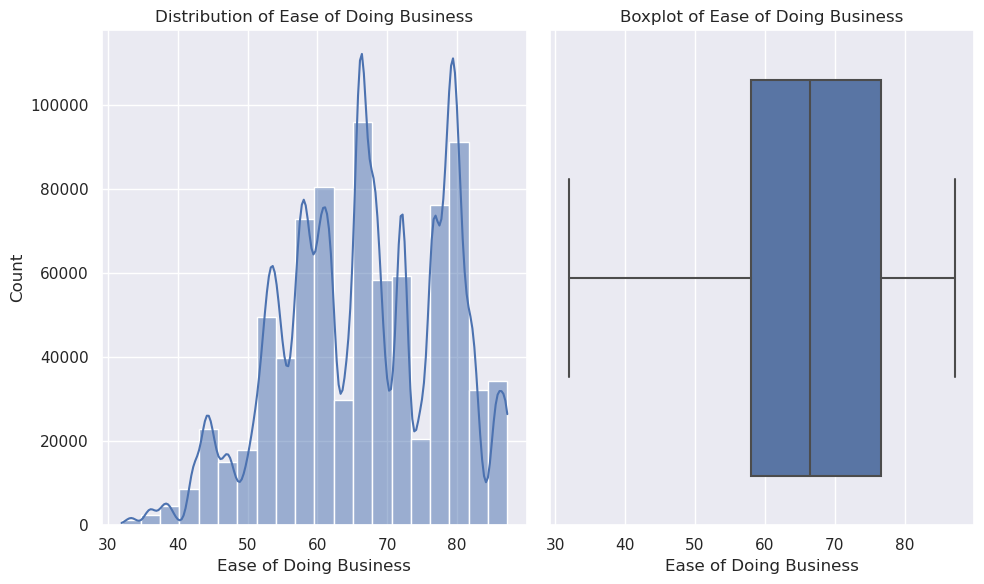

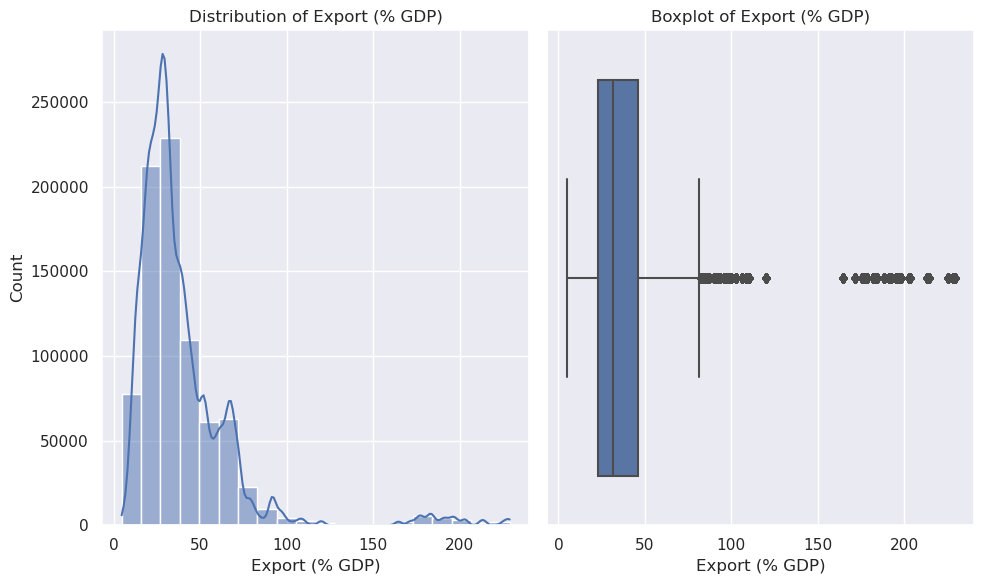

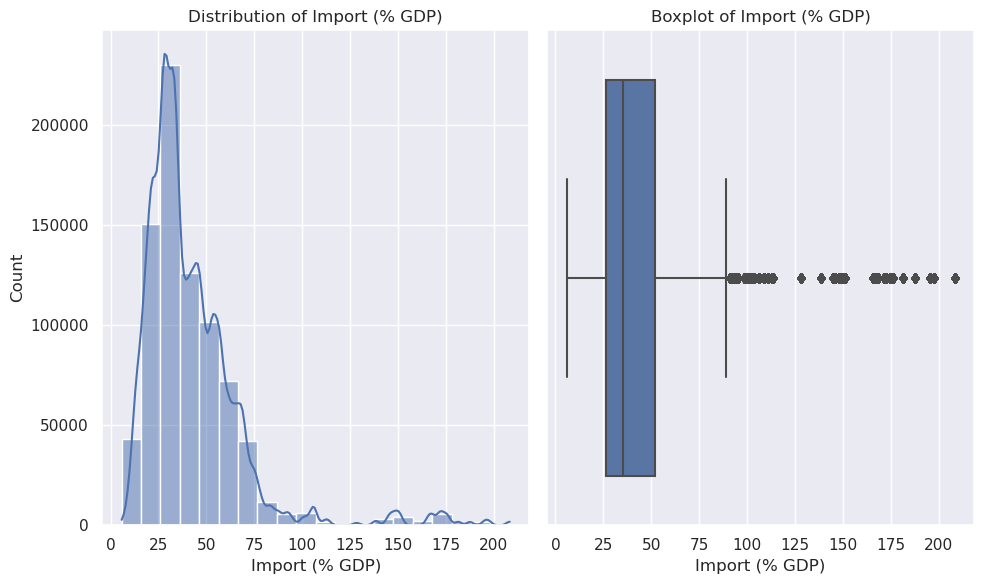

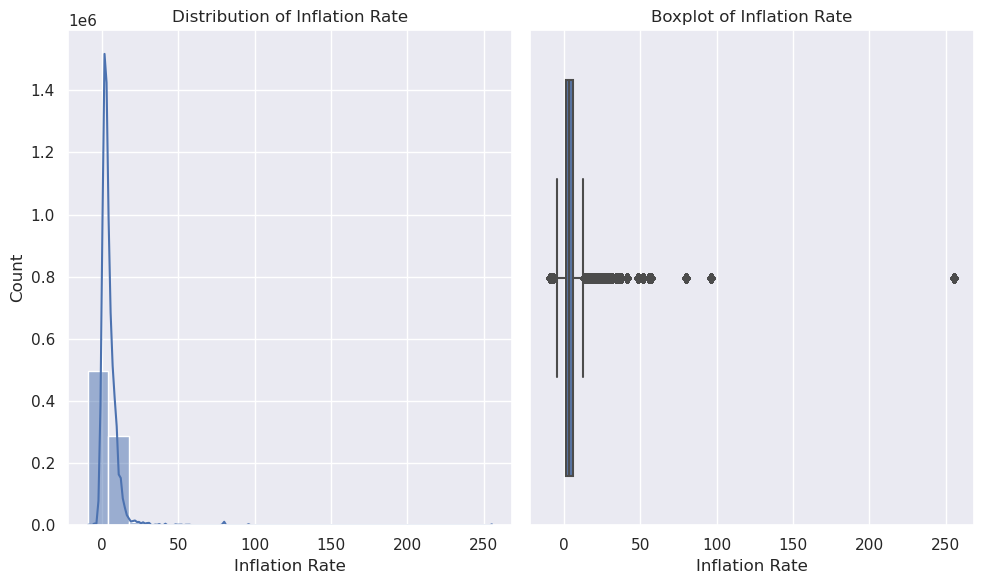

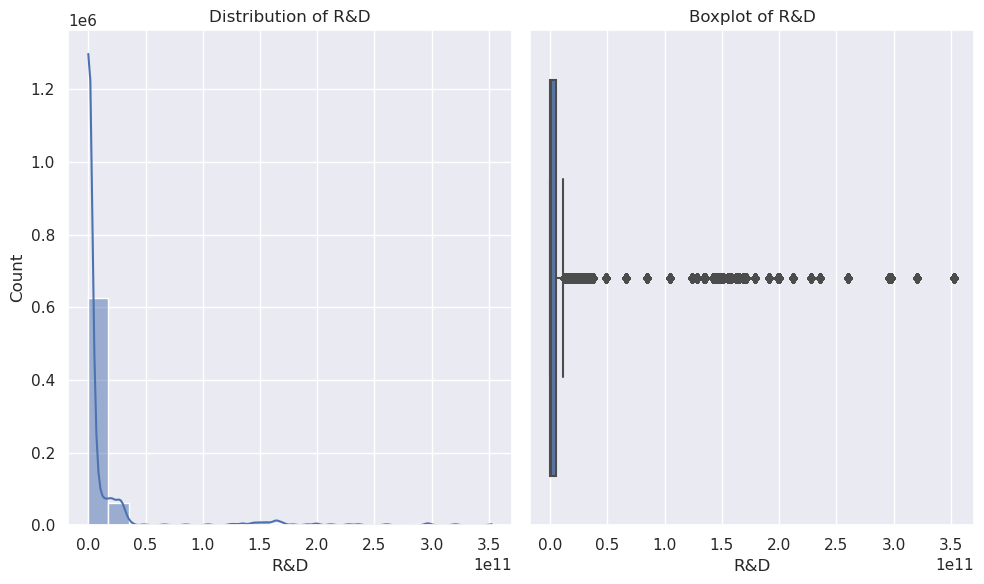

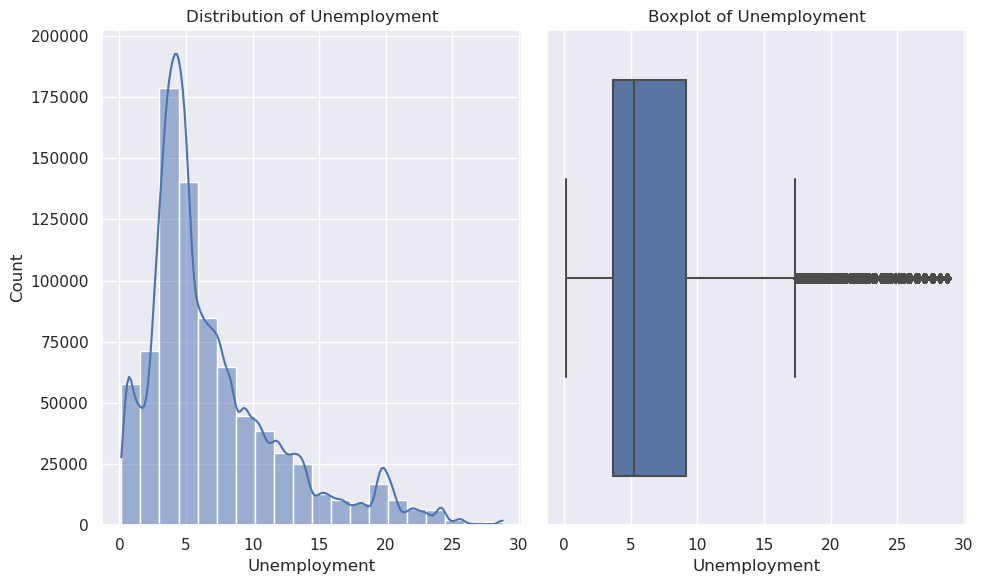

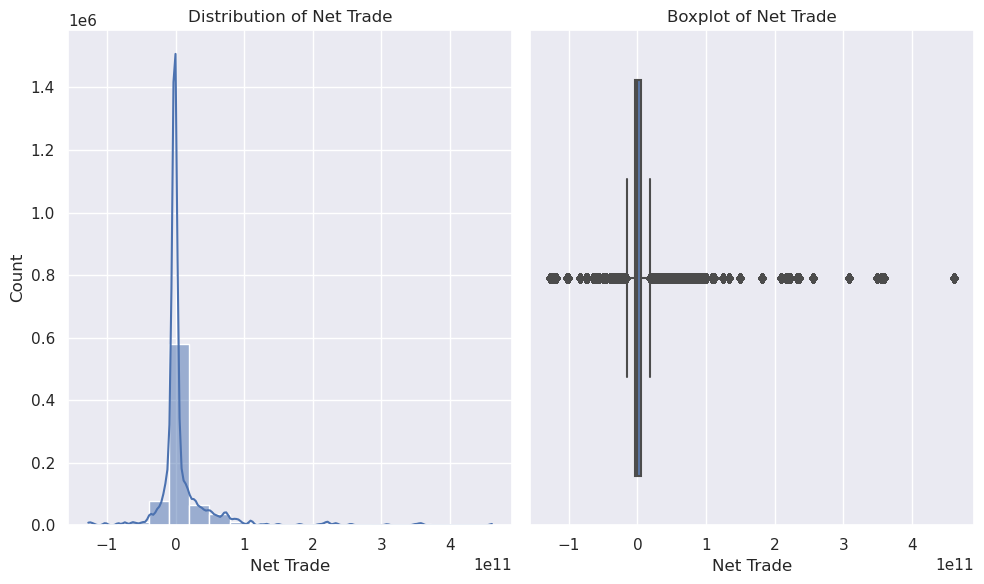

In [20]:
# Filter columns with missing values
columns_with_missing = merged_data.columns[merged_data.isnull().any()]

# Visualize distributions for columns with missing values
for column in columns_with_missing:
    plt.figure(figsize=(10, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(merged_data[column].dropna(), bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=merged_data[column])
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

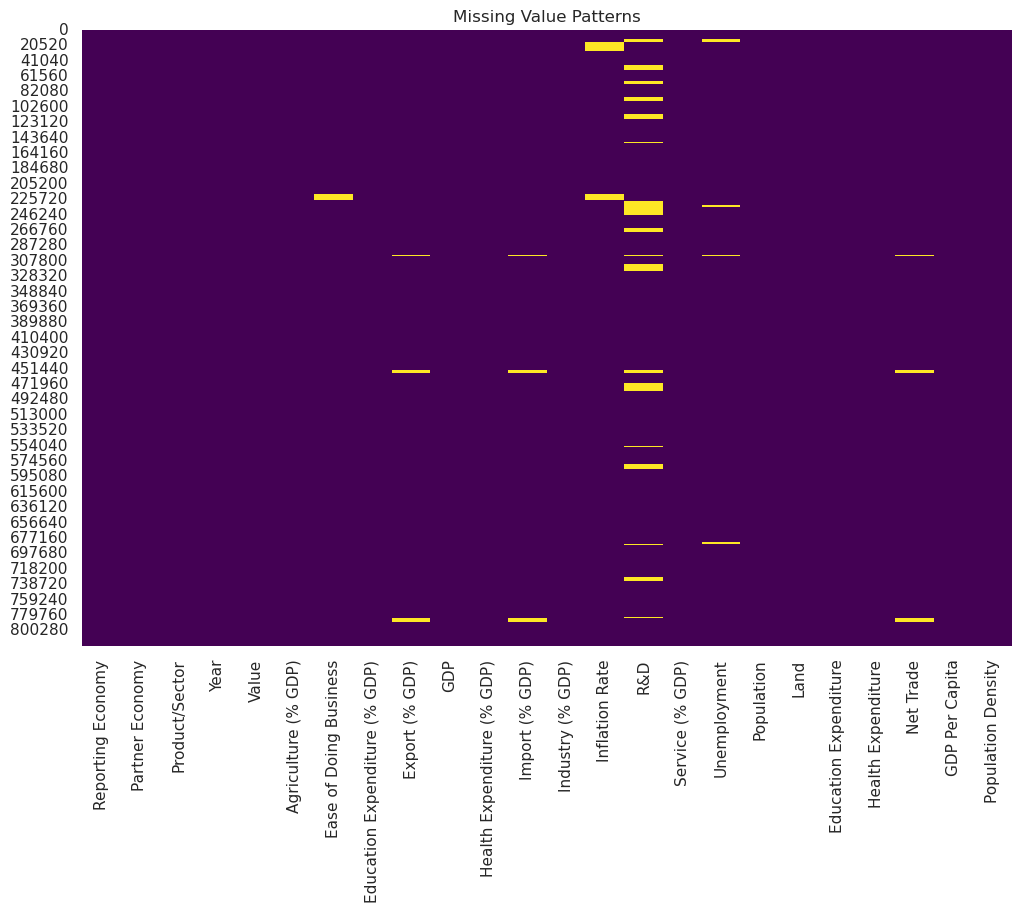

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Patterns')
plt.show()

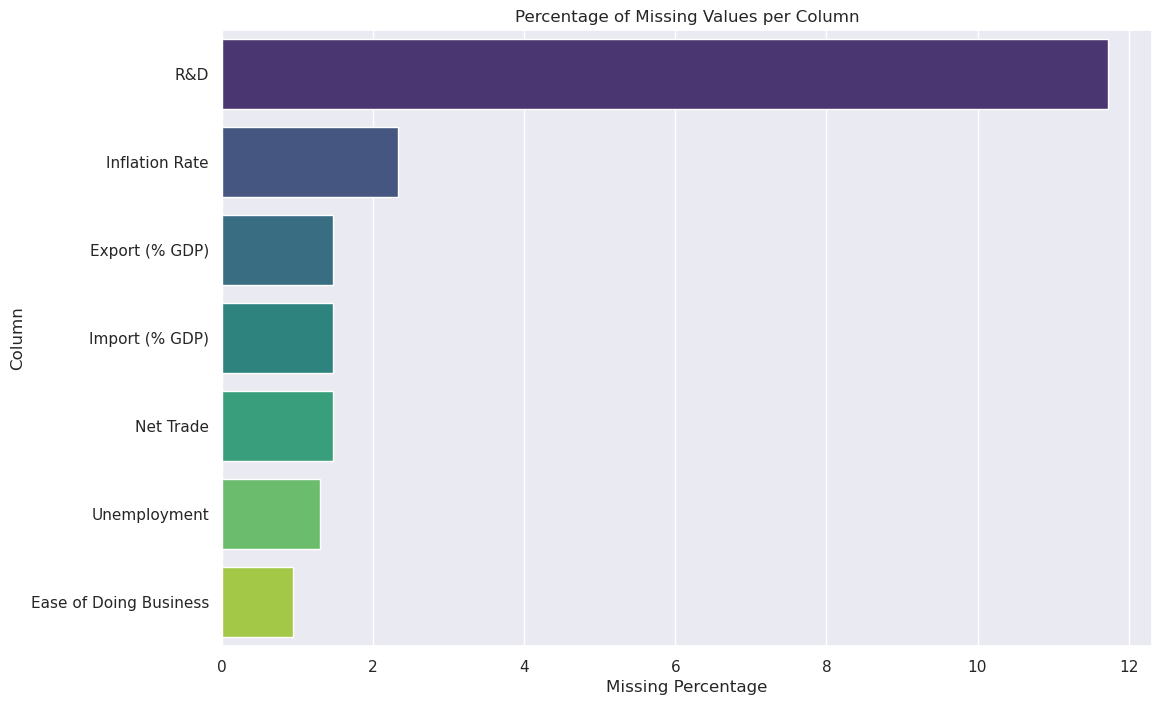

In [22]:
# Calculate the percentage of missing values per column
missing_percentage = (merged_data.isnull().sum() / len(merged_data)) * 100

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Column': merged_data.columns,
    'Missing Percentage': missing_percentage
})

# Filter columns with missing values
missing_info = missing_info[missing_info['Missing Percentage'] > 0]

# Sort the DataFrame by missing percentage in descending order
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)

# Plotting the missing percentage
plt.figure(figsize=(12, 8))
sns.barplot(x='Missing Percentage', y='Column', data=missing_info, palette='viridis')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Missing Percentage')
plt.ylabel('Column')
plt.show()

In [23]:
# Import required libraries
from sklearn.impute import SimpleImputer

# Define columns with missing values
columns_with_missing = merged_data.columns[merged_data.isnull().any()]

# Imputation methods
imputation_methods = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'most_frequent': SimpleImputer(strategy='most_frequent'),
    'ffill': SimpleImputer(strategy='constant', fill_value=None),
    'bfill': SimpleImputer(strategy='constant', fill_value=None),
}

# Impute missing values for each column with its respective method
for column in columns_with_missing:
    for method, imputer in imputation_methods.items():
        # Skip imputation methods that are not suitable for certain columns
        if (method in ['ffill', 'bfill'] and column not in ['Net Trade', 'Unemployment']):
            continue
        
        # Copy original column to perform imputation
        column_copy = merged_data[column].copy().to_frame()
        
        # Impute missing values
        merged_data[column] = imputer.fit_transform(column_copy)

# Check the result
print(merged_data[columns_with_missing].isnull().sum())

Ease of Doing Business    0
Export (% GDP)            0
Import (% GDP)            0
Inflation Rate            0
R&D                       0
Unemployment              0
Net Trade                 0
dtype: int64


In [24]:
merged_data.describe()

Year         Value  Agriculture (% GDP)  \
count  820799.000000  8.207990e+05        820799.000000   
mean     2010.566649  2.071380e+07             9.802725   
std         6.048489  3.282922e+08             9.251683   
min      2000.000000  1.100000e-03             0.030137   
25%      2006.000000  1.056584e+04             2.531468   
50%      2011.000000  1.390240e+05             6.846146   
75%      2016.000000  1.651408e+06            14.414020   
max      2022.000000  8.918623e+10            58.756137   

       Ease of Doing Business  Education Expenditure (% GDP)  Export (% GDP)  \
count           820799.000000                  820799.000000   820799.000000   
mean                66.576837                      15.336984       39.428121   
std                 11.386519                       4.562936       29.657354   
min                 31.954950                       4.957300        4.685804   
25%                 58.183880                      12.084870       22.677194   
50%                 66.576837                      14.953590       31.569798   
75%                 76.561156                      18.162519       46.028516   
max                 87.166330                      38.106159      228.993771   

                GDP  Health Expenditure (% GDP)  Import (% GDP)  \
count  8.207990e+05               820799.000000   820799.000000   
mean   5.798293e+11                    6.124271       42.050071   
std    1.674403e+12                    2.503281       26.044828   
min    3.123778e+08                    1.637753        5.767248   
25%    1.258900e+10                    3.953819       26.625595   
50%    6.833797e+10                    5.839828       35.422224   
75%    3.708190e+11                    8.029529       51.967560   
max    1.782050e+13                   20.413412      208.332944   

       Industry (% GDP)  ...           R&D  Service (% GDP)   Unemployment  \
count     820799.000000  ...  8.207990e+05    820799.000000  820799.000000   
mean          27.848395  ...  1.247051e+10        55.637773       7.009042   
std           10.060941  ...  3.843016e+10        10.219021       5.080974   
min            4.428779  ...  1.808922e+05        25.251129       0.140000   
25%           21.778697  ...  4.941141e+07        48.749133       3.690000   
50%           25.683369  ...  6.793780e+08        55.528256       5.282000   
75%           31.107724  ...  1.247051e+10        63.726144       9.050000   
max           74.113021  ...  3.526424e+11        93.361826      28.770000   

         Population          Land  Education Expenditure  Health Expenditure  \
count  8.207990e+05  8.207990e+05           8.207990e+05        8.207990e+05   
mean   8.763065e+07  1.319905e+06           7.260403e+10        3.951853e+10   
std    2.651566e+08  2.614460e+06           1.917492e+11        1.067767e+11   
min    6.815300e+04  3.000000e+02           3.142927e+07        1.226956e+07   
25%    4.252800e+06  5.110000e+04           1.868339e+09        7.207683e+08   
50%    1.155778e+07  2.676700e+05           1.133090e+10        3.340706e+09   
75%    3.823036e+07  1.141749e+06           6.109807e+10        2.209548e+10   
max    1.412360e+09  9.879750e+06           2.137504e+12        8.215732e+11   

          Net Trade  GDP Per Capita  Population Density  
count  8.207990e+05   820799.000000       820799.000000  
mean   8.872739e+09    15202.951405          296.625070  
std    4.438656e+10    21615.397530         1051.173043  
min   -1.270340e+11      124.139302            1.567002  
25%   -3.064043e+09     1996.019759           24.498125  
50%   -5.497189e+08     5268.278984           76.039845  
75%    7.176955e+09    14628.572457          183.852273  
max    4.608294e+11   103553.840134         7856.155647  

[8 rows x 21 columns]

Year: The dataset covers the years from 2000 to 2022, with an average year of approximately 2010.57. This suggests that the majority of the trade data falls within the early 2010s.

Value: Trade values range widely from very small values to 89,186,230 USD, indicating diverse transaction sizes within the dataset.

Agriculture (% GDP): On average, agriculture contributes approximately 9.80% to the GDP of reporting economies. This suggests a significant role for agriculture in the economies represented in the dataset.

Ease of Doing Business: With an average score of about 66.58, there's a moderate level of ease in conducting business across reporting economies. This indicates some variation in business-friendly environments.

Education Expenditure (% GDP): The average education expenditure as a percentage of GDP stands at around 15.34%, reflecting the investment in education within reporting economies.

Export (% GDP): Export as a percentage of GDP varies widely, with an average of about 39.43%. This highlights the importance of exports in the economies represented in the dataset.

GDP: The average GDP is approximately 579.83 billion USD, indicating the economic size of reporting economies.

Health Expenditure (% GDP): Health expenditure as a percentage of GDP averages around 6.12%, showing the investment in healthcare across reporting economies.

Import (% GDP): Import as a percentage of GDP averages approximately 42.05%, indicating the reliance on imported goods within reporting economies.

Industry (% GDP): Industry's contribution to GDP averages around 27.85%, indicating the importance of industrial activities in the economies represented in the dataset.

R&D: The average R&D expenditure is about 12.47 billion USD, reflecting investment in research and development activities within reporting economies.

Service (% GDP): Service sector contribution to GDP averages around 55.64%, indicating the significant role of services in economic activities.

Unemployment: The average unemployment rate is approximately 7.01%, providing insights into labor market conditions across reporting economies.

Population: The dataset represents populations ranging from thousands to billions across reporting economies.

Land: The land area represented in the dataset varies widely across reporting economies.

Education Expenditure: The average education expenditure is approximately 72.60 billion USD, indicating investment in education within reporting economies.

Health Expenditure: The average health expenditure is about 39.52 billion USD, reflecting investment in healthcare across reporting economies.

Net Trade: Net trade varies widely across reporting economies, with some experiencing trade surpluses and others deficits.

GDP Per Capita: Ranging from 124.14 to 103,553.84 USD, this variable demonstrates the considerable disparity in income levels among reporting economies, with some nations exhibiting significantly higher per capita GDP than others.

Population Density: The dataset represents various population densities across reporting economies, with an average of approximately 296.63 people per square kilometer.

##### The research focuses on 4 sectors Other agricultural products,  Animal  products, Dairy products  and Fruits, vegetables, plants therefore there is need to subset the data accordingly.

In [27]:
# Check unique values in the "Product/Sector" column
unique_product_sector = merged_data['Product/Sector'].unique()

# Print unique values
print("Unique values in the 'Product/Sector' column:")
print(unique_product_sector)

Unique values in the 'Product/Sector' column:
['Animal products' 'Dairy products' 'Fruits, vegetables, plants'
 'Coffee, tea' 'Cereals and preparations' 'Oilseeds, fats and oils'
 'Sugars and confectionery' 'Beverages and tobacco' 'Cotton'
 'Other agricultural products' 'Fish and fish products']


In [28]:
# Subset Data
relevant_sectors = ['Animal products', 'Dairy products', 'Fruits, vegetables, plants', 'Other agricultural products']
subset_data = merged_data[merged_data['Product/Sector'].isin(relevant_sectors)]

In [29]:
# Check unique values in the "Product/Sector" column
unique_product_sector = subset_data['Product/Sector'].unique()

# Print unique values
print("Unique values in the 'Product/Sector' column:")
print(unique_product_sector)

Unique values in the 'Product/Sector' column:
['Animal products' 'Dairy products' 'Fruits, vegetables, plants'
 'Other agricultural products']


#### 2.2 Renaming Columns

In [31]:
print(subset_data.columns)

Index(['Reporting Economy', 'Partner Economy', 'Product/Sector', 'Year',
       'Value', 'Agriculture (% GDP)', 'Ease of Doing Business',
       'Education Expenditure (% GDP)', 'Export (% GDP)', 'GDP',
       'Health Expenditure (% GDP)', 'Import (% GDP)', 'Industry (% GDP)',
       'Inflation Rate', 'R&D', 'Service (% GDP)', 'Unemployment',
       'Population', 'Land', 'Education Expenditure', 'Health Expenditure',
       'Net Trade', 'GDP Per Capita', 'Population Density'],
      dtype='object')


In [32]:
subset_data = subset_data.rename(columns={
    'Reporting Economy': 'reporting_economy',
    'Partner Economy': 'partner_economy',
    'Product/Sector': 'product_sector',
    'Year': 'year',
    'Value': 'value',
    'Agriculture (% GDP)': 'agriculture_gdp_percent',
    'Ease of Doing Business': 'ease_of_doing_business',
    'Education Expenditure (% GDP)': 'education_gdp_percent',
    'Export (% GDP)': 'export_gdp_percent',
    'GDP': 'gdp',
    'Health Expenditure (% GDP)': 'health_gdp_percent',
    'Import (% GDP)': 'import_gdp_percent',
    'Industry (% GDP)': 'industry_gdp_percent',
    'Inflation Rate': 'inflation_rate',
    'R&D': 'research_and_development',
    'Service (% GDP)': 'service_gdp_percent',
    'Unemployment': 'unemployment',
    'Population': 'population',
    'Land': 'land',
    'Education Expenditure': 'education_expenditure',
    'Health Expenditure': 'health_expenditure',
    'Net Trade': 'net_trade',
    'GDP Per Capita': 'gdp_per_capita',
    'Population Density': 'population_density'
})

In [33]:
print(subset_data.columns)

Index(['reporting_economy', 'partner_economy', 'product_sector', 'year',
       'value', 'agriculture_gdp_percent', 'ease_of_doing_business',
       'education_gdp_percent', 'export_gdp_percent', 'gdp',
       'health_gdp_percent', 'import_gdp_percent', 'industry_gdp_percent',
       'inflation_rate', 'research_and_development', 'service_gdp_percent',
       'unemployment', 'population', 'land', 'education_expenditure',
       'health_expenditure', 'net_trade', 'gdp_per_capita',
       'population_density'],
      dtype='object')


In [34]:
column_data_types = subset_data.dtypes

print(column_data_types)

reporting_economy            object
partner_economy              object
product_sector               object
year                          int64
value                       float64
agriculture_gdp_percent     float64
ease_of_doing_business      float64
education_gdp_percent       float64
export_gdp_percent          float64
gdp                         float64
health_gdp_percent          float64
import_gdp_percent          float64
industry_gdp_percent        float64
inflation_rate              float64
research_and_development    float64
service_gdp_percent         float64
unemployment                float64
population                    int64
land                        float64
education_expenditure       float64
health_expenditure          float64
net_trade                   float64
gdp_per_capita              float64
population_density          float64
dtype: object


#### 2.3 Treatment of Outliers in Numerical Variables

In [36]:
# Define a function to detect outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers


numerical_variables = ['value', 'agriculture_gdp_percent', 'ease_of_doing_business',
       'education_gdp_percent', 'export_gdp_percent', 'gdp',
       'health_gdp_percent', 'import_gdp_percent', 'industry_gdp_percent',
       'inflation_rate', 'research_and_development', 'service_gdp_percent',
       'unemployment', 'population', 'land', 'education_expenditure',
       'health_expenditure', 'net_trade', 'gdp_per_capita',
       'population_density']
outliers_dict = {}

# Check for outliers in each numerical variable
for var in numerical_variables:
    outliers = detect_outliers_iqr(subset_data[var])
    outliers_dict[var] = subset_data[var][outliers]

# Print outliers for each numerical variable
for var, outlier_values in outliers_dict.items():
    print(f"Outliers in {var}:")
    print(outlier_values)


Outliers in value:
0         4.606003e+07
1         9.208034e+06
2         5.794029e+07
9         5.764643e+06
36        9.441454e+06
              ...     
820659    1.517469e+07
820771    4.907087e+06
820791    1.915594e+07
820792    6.550624e+06
820793    5.851829e+07
Name: value, Length: 53259, dtype: float64
Outliers in agriculture_gdp_percent:
102477    57.140091
102478    57.140091
102479    57.140091
102486    57.140091
102488    57.140091
            ...    
813883    34.872860
813884    34.872860
813885    34.872860
813892    34.872860
813895    34.872860
Name: agriculture_gdp_percent, Length: 9771, dtype: float64
Outliers in ease_of_doing_business:
Series([], Name: ease_of_doing_business, dtype: float64)
Outliers in education_gdp_percent:
109756    27.497240
109757    27.497240
109758    27.497240
109765    27.497240
109768    27.497240
            ...    
800997    27.833811
801003    27.833811
801006    27.833811
801010    27.833811
801012    27.833811
Name: education_gdp_

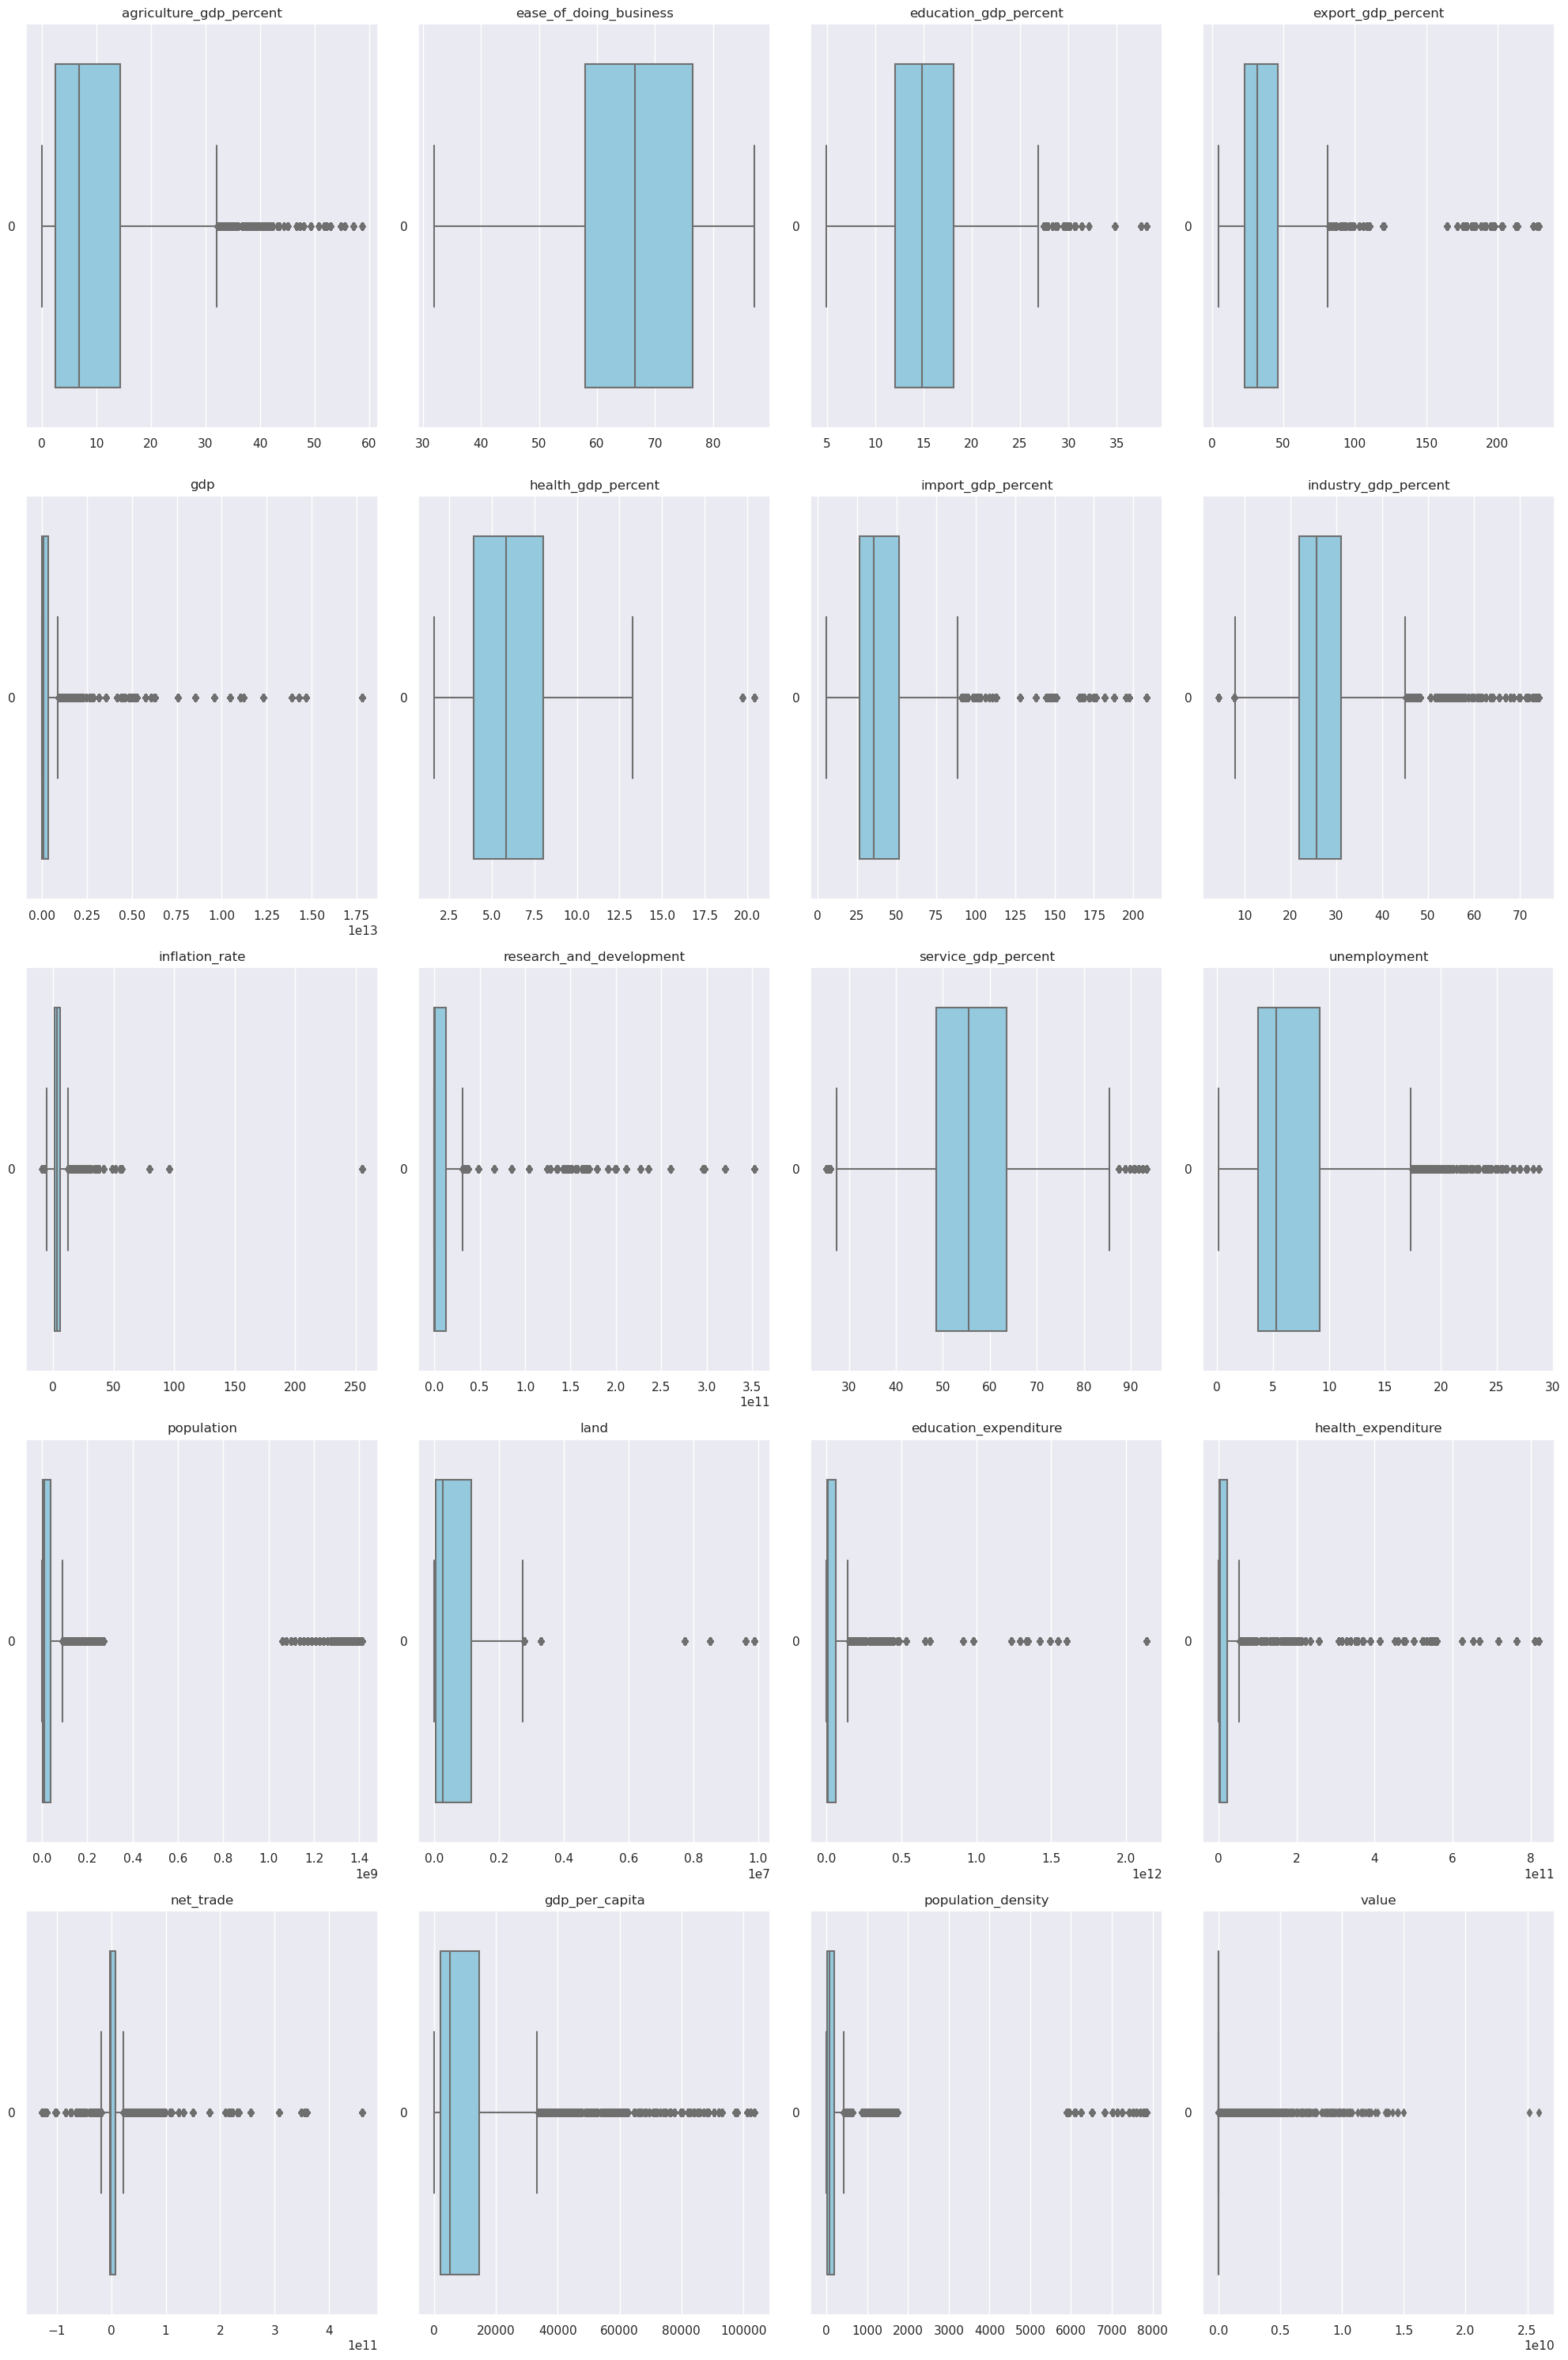

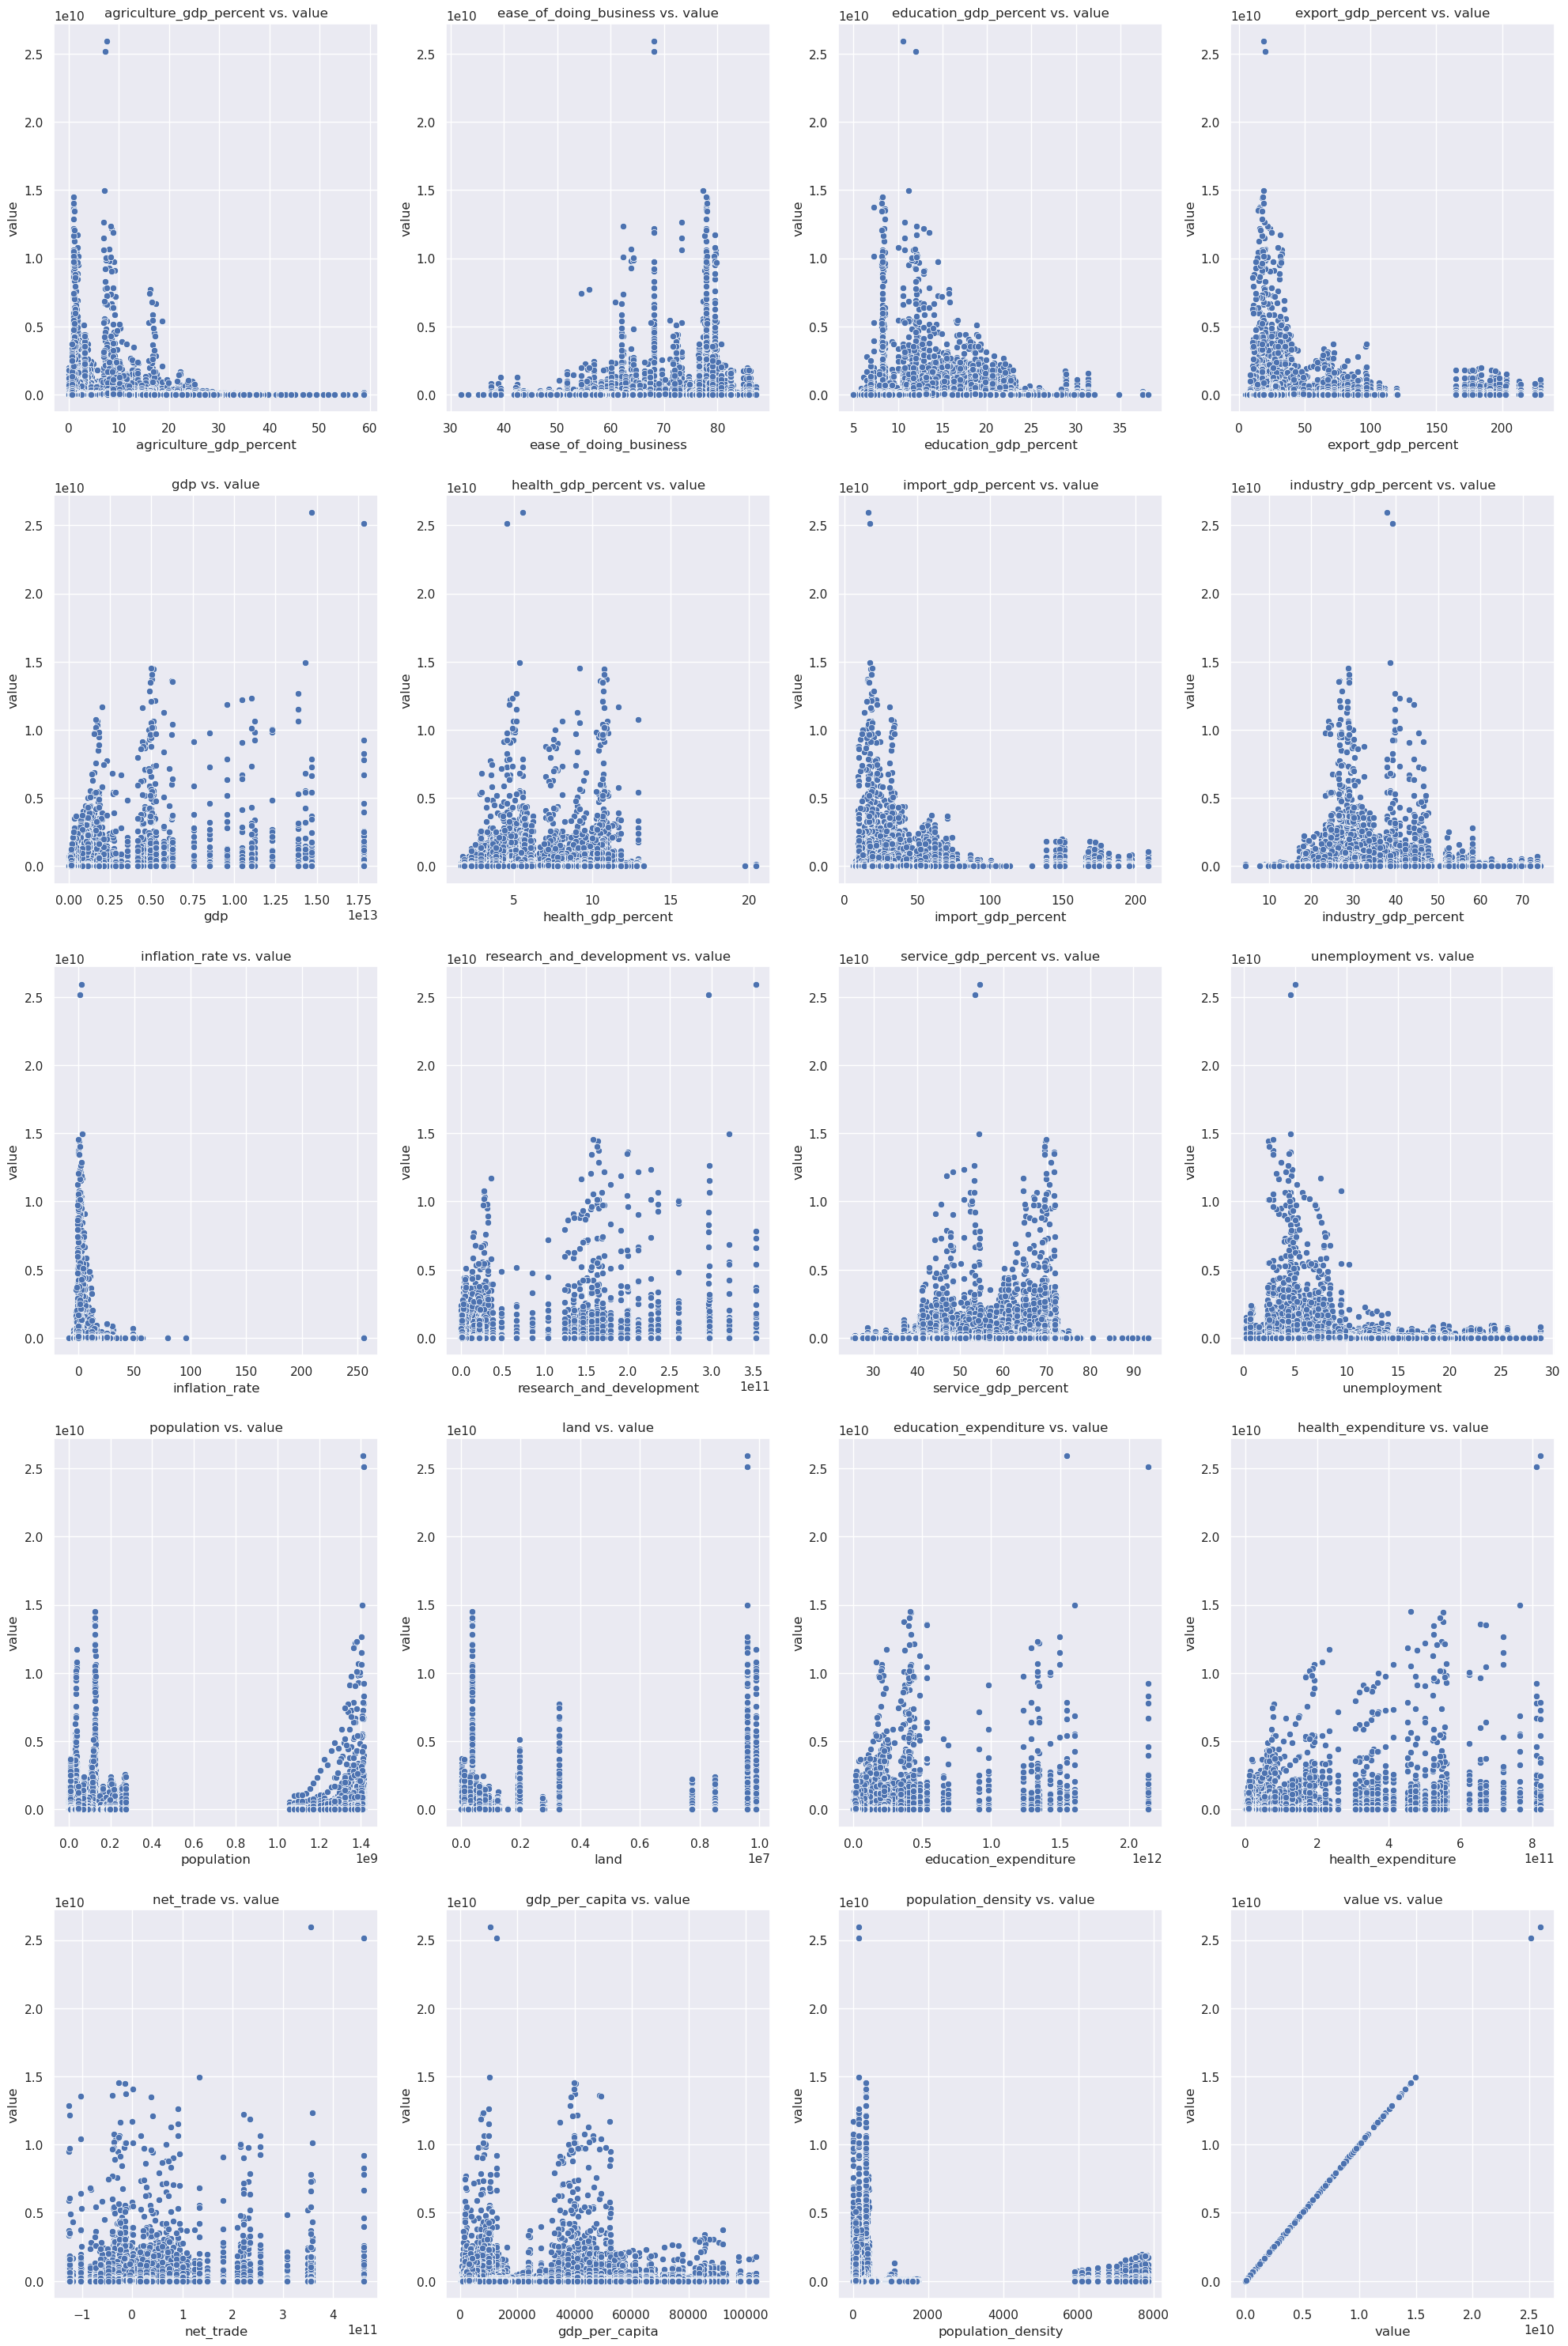

In [37]:
# List of numerical columns
numerical_columns = ['agriculture_gdp_percent', 'ease_of_doing_business', 
                     'education_gdp_percent', 'export_gdp_percent', 'gdp',
                     'health_gdp_percent', 'import_gdp_percent', 'industry_gdp_percent',
                     'inflation_rate', 'research_and_development', 'service_gdp_percent',
                     'unemployment', 'population', 'land', 'education_expenditure',
                     'health_expenditure', 'net_trade', 'gdp_per_capita', 'population_density', 'value']

# Plotting box plots for each numerical column
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=subset_data[col], orient="h", color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

# Plotting scatter plots for each numerical column against the target variable
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.scatterplot(data=subset_data, x=col, y='value')
    plt.title(col + ' vs. value')
plt.tight_layout()
plt.show()

In [38]:
# Select columns to handle
columns_to_handle = [col for col in numerical_columns if col != 'value']

In [39]:
# Impute outliers with median value
for col in columns_to_handle:
    q1 = subset_data[col].quantile(0.25)
    q3 = subset_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    subset_data.loc[(subset_data[col] < lower_bound) | (subset_data[col] > upper_bound), col] = subset_data[col].median()

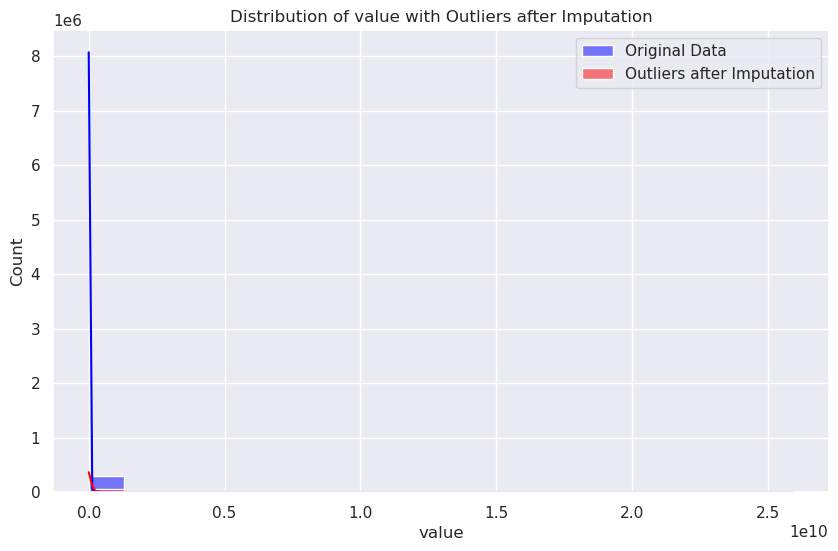

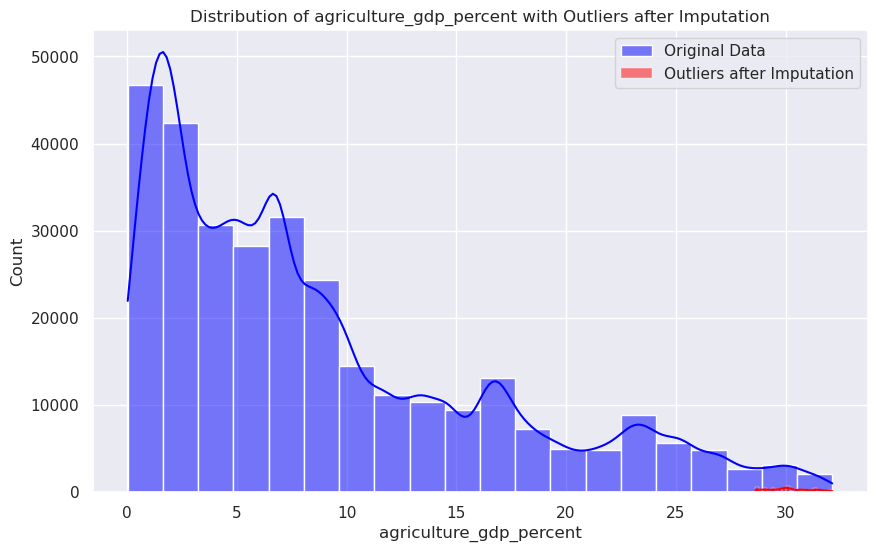

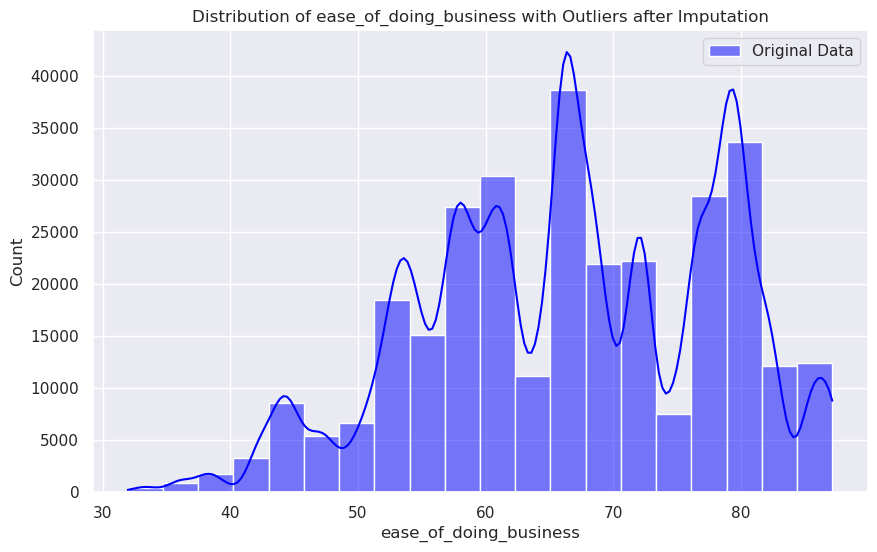

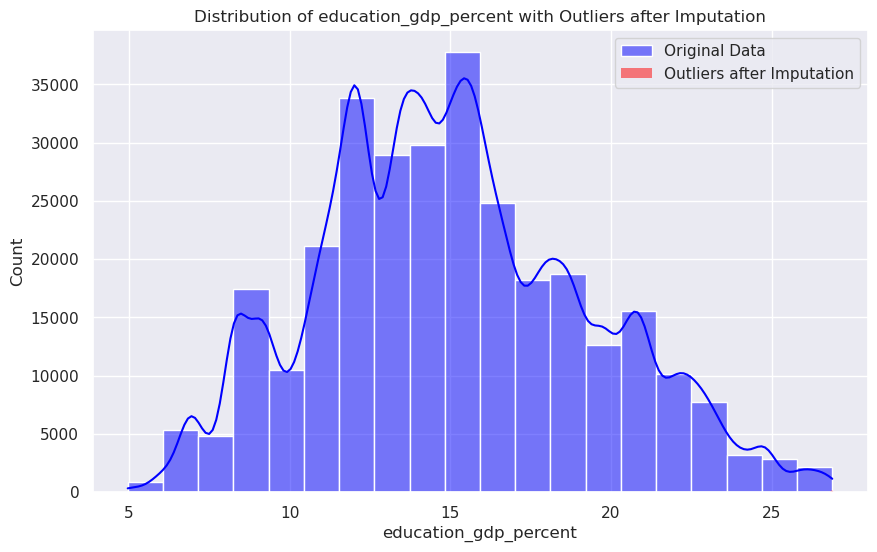

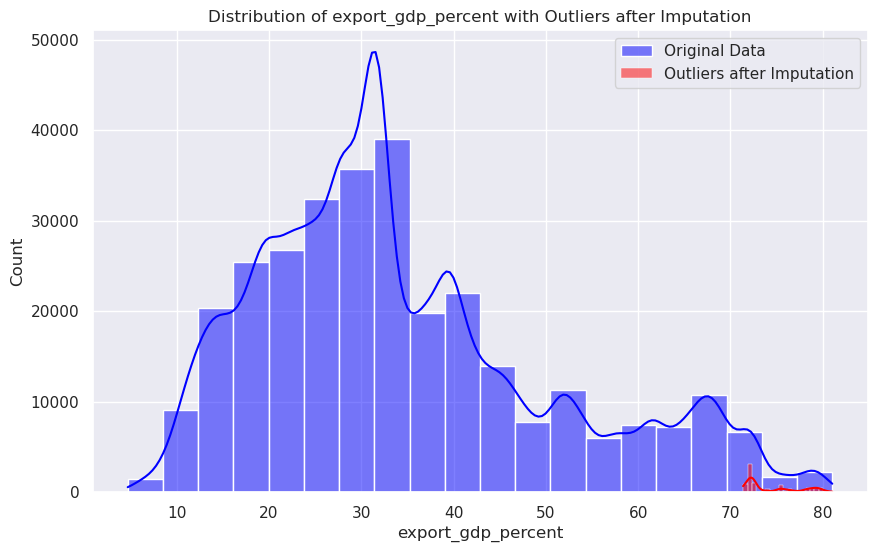

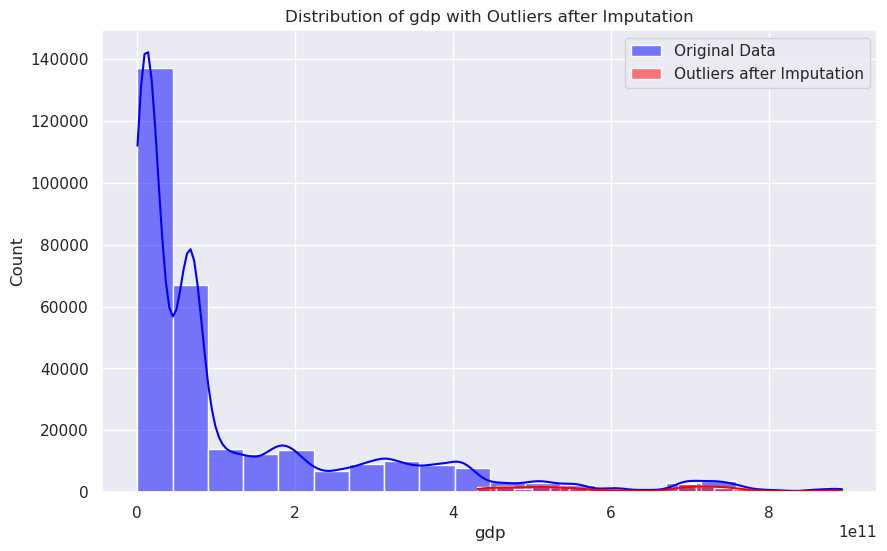

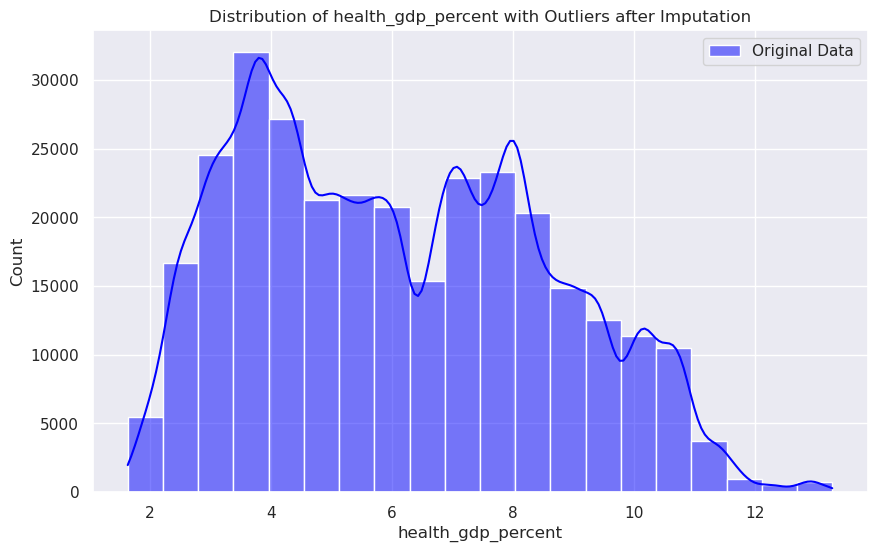

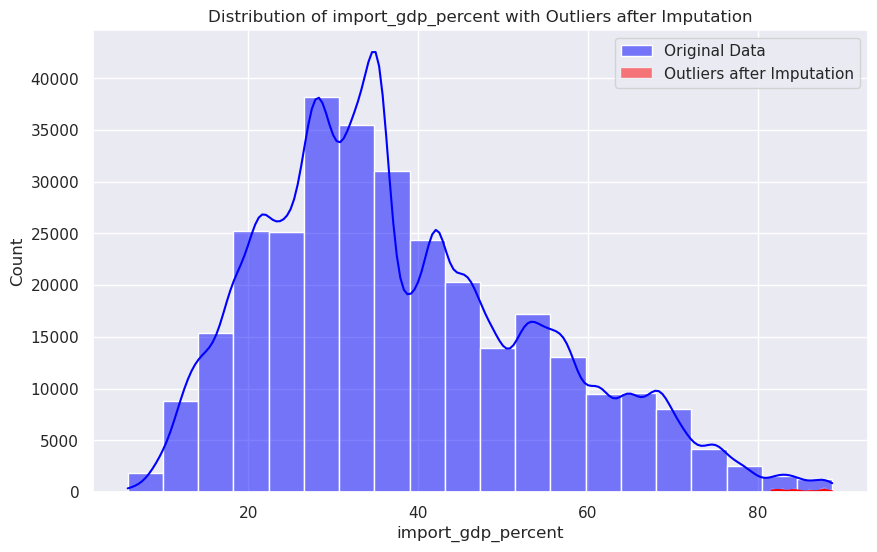

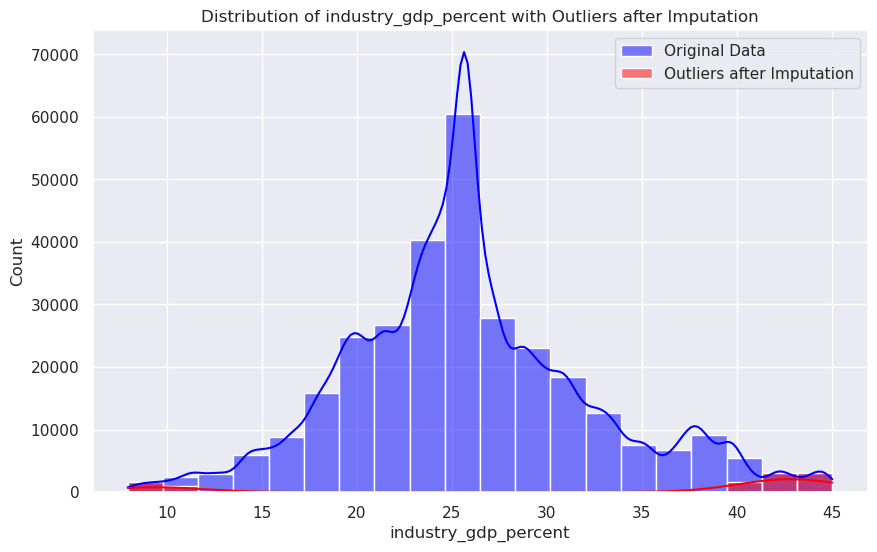

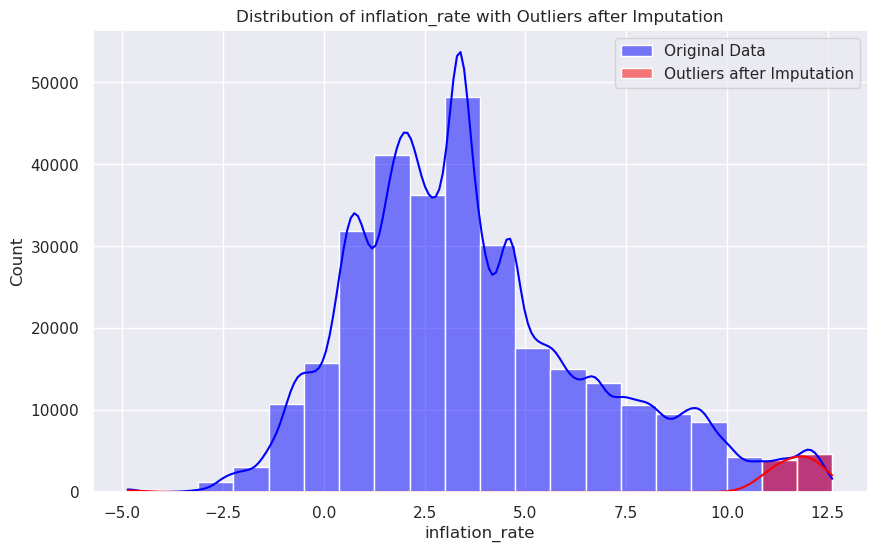

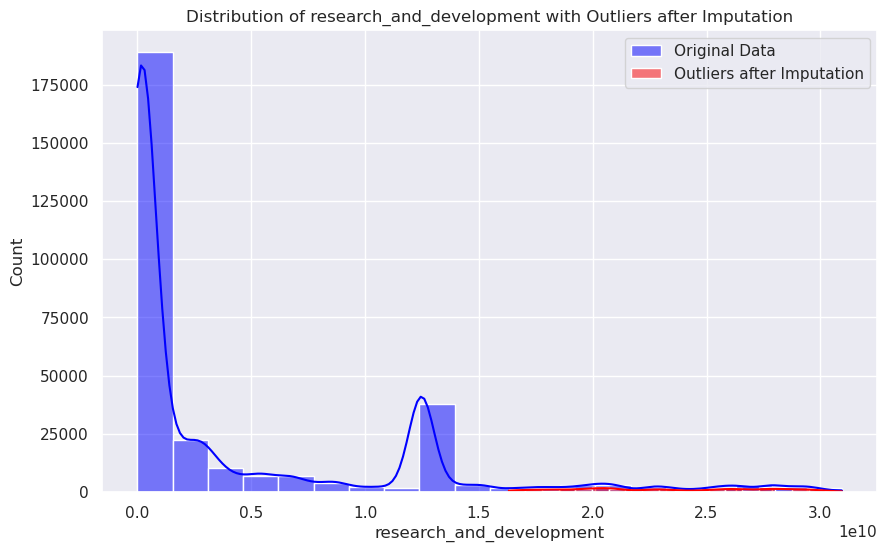

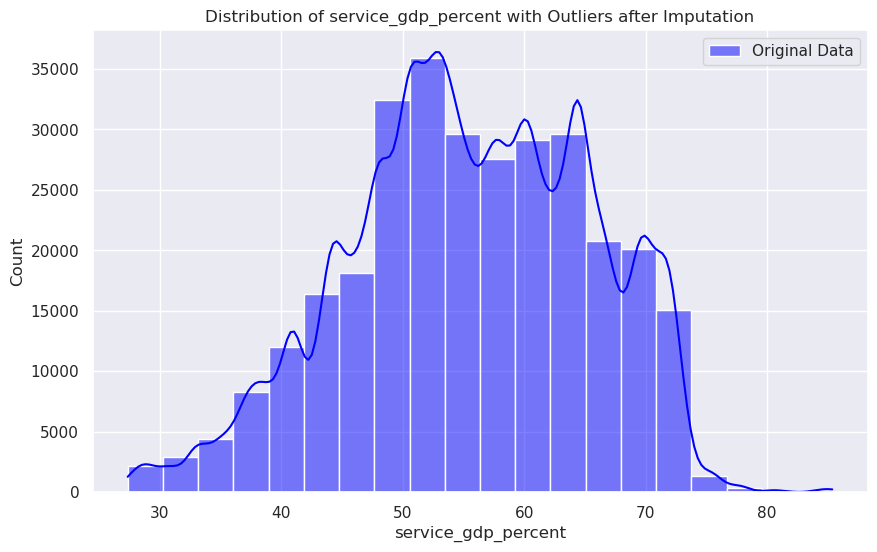

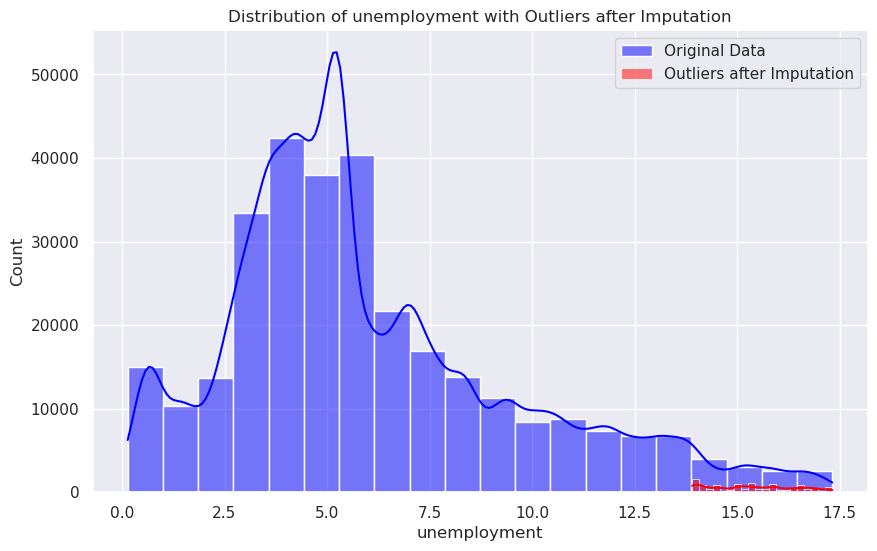

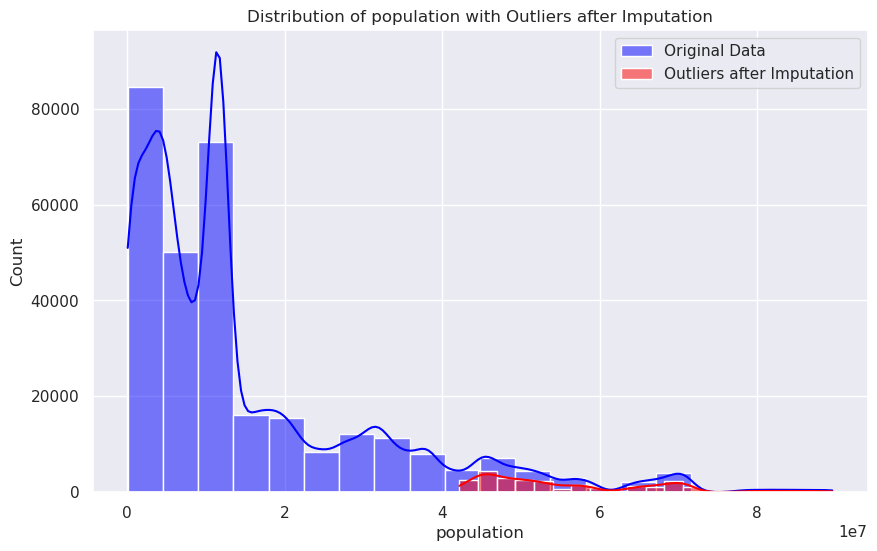

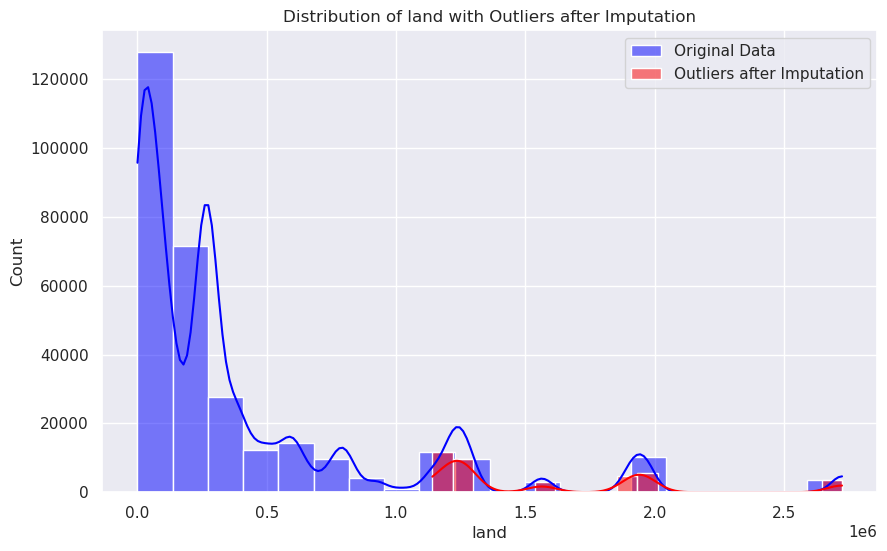

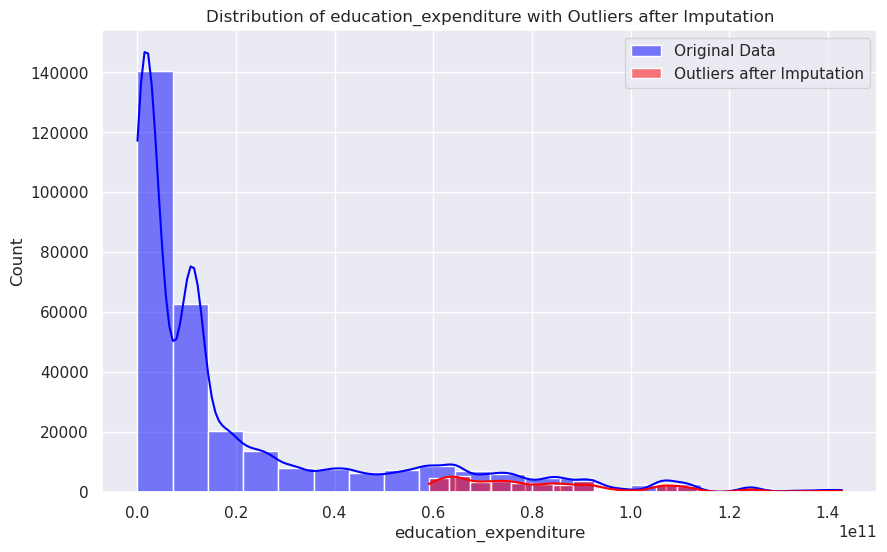

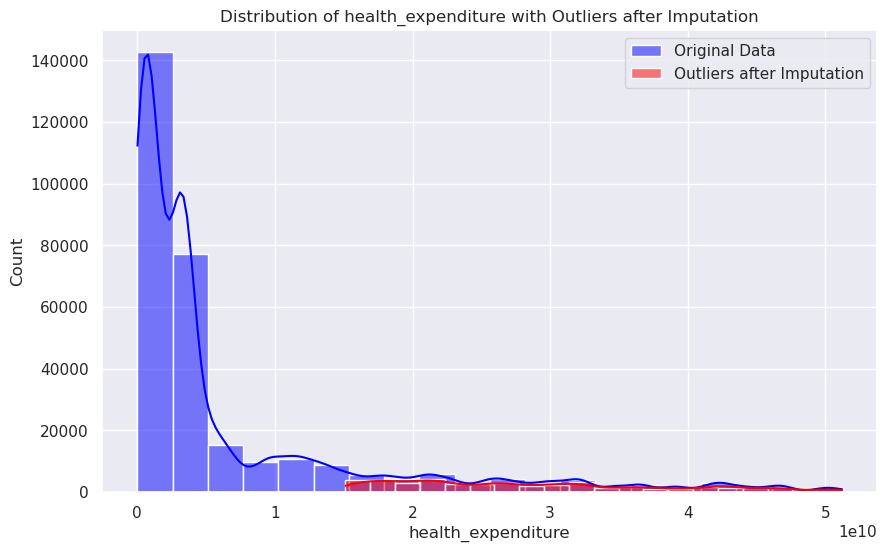

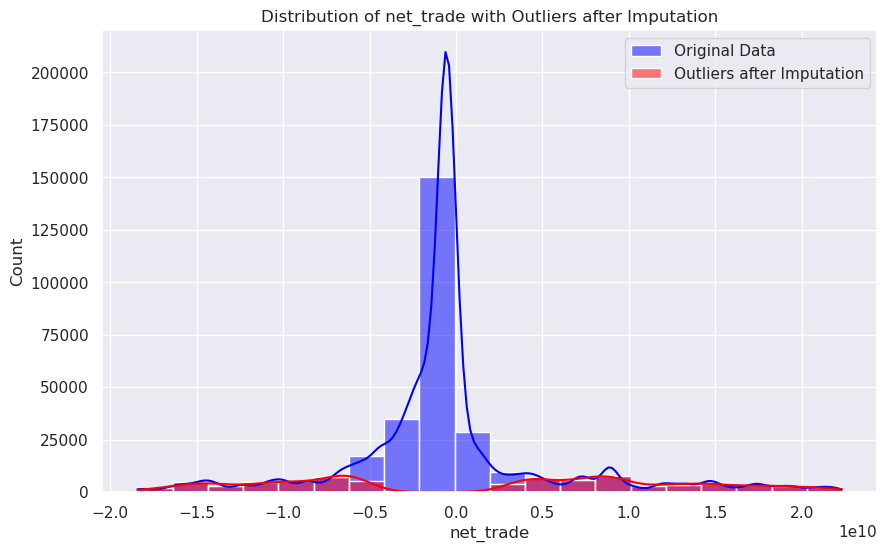

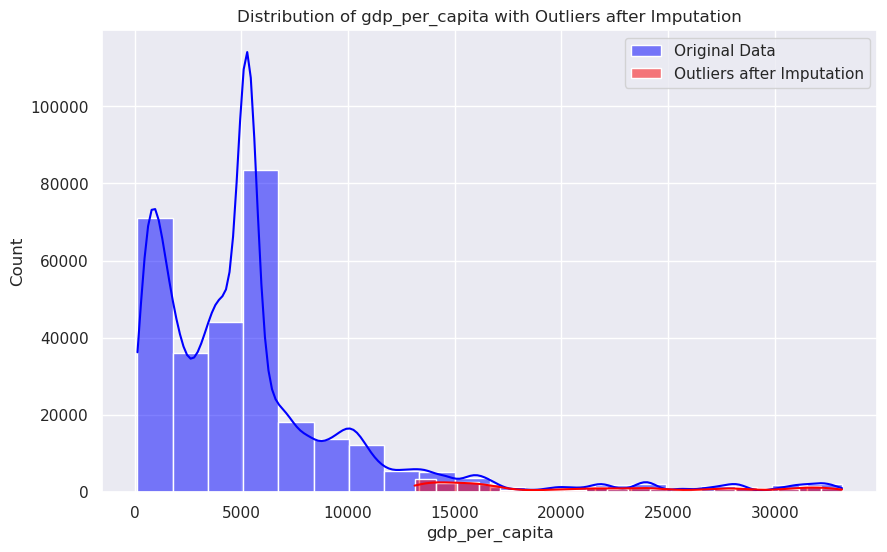

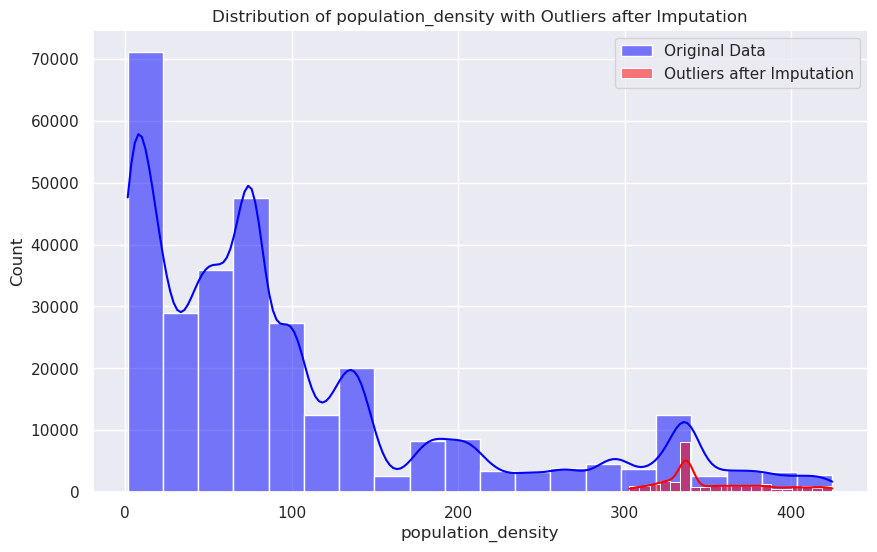

In [40]:
# Define a function to detect outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

numerical_variables = ['value', 'agriculture_gdp_percent', 'ease_of_doing_business',
       'education_gdp_percent', 'export_gdp_percent', 'gdp',
       'health_gdp_percent', 'import_gdp_percent', 'industry_gdp_percent',
       'inflation_rate', 'research_and_development', 'service_gdp_percent',
       'unemployment', 'population', 'land', 'education_expenditure',
       'health_expenditure', 'net_trade', 'gdp_per_capita',
       'population_density']
outliers_dict = {}

# Check for outliers in each numerical variable after imputation
for var in numerical_variables:
    outliers = detect_outliers_iqr(subset_data[var])
    outliers_dict[var] = subset_data[var][outliers]

# Visualize outliers for each numerical variable
for var, outlier_values in outliers_dict.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(subset_data[var], bins=20, kde=True, color='blue', label='Original Data')
    sns.histplot(outlier_values, bins=20, kde=True, color='red', label='Outliers after Imputation')
    plt.title(f'Distribution of {var} with Outliers after Imputation')
    plt.legend()
    plt.show()

In [41]:
# Unique values and total counts for 'reporting_economy' column
unique_reporting_economy = subset_data['reporting_economy'].unique()
print("Unique values in the 'reporting_economy' column:")
print(unique_reporting_economy)
print("Total number of unique values:", len(unique_reporting_economy))

# Unique values and total counts for 'partner_economy' column
unique_partner_economy = subset_data['partner_economy'].unique()
print("\nUnique values in the 'partner_economy' column:")
print(unique_partner_economy)
print("Total number of unique values:", len(unique_partner_economy))

Unique values in the 'reporting_economy' column:
['Albania' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Australia'
 'Bangladesh' 'Armenia' 'Barbados' 'Botswana' 'Brazil' 'Belize'
 'Brunei Darussalam' 'Bulgaria' 'Myanmar' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cabo Verde' 'Central African Republic' 'Sri Lanka' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Benin' 'Dominica' 'Dominican Republic' 'Ecuador' 'El Salvador'
 'Estonia' 'Fiji' 'Gabon' 'Georgia' 'Ghana' 'Grenada' 'Guatemala' 'Guinea'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Israel' 'Jamaica' 'Japan' 'Kazakhstan' 'Jordan' 'Kenya'
 'Kyrgyz Republic' 'Lesotho' 'Latvia' 'Lithuania' 'Madagascar' 'Malawi'
 'Malaysia' 'Maldives' 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico'
 'Mongolia' 'Morocco' 'Mozambique' 'Oman' 'Namibia' 'Nepal' 'Vanuatu'
 'New Zealand' 'Nicaragua' 'Niger' 'Nigeria' 'Norway' 'Pakistan' 'Panama'
 'Papua New Guinea' 'Paraguay' 'Peru' 'Philipp

In [42]:
# Remove rows where 'partner_economy' is 'World' or 'European Union (partner code)'
subset_data = subset_data[(subset_data['partner_economy'] != 'World') & (subset_data['partner_economy'] != 'European Union (partner code)') 
             & (subset_data['partner_economy'] != 'European Union, n.e.s.')]

In [43]:
# Unique values and total counts for 'reporting_economy' column
unique_reporting_economy = subset_data['reporting_economy'].unique()
print("Unique values in the 'reporting_economy' column:")
print(unique_reporting_economy)
print("Total number of unique values:", len(unique_reporting_economy))

# Unique values and total counts for 'partner_economy' column
unique_partner_economy = subset_data['partner_economy'].unique()
print("\nUnique values in the 'partner_economy' column:")
print(unique_partner_economy)
print("Total number of unique values:", len(unique_partner_economy))

Unique values in the 'reporting_economy' column:
['Albania' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Australia'
 'Bangladesh' 'Armenia' 'Barbados' 'Botswana' 'Brazil' 'Belize'
 'Brunei Darussalam' 'Bulgaria' 'Myanmar' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cabo Verde' 'Central African Republic' 'Sri Lanka' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Benin' 'Dominica' 'Dominican Republic' 'Ecuador' 'El Salvador'
 'Estonia' 'Fiji' 'Gabon' 'Georgia' 'Ghana' 'Grenada' 'Guatemala' 'Guinea'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Israel' 'Jamaica' 'Japan' 'Kazakhstan' 'Jordan' 'Kenya'
 'Kyrgyz Republic' 'Lesotho' 'Latvia' 'Lithuania' 'Madagascar' 'Malawi'
 'Malaysia' 'Maldives' 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico'
 'Mongolia' 'Morocco' 'Mozambique' 'Oman' 'Namibia' 'Nepal' 'Vanuatu'
 'New Zealand' 'Nicaragua' 'Niger' 'Nigeria' 'Norway' 'Pakistan' 'Panama'
 'Papua New Guinea' 'Paraguay' 'Peru' 'Philipp

In [44]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [45]:
import category_encoders as ce

# Target encode 'reporting_economy' and 'partner_economy'
target_encoder = ce.TargetEncoder(cols=['reporting_economy', 'partner_economy'])
encoded_subset_data = target_encoder.fit_transform(subset_data, subset_data['value'])

# One-hot encode 'product_sector'
onehot_encoder = ce.OneHotEncoder(cols=['product_sector'], use_cat_names=True)
encoded_subset_data = onehot_encoder.fit_transform(encoded_subset_data)

### 3.0 Data Visualisation

In [47]:
import plotly.express as px

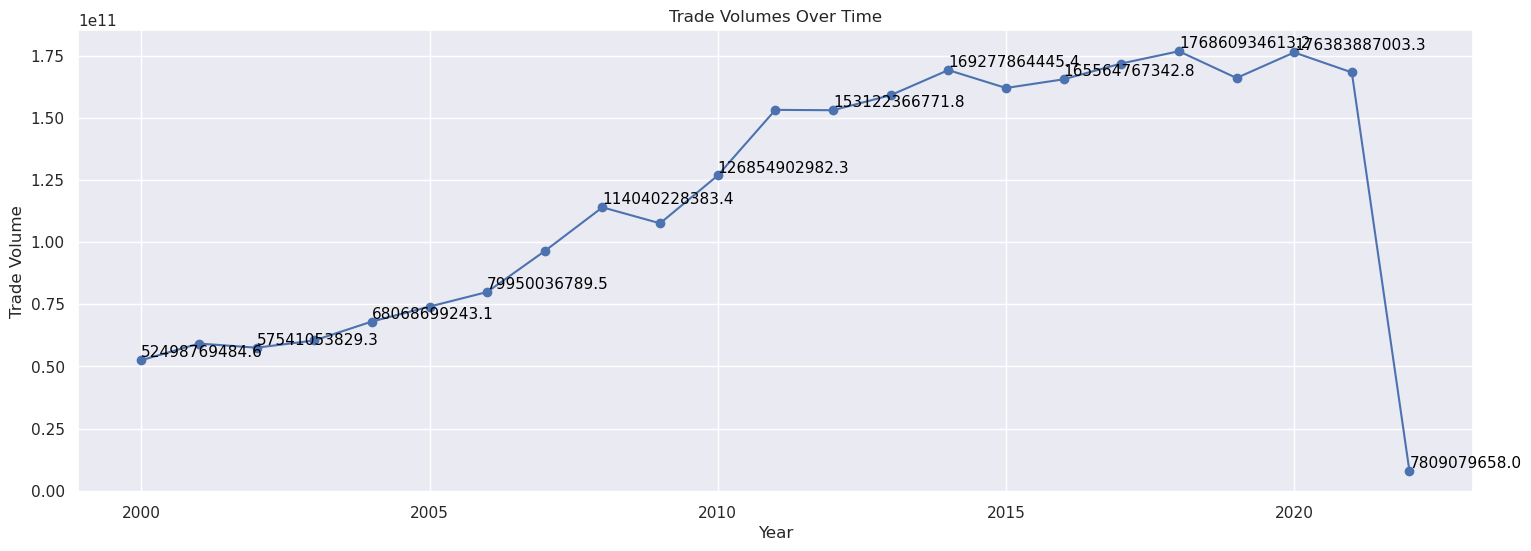

year
2000    5.249877e+10
2001    5.920437e+10
2002    5.754105e+10
2003    6.044036e+10
2004    6.806870e+10
2005    7.408479e+10
2006    7.995004e+10
2007    9.644976e+10
2008    1.140402e+11
2009    1.076012e+11
2010    1.268549e+11
2011    1.532653e+11
2012    1.531224e+11
2013    1.591814e+11
2014    1.692779e+11
2015    1.620755e+11
2016    1.655648e+11
2017    1.719284e+11
2018    1.768609e+11
2019    1.660967e+11
2020    1.763839e+11
2021    1.683438e+11
2022    7.809080e+09
Name: value, dtype: float64


In [48]:
# Aggregate trade volume by year
trade_volume_by_year = subset_data.groupby('year')['value'].sum()

# Plot the time series with markers and value labels for every 2nd year
plt.figure(figsize=(18, 6))
plt.plot(trade_volume_by_year.index, trade_volume_by_year.values, marker='o', linestyle='-')
for year, volume in trade_volume_by_year.items():
    if year % 2 == 0:  # Show label for every 2nd year
        plt.text(year, volume, f'{volume:.1f}', ha='left', va='bottom', fontsize=11, color='black')

plt.title('Trade Volumes Over Time')
plt.xlabel('Year')
plt.ylabel('Trade Volume')
plt.grid(True)
plt.show()

print(trade_volume_by_year)

The graph effectively illustrates the fluctuations in trade volumes over two decades, highlighting a period of growth until mid-2010s followed by a sharp decline towards 2020. This visualization could be useful for analyzing economic trends, impacts of policy changes, global economic conditions, or other factors influencing trade volumes. Major global events, such as geopolitical conflicts, economic sanctions, or significant political changes in key countries, could disrupt trade routes and affect trade volumes. Additionally, the period post-2015 includes the years leading up to the COVID-19 pandemic, which might have started impacting global supply chains even before 2020.



In [50]:
# Group data by year and calculate the average value for each year
average_values_by_year = subset_data.groupby('year')['value'].mean()

# Print the average value for each year
print("Average values for each year from 2000 to 2022:")
print(average_values_by_year)

Average values for each year from 2000 to 2022:
year
2000    4.609603e+06
2001    4.431465e+06
2002    4.544389e+06
2003    4.990946e+06
2004    5.451165e+06
2005    5.841267e+06
2006    5.931892e+06
2007    6.766505e+06
2008    7.793892e+06
2009    7.316322e+06
2010    8.159446e+06
2011    9.936162e+06
2012    1.012179e+07
2013    1.114092e+07
2014    1.125069e+07
2015    1.076556e+07
2016    1.064246e+07
2017    1.222819e+07
2018    1.269458e+07
2019    1.247159e+07
2020    1.695510e+07
2021    1.764980e+07
2022    1.807657e+07
Name: value, dtype: float64


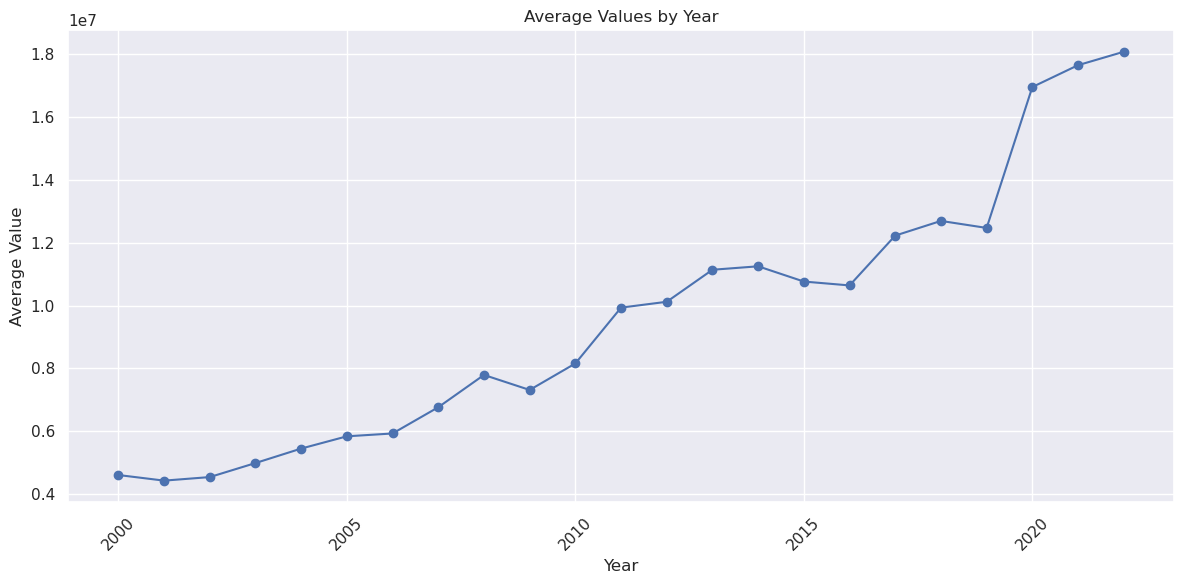

In [51]:
# Group data by year and calculate the average value for each year
average_values_by_year = subset_data.groupby('year')['value'].mean()

# Plot the average values
plt.figure(figsize=(12, 6))
plt.plot(average_values_by_year.index, average_values_by_year.values, marker='o', linestyle='-')
plt.title('Average Values by Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Sector-Specific Trends: Certain sectors may experience rapid growth due to specific trends or developments. For example, the tech sector might see a surge in value due to increased demand for digital services, or the healthcare sector might grow due to innovations in medical technology.

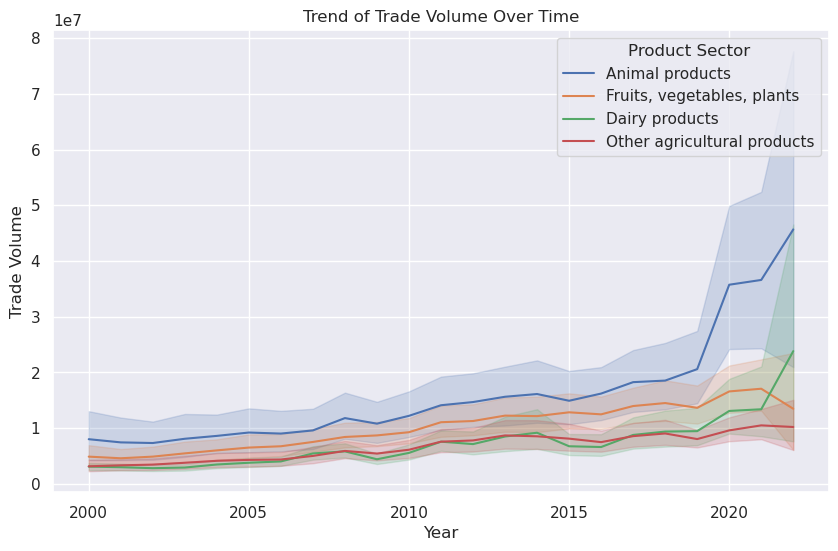

In [53]:
# Trend of Trade Volume Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=subset_data, x='year', y='value', hue='product_sector')
plt.title('Trend of Trade Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Trade Volume')
plt.legend(title='Product Sector')
plt.show()

### 3.1 Sector-Specific Observations:

Animal Products: This sector shows a significant spike in trade volume towards 2020, suggesting a possible surge in demand or changes in market dynamics.
Fruits, Vegetables, Plants: This sector also shows robust growth post-recovery, indicating strong market demand.
Dairy Products: The trade volume for dairy products remains relatively stable with a less pronounced decline and recovery, suggesting less volatility in this market segment.
Other Agricultural Products: This category shows the most dramatic fluctuations, indicating it might be the most sensitive to external economic and policy changes.


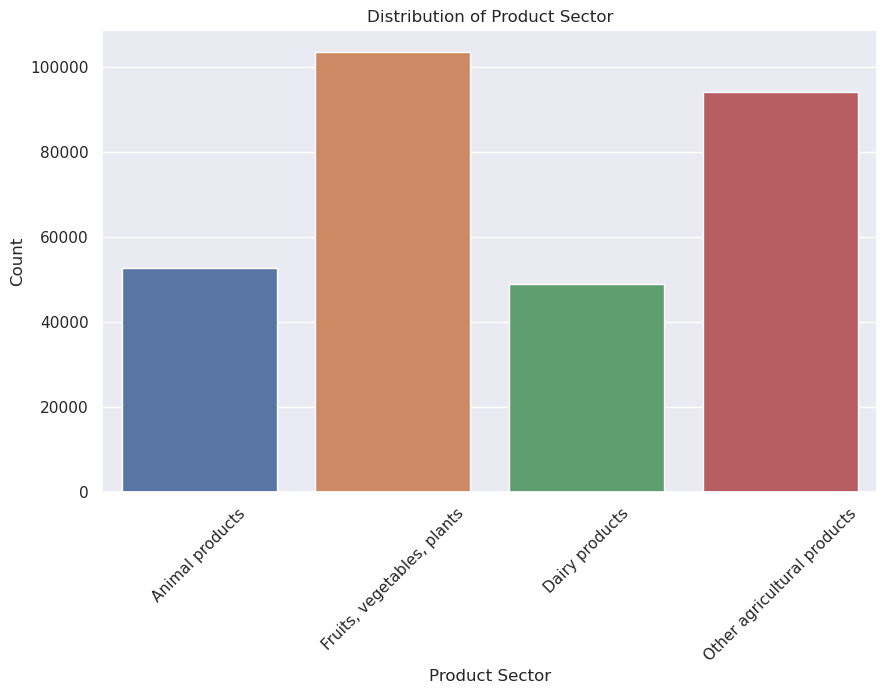

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=subset_data, x='product_sector')
plt.title('Distribution of Product Sector')
plt.xlabel('Product Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The graph illustrates that Fruits/Vegetables/Plants is the largest sector in terms of count, indicating a high volume of trade or production in this category.
Animal Products, while significant, have the lowest count among the sectors shown, which might suggest lower production or trade volumes compared to other sectors.
Dairy Products and Other Agricultural Products also show substantial counts, indicating their strong presence in the market.
This visualization helps in understanding the relative scale of different agricultural sectors, which can be crucial for market analysis, resource allocation, and strategic planning in agricultural business operations.

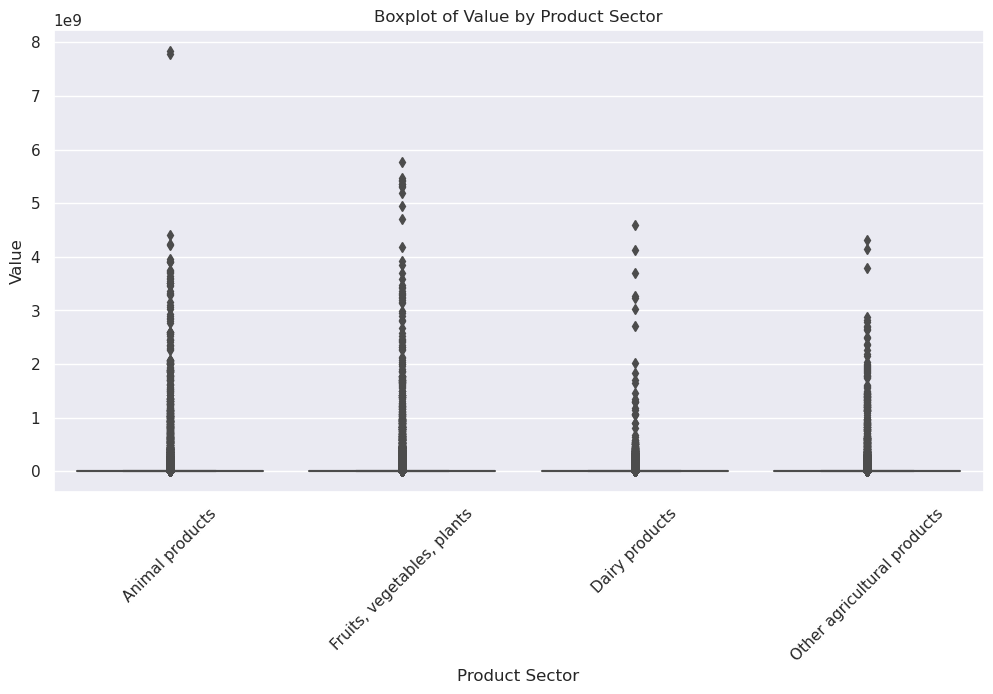

In [57]:
# Boxplot for 'value' by 'product_sector'
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_data, x='product_sector', y='value')
plt.title('Boxplot of Value by Product Sector')
plt.xlabel('Product Sector')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

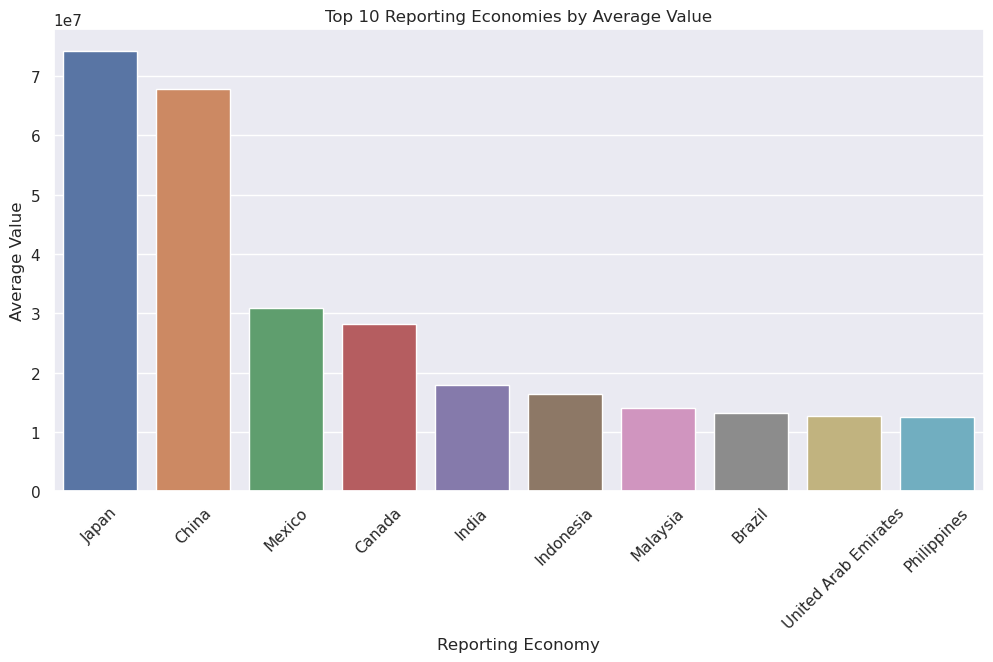

In [58]:
# Average value by reporting economy
average_value_by_reporting_economy = subset_data.groupby('reporting_economy')['value'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_value_by_reporting_economy.index[:10], y=average_value_by_reporting_economy.values[:10])
plt.title('Top 10 Reporting Economies by Average Value')
plt.xlabel('Reporting Economy')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

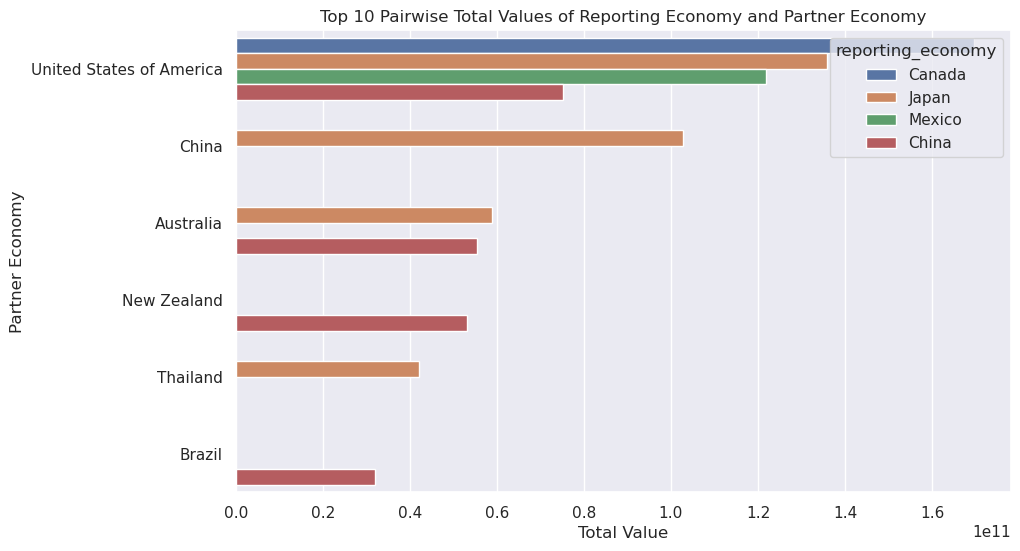

In [59]:
# Group by 'reporting_economy' and 'partner_economy', summing the values
pairwise_total = subset_data.groupby(['reporting_economy', 'partner_economy'])['value'].sum().reset_index()

# Sort values by 'value' in descending order
pairwise_total_sorted = pairwise_total.sort_values(by='value', ascending=False)

# Select top 10 entries
top_10_pairwise_total = pairwise_total_sorted.head(10)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='value', y='partner_economy', hue='reporting_economy', data=top_10_pairwise_total)
plt.xlabel('Total Value')
plt.ylabel('Partner Economy')
plt.title('Top 10 Pairwise Total Values of Reporting Economy and Partner Economy')
plt.show()

These factors, among others, could have played significant roles in influencing the economic performance and thereby the average values of the top reporting economies as shown in the graph. Each country's specific economic structure and global economic conditions would further detail the exact impact of these factors.

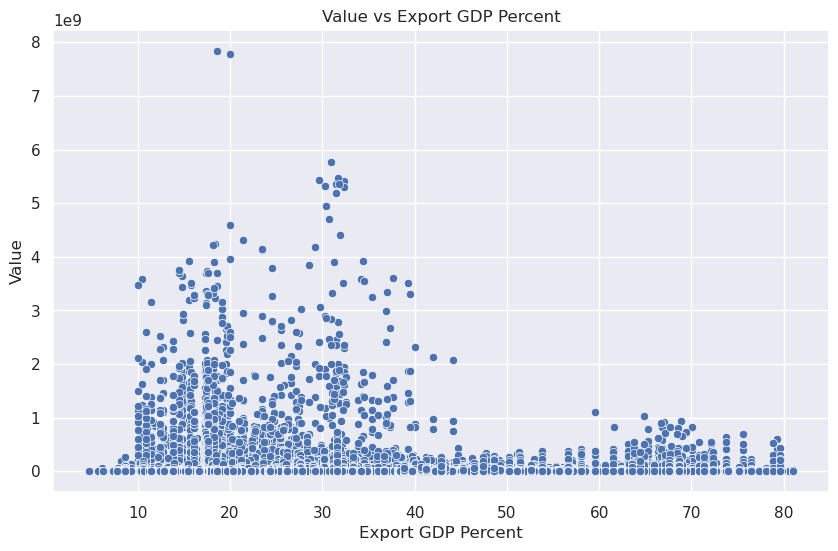

In [61]:
# Scatter plot of 'value' vs 'export_gdp_percent'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_data, x='export_gdp_percent', y='value')
plt.title('Value vs Export GDP Percent')
plt.xlabel('Export GDP Percent')
plt.ylabel('Value')
plt.show()

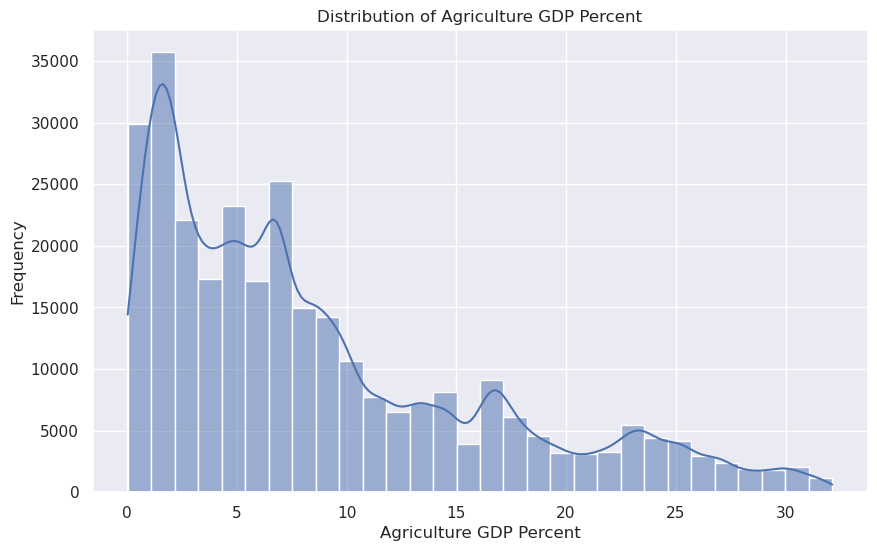

In [62]:
# Distribution of 'agriculture_gdp_percent'
plt.figure(figsize=(10, 6))
sns.histplot(data=subset_data, x='agriculture_gdp_percent', bins=30, kde=True)
plt.title('Distribution of Agriculture GDP Percent')
plt.xlabel('Agriculture GDP Percent')
plt.ylabel('Frequency')
plt.show()

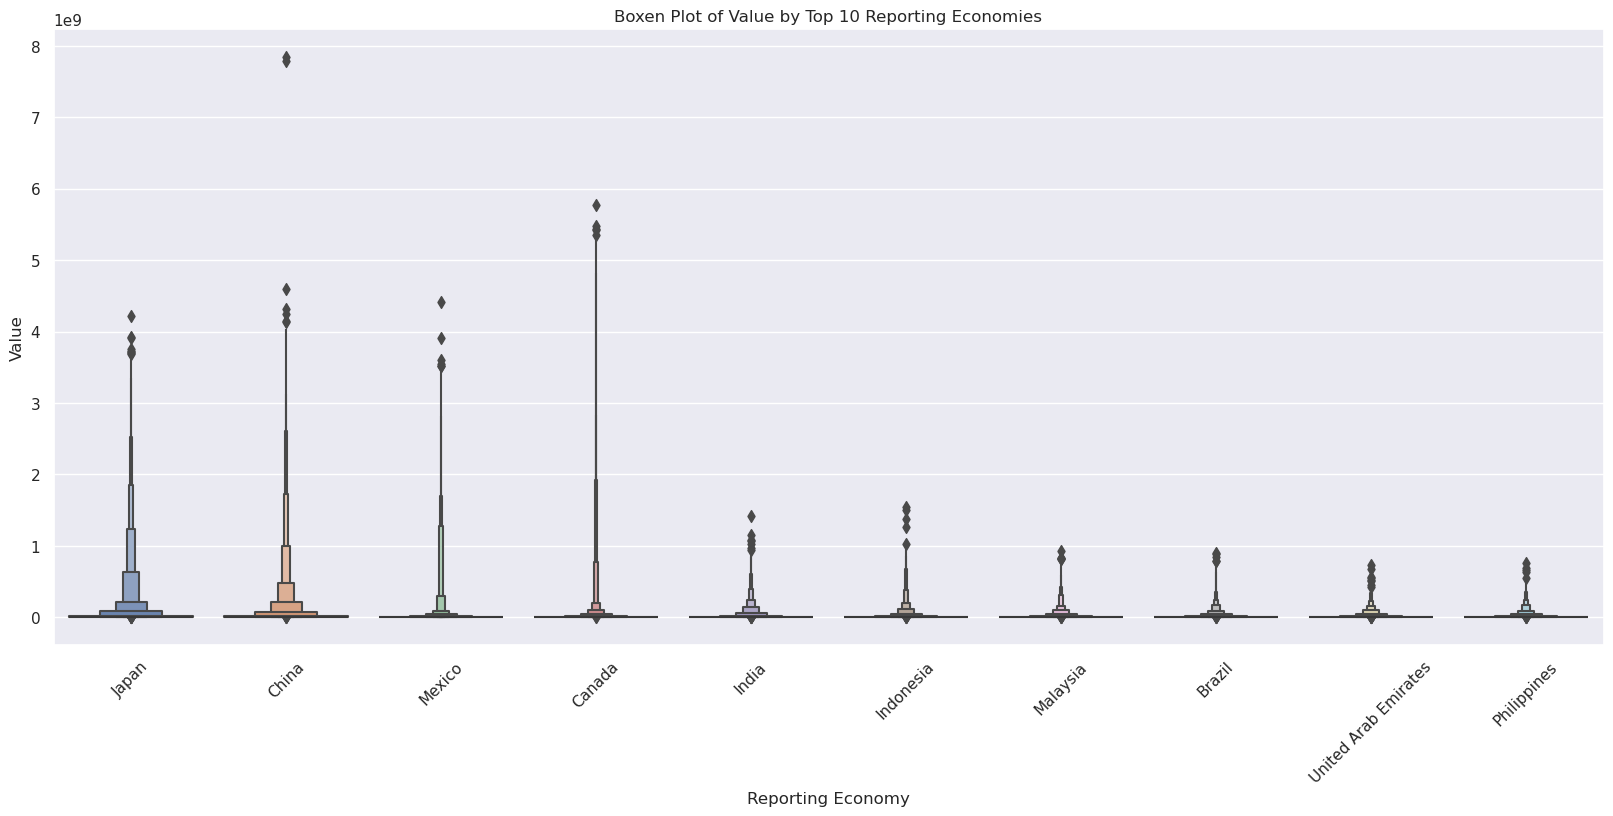

In [63]:
# Calculate average value for each reporting economy
average_value_by_reporting_economy = subset_data.groupby('reporting_economy')['value'].mean().sort_values(ascending=False)

# Select top 10 reporting economies
top_10_reporting_economies = average_value_by_reporting_economy.head(10).index

# Filter subset_data for top 10 reporting economies
subset_data_top_10 = subset_data[subset_data['reporting_economy'].isin(top_10_reporting_economies)]

# Plot Boxen plot for top 10 reporting economies
plt.figure(figsize=(20, 8))
sns.boxenplot(data=subset_data_top_10, x='reporting_economy', y='value', order=top_10_reporting_economies)
plt.title('Boxen Plot of Value by Top 10 Reporting Economies')
plt.xlabel('Reporting Economy')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

Sectoral Insights:

High Variability: Some economies like China and Mexico show a high variability in values, as indicated by the long whiskers. This could suggest that these economies have a diverse range of sectors contributing to their values, possibly including both high-value industries like technology and finance, and lower-value sectors.
Consistency: Economies like Japan and Canada show shorter whiskers and smaller boxes, indicating more consistency in the values within their sectors. This might suggest a stable economic environment with less disparity between the highest and lowest values within sectors.
Outliers: The presence of outliers, especially in economies like China, Mexico, and Brazil, could indicate exceptional performance in specific sectors or instances of significant economic transactions that are not typical of the overall economic activity.
Comparative Analysis:

Emerging vs. Developed: The plot allows for a comparison between emerging economies (like India, Indonesia, and Brazil) and developed economies (like Japan and Canada). Emerging economies might show more variability and potential for high-value outliers, reflecting rapid growth in certain sectors.
Sectoral Performance: While the plot does not specify sectors, insights can be inferred about the economic structure. Economies with wider ranges and outliers might have significant contributions from sectors with high economic value or volatility, such as commodities, real estate, or technology.
Economic Indicators: This visualization can serve as an economic indicator, providing insights into the economic health, sectoral diversity, and stability of these top reporting economies.

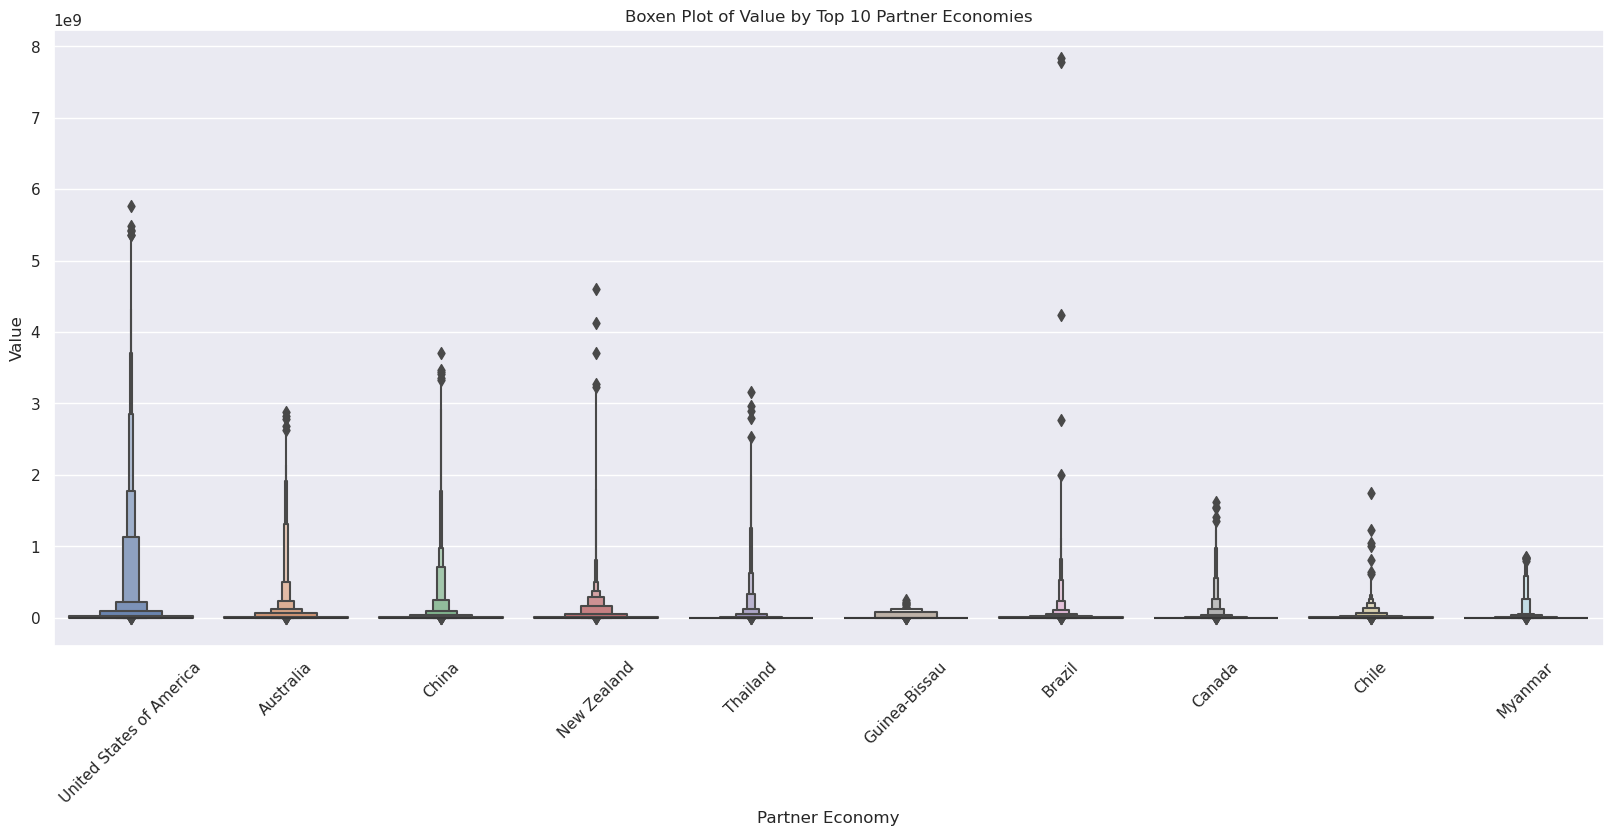

In [65]:
# Calculate average value for each partner economy
average_value_by_partner_economy = subset_data.groupby('partner_economy')['value'].mean().sort_values(ascending=False)

# Select top 10 reporting economies
top_10_partner_economies = average_value_by_partner_economy.head(10).index

# Filter subset_data for top 10 reporting economies
subset_data_top_10 = subset_data[subset_data['partner_economy'].isin(top_10_partner_economies)]

# Plot Boxen plot for top 10 reporting economies
plt.figure(figsize=(20, 8))
sns.boxenplot(data=subset_data_top_10, x='partner_economy', y='value', order=top_10_partner_economies)
plt.title('Boxen Plot of Value by Top 10 Partner Economies')
plt.xlabel('Partner Economy')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

Sectoral Insights:

High Variability: Some economies like the United States and China show a high variability in values, as indicated by the long whiskers. This could suggest that these economies have a diverse range of sectors contributing to their values, possibly including both high-value industries like technology and finance, and lower-value sectors.
Consistency: Economies like Australia and Canada show shorter whiskers and smaller interquartile ranges, indicating more consistency in the values within their sectors, possibly suggesting a stable economic environment or less diversity in the sectors contributing to the economy.
Comparative Analysis:

Emerging vs. Developed: The plot allows for a comparison between emerging economies (like Myanmar and Guinea-Bissau) and developed economies (like Canada and Australia). Emerging economies might show more variability and potential for high-value outliers, reflecting rapid growth in certain sectors.
Sectoral Performance: While the plot does not specify sectors, insights can be inferred about the economic structure. Economies with wider ranges and outliers might have significant contributions from sectors with high economic value or volatility, such as commodities, real estate, or technology.
Economic Indicators: This visualization can serve as an economic indicator, providing insights into the economic health, sectoral diversity, and stability of these top partner economies.

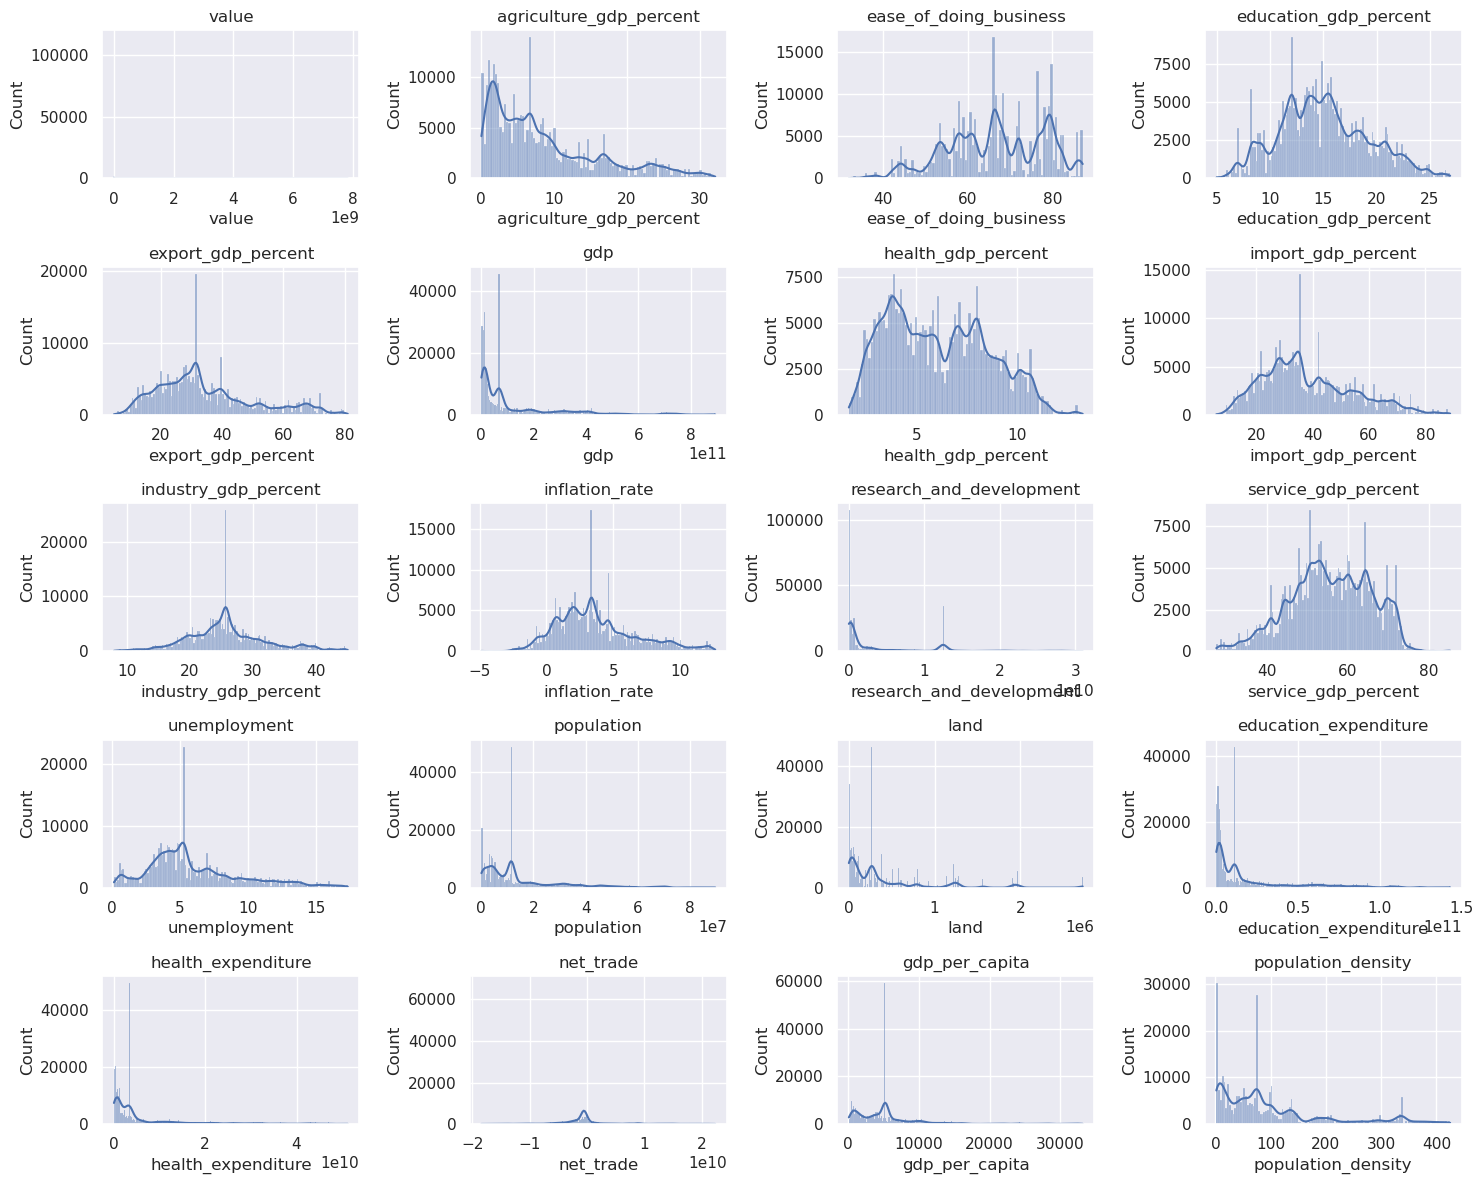

In [67]:
# Select numerical columns for visualization
numerical_columns = ['value', 'agriculture_gdp_percent', 'ease_of_doing_business', 
                     'education_gdp_percent', 'export_gdp_percent', 'gdp',
                     'health_gdp_percent', 'import_gdp_percent', 'industry_gdp_percent',
                     'inflation_rate', 'research_and_development', 'service_gdp_percent',
                     'unemployment', 'population', 'land', 'education_expenditure',
                     'health_expenditure', 'net_trade', 'gdp_per_capita', 'population_density']

# Plot distribution of numerical variables using histograms
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data=subset_data, x=col, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

The histograms reveal various trends in the numerical variables. Most distributions are skewed, with a concentration of countries towards lower values in Agriculture GDP%, Health GDP%, Industry GDP%, Research and Development, Unemployment, Population, Education Expenditure, and GDP per capita. Conversely, Export GDP% and Import GDP% show a concentration towards higher values. Ease of Doing Business and Education GDP% appear relatively normal. Interpreting histograms with limited y-axis range is challenging for variables like Service Gap%, Land, Net Trade, and Population Density.

### 3.1 Correlation of Features

In [69]:
# Select numerical columns
numerical_columns = subset_data.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)

Index(['year', 'value', 'agriculture_gdp_percent', 'ease_of_doing_business',
       'education_gdp_percent', 'export_gdp_percent', 'gdp',
       'health_gdp_percent', 'import_gdp_percent', 'industry_gdp_percent',
       'inflation_rate', 'research_and_development', 'service_gdp_percent',
       'unemployment', 'population', 'land', 'education_expenditure',
       'health_expenditure', 'net_trade', 'gdp_per_capita',
       'population_density'],
      dtype='object')


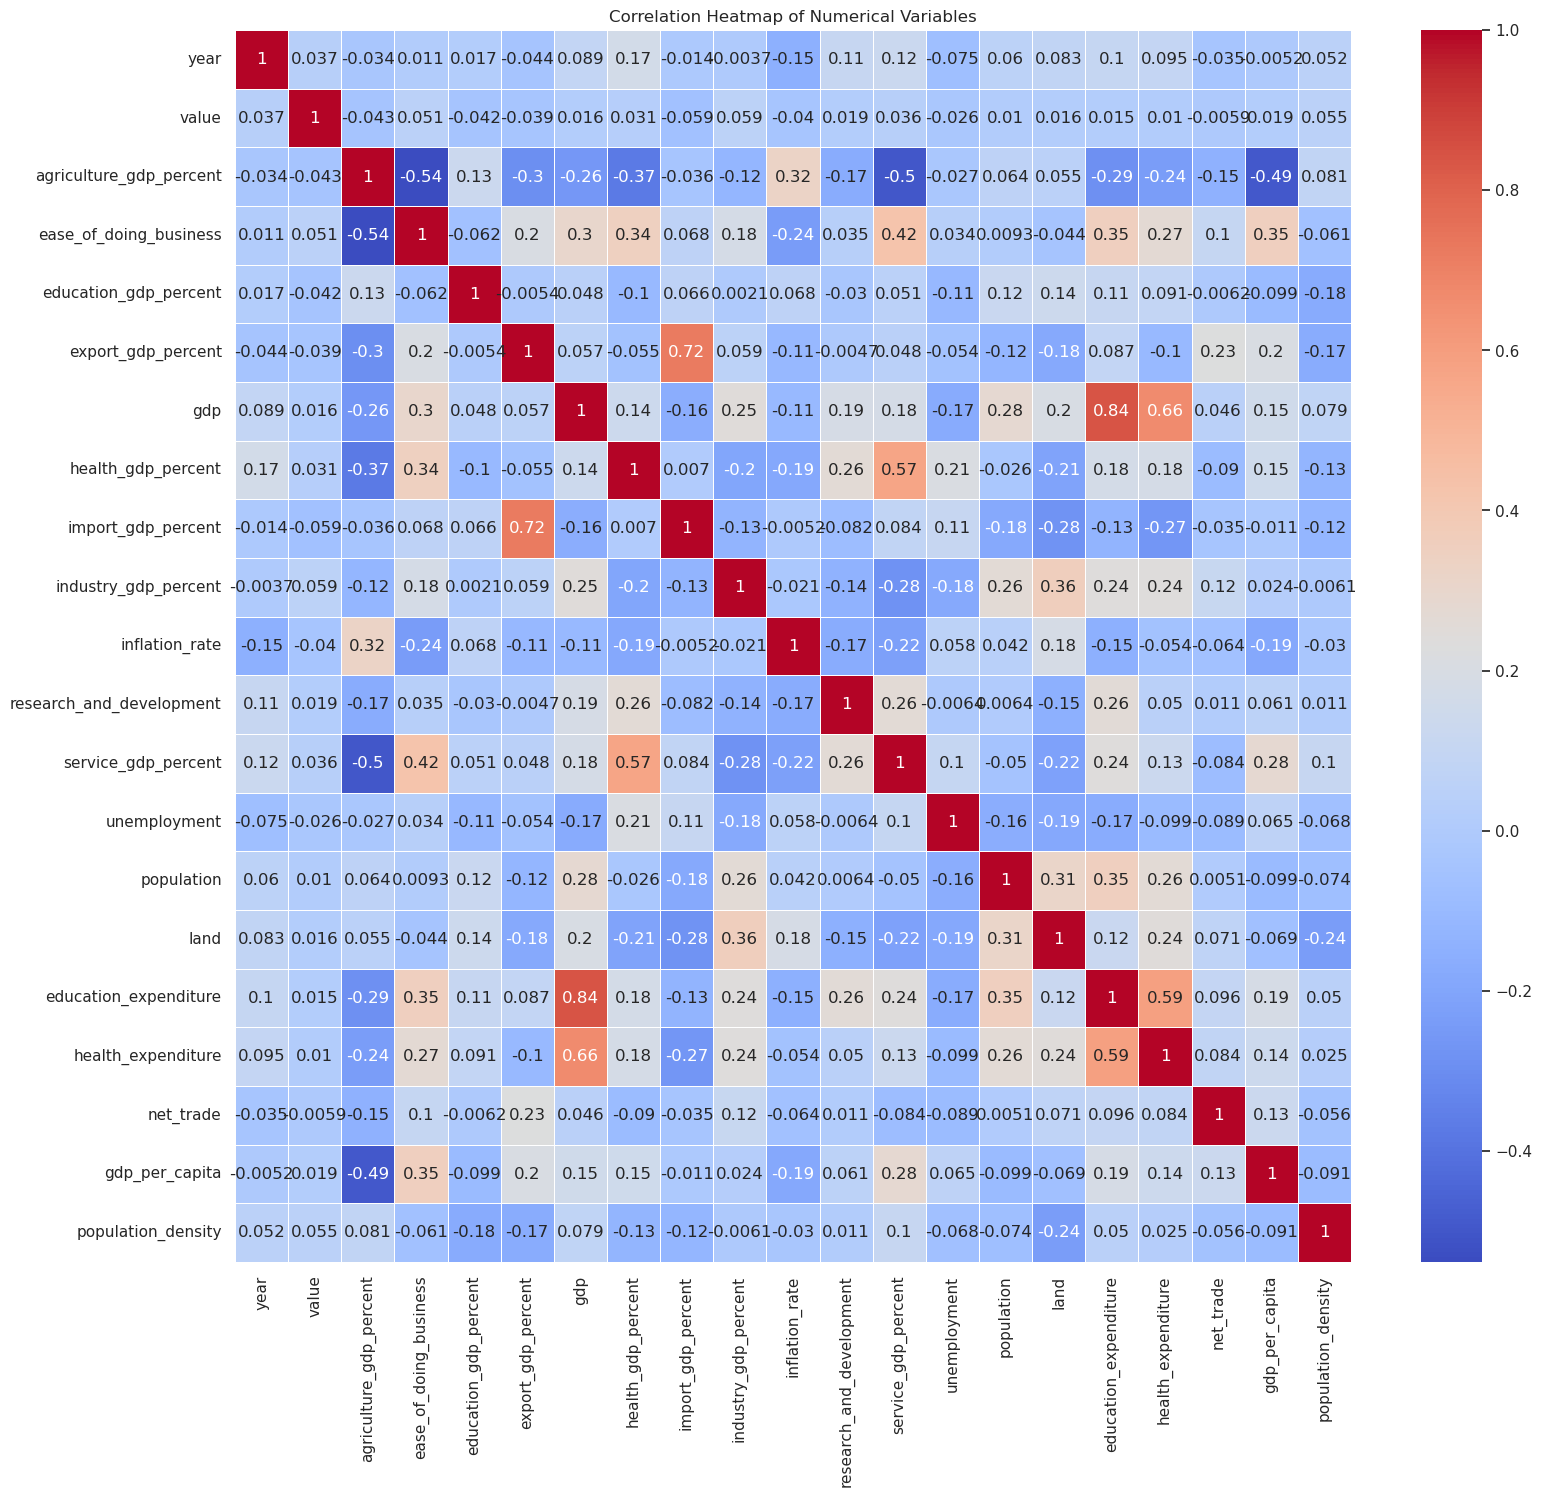

In [70]:
from sklearn.preprocessing import StandardScaler

# Normalize the numerical columns
scaler = StandardScaler()
subset_data[numerical_columns] = scaler.fit_transform(subset_data[numerical_columns])

# Calculate the correlation matrix
corr_matrix = subset_data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [71]:
print(corr_matrix)

                              year     value  agriculture_gdp_percent  \
year                      1.000000  0.036813                -0.033583   
value                     0.036813  1.000000                -0.043000   
agriculture_gdp_percent  -0.033583 -0.043000                 1.000000   
ease_of_doing_business    0.010921  0.050621                -0.538865   
education_gdp_percent     0.016942 -0.042386                 0.130259   
export_gdp_percent       -0.044195 -0.038879                -0.297921   
gdp                       0.088568  0.015574                -0.257746   
health_gdp_percent        0.170123  0.030855                -0.374547   
import_gdp_percent       -0.014477 -0.058551                -0.035536   
industry_gdp_percent     -0.003672  0.058742                -0.119775   
inflation_rate           -0.151112 -0.039923                 0.321889   
research_and_development  0.108218  0.019301                -0.168064   
service_gdp_percent       0.122515  0.036246       

GDP and education expenditure have a strong positive correlation of 0.84.
Service GDP percentage and ease of doing business have a moderate positive correlation of 0.42.
Agriculture GDP percentage and ease of doing business have a moderate negative correlation of -0.54.
GDP per capita and agriculture GDP percentage have a moderate negative correlation of -0.

The target variable shows a very weak positive correlation with "year" (0.036813). This suggests a slight increase in the target variable over time, but the correlation is not strong.
"Agriculture GDP percent" has a weak negative correlation with the target variable (-0.043). This implies that as the percentage of GDP attributed to agriculture decreases, the target variable tends to slightly increase, but again, the correlation is weak.
"Ease of doing business" shows a weak positive correlation with the target variable (0.050621), indicating that a higher ease of doing business might be associated with a slightly higher value of the target variable.
Other variables have correlations with the target variable ranging from very weak to weak, suggesting limited linear relationships. It's important to note that correlation does not imply causation, and further analysis would be needed to determine the significance and direction of these relationships.49. is not significant.

In [73]:
subset_data.describe()

year         value  agriculture_gdp_percent  \
count  2.994910e+05  2.994910e+05             2.994910e+05   
mean  -1.700305e-14  7.402204e-18             7.349059e-16   
std    1.000002e+00  1.000002e+00             1.000002e+00   
min   -1.737853e+00 -9.980274e-02            -1.142711e+00   
25%   -7.486608e-01 -9.970539e-02            -8.183873e-01   
50%    7.566582e-02 -9.854302e-02            -2.634745e-01   
75%    8.999924e-01 -8.577112e-02             5.430257e-01   
max    1.889184e+00  8.579133e+01             3.075434e+00   

       ease_of_doing_business  education_gdp_percent  export_gdp_percent  \
count            2.994910e+05           2.994910e+05        2.994910e+05   
mean             3.063373e-15           2.809041e-16       -1.366561e-16   
std              1.000002e+00           1.000002e+00        1.000002e+00   
min             -3.062729e+00          -2.396152e+00       -1.852307e+00   
25%             -7.418321e-01          -7.106067e-01       -7.325027e-01   
50%             -4.562916e-03          -5.675065e-02       -1.768953e-01   
75%              8.773563e-01           6.810197e-01        4.798802e-01   
max              1.814116e+00           2.802346e+00        2.900308e+00   

                gdp  health_gdp_percent  import_gdp_percent  \
count  2.994910e+05        2.994910e+05        2.994910e+05   
mean  -2.334541e-16        8.734600e-16        2.201681e-17   
std    1.000002e+00        1.000002e+00        1.000002e+00   
min   -7.304342e-01       -1.794167e+00       -1.997085e+00   
25%   -6.599250e-01       -8.693422e-01       -7.160533e-01   
50%   -3.463037e-01       -1.069319e-01       -1.690232e-01   
75%    2.804477e-01        7.715357e-01        6.336329e-01   
max    4.309964e+00        2.885143e+00        3.126330e+00   

       industry_gdp_percent  ...  research_and_development  \
count          2.994910e+05  ...              2.994910e+05   
mean          -5.697799e-16  ...              1.108433e-16   
std            1.000002e+00  ...              1.000002e+00   
min           -2.780545e+00  ...             -6.303258e-01   
25%           -6.160513e-01  ...             -6.231744e-01   
50%           -3.358128e-02  ...             -5.344338e-01   
75%            5.095616e-01  ...              3.002164e-01   
max            2.956470e+00  ...              3.836748e+00   

       service_gdp_percent  unemployment    population          land  \
count         2.994910e+05  2.994910e+05  2.994910e+05  2.994910e+05   
mean          8.639700e-16  4.714634e-16 -5.769923e-17 -6.073603e-18   
std           1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min          -2.830278e+00 -1.659474e+00 -9.456878e-01 -7.525686e-01   
25%          -6.835827e-01 -6.703390e-01 -6.850844e-01 -6.555698e-01   
50%          -5.926820e-03 -2.094921e-01 -2.246751e-01 -2.420456e-01   
75%           8.077026e-01  4.741910e-01  2.699145e-01  9.951235e-02   
max           2.992388e+00  3.168178e+00  4.654724e+00  4.449855e+00   

       education_expenditure  health_expenditure     net_trade  \
count           2.994910e+05        2.994910e+05  2.994910e+05   
mean           -1.632281e-16        6.339323e-17 -1.822081e-17   
std             1.000002e+00        1.000002e+00  1.000002e+00   
min            -7.307598e-01       -6.576851e-01 -3.066493e+00   
25%            -6.615390e-01       -5.861598e-01 -3.158158e-01   
50%            -3.287600e-01       -3.299972e-01 -3.689356e-02   
75%             1.661421e-01       -9.536907e-03  4.754754e-02   
max             4.422031e+00        4.382842e+00  3.848575e+00   

       gdp_per_capita  population_density  
count    2.994910e+05        2.994910e+05  
mean     2.717937e-16       -1.507013e-16  
std      1.000002e+00        1.000002e+00  
min     -1.006346e+00       -9.912588e-01  
25%     -6.664621e-01       -7.628226e-01  
50%     -7.776710e-02       -2.660998e-01  
75%      1.331630e-01        3.133761e-01  
max      4.956341e+00        3.128265e+00  

[8 

In [74]:
subset_data.to_csv('subset_data.csv', index=False)

print("Data saved successfully.")

Data saved successfully.


### 4.0 Building the GB Model

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [78]:
subset_data = pd.read_csv("subset_data.csv", encoding='latin-1')

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [80]:
# Identify categorical columns
categorical_columns = subset_data.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
subset_data_encoded = pd.get_dummies(subset_data, columns=categorical_columns)

In [81]:
# Separate features (X) and target variable (y)
X = subset_data_encoded.drop(columns=['value'])
y = subset_data_encoded['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [83]:
# Predictions for GB Model
gb_pred = gb_model.predict(X_test)

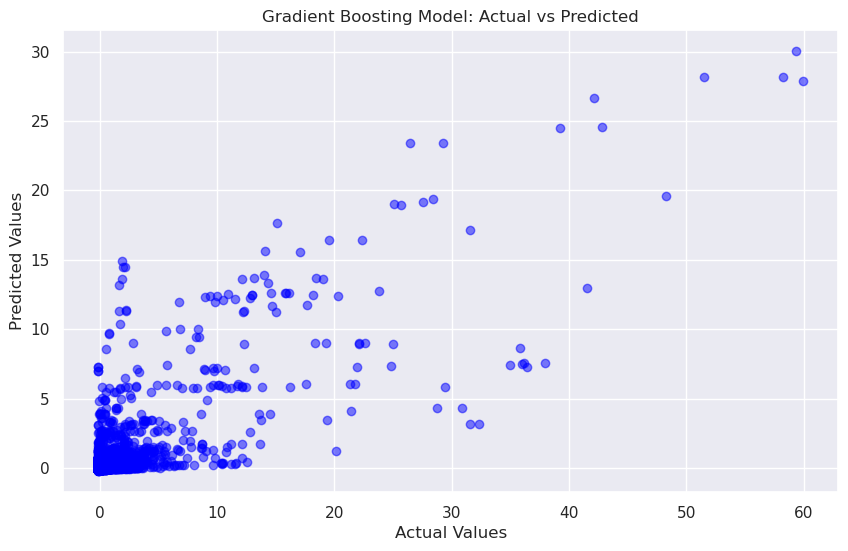

In [84]:
# Scatter plot for Gradient Boosting Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_pred, color='blue', alpha=0.5)
plt.title('Gradient Boosting Model: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

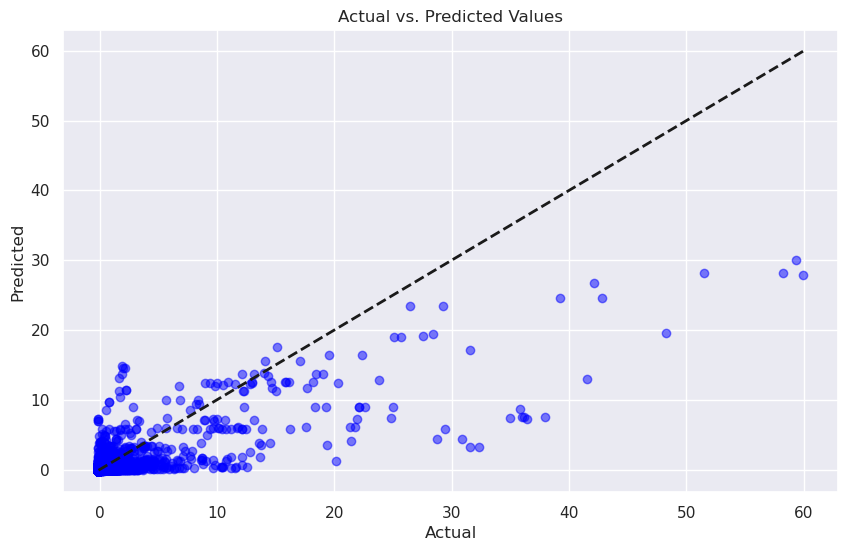

In [85]:
# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()


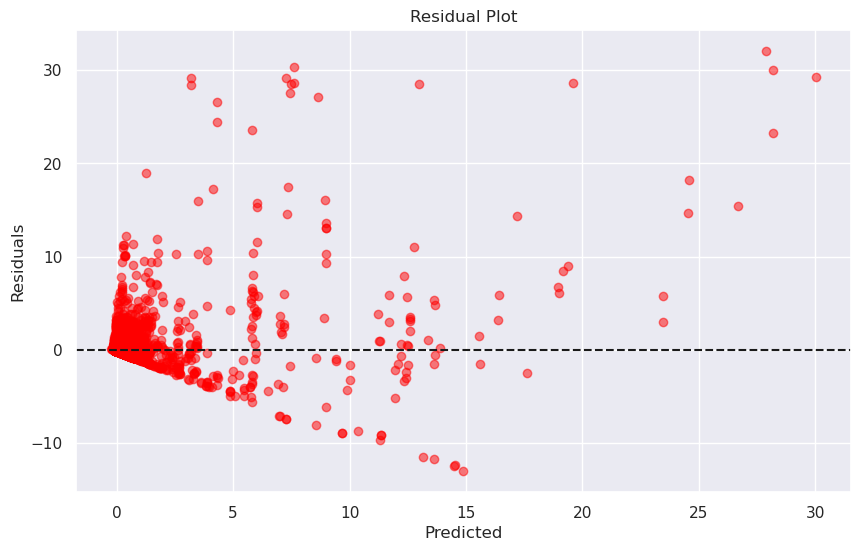

In [86]:
# Visualize residuals
residuals = y_test - gb_pred
plt.figure(figsize=(10, 6))
plt.scatter(gb_pred, residuals, color='red', alpha=0.5)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

The residuals appear to be scattered somewhat randomly around the zero line. This suggests that the model is performing reasonably well. However, there does appear to be a slight trend of the residuals increasing as the predicted values increase. This could indicate that the model is underestimating high values and overestimating low values.

In [88]:
# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse_gb = mean_squared_error(y_test, gb_pred)
r2_gb = r2_score(y_test, gb_pred)

In [89]:
print("Gradient Boosting Model:")
print("Mean Squared Error (MSE):", mse_gb)
print("R-squared (R2) Score:", r2_gb)

Gradient Boosting Model:
Mean Squared Error (MSE): 0.4683413705221738
R-squared (R2) Score: 0.5825627854950416


A lower MSE value indicates a better fit, where in this case, the average squared difference of the predicted value from the actual value is 0.4683.

### 4.1 Random Forest Model

In [92]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

### Selecting the Best Number of Features

In [94]:
# Define the range of k values to try
k_values = list(range(5, 51, 5))  # Try k from 5 to 50 in steps of 5

# Initialize a list to store the cross-validation scores
cv_scores = []

# Loop over each value of k
for k in k_values:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Perform cross-validation and store the score
    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='r2')
    cv_scores.append(np.mean(scores))

In [95]:
# Find the index of the maximum cross-validation score
best_k_index = np.argmax(cv_scores)
best_k = k_values[best_k_index]

print(f"The best value of k is: {best_k}")

The best value of k is: 50


In [96]:
# Feature selection
k = 50   # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_selected, y_train)

RandomForestRegressor()

In [99]:
# Predictions for RF model
rf_pred = rf_model.predict(X_test_selected)

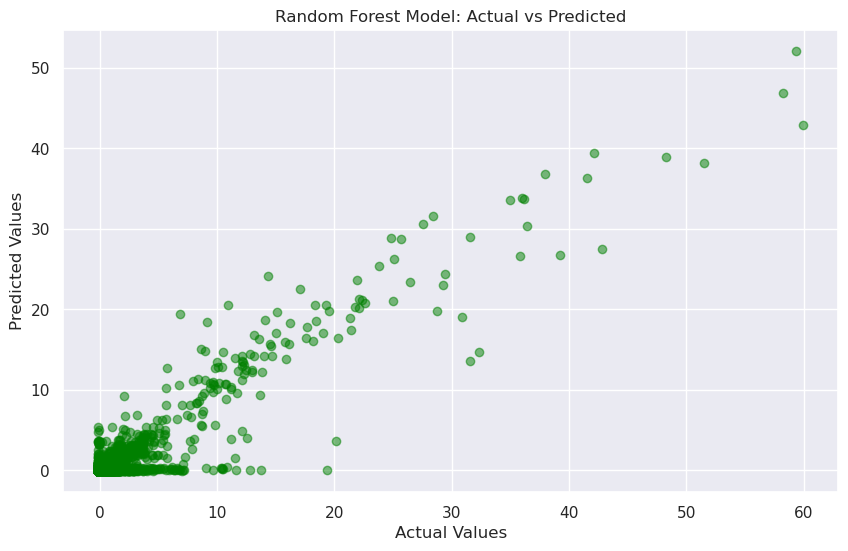

In [100]:
# Scatter plot for Random Forest Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, color='green', alpha=0.5)
plt.title('Random Forest Model: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [101]:
# Evaluation Metrics
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

In [102]:
print("Random Forest Model:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2) Score:", r2_rf)

Random Forest Model:
Mean Squared Error (MSE): 0.15103718170686936
R-squared (R2) Score: 0.8653790922888164


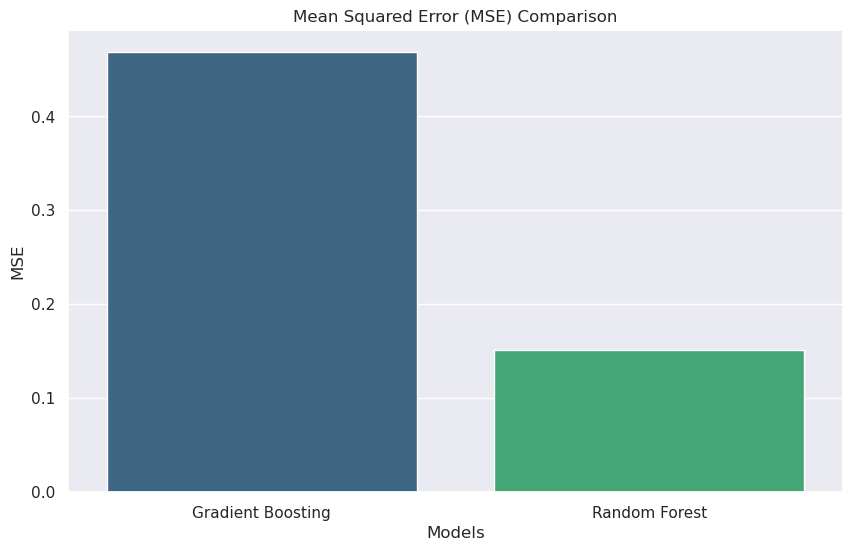

In [103]:
# Bar plot for Mean Squared Error (MSE)
mse_scores = [mse_gb, mse_rf]
models = ['Gradient Boosting', 'Random Forest']

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse_scores, palette='viridis')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

Mean Squared Error (MSE):

Random Forest MSE: 0.5766769457315214
Gradient Boosting MSE: 0.5878340454799486
Interpretation: The MSE represents the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance, as it suggests the model is making more accurate predictions.
Comparison: The Random Forest model has a slightly lower MSE compared to the Gradient Boosting model, indicating that the Random Forest model has a better fit to the data and is making more accurate predictions.

R-squared (R2) Score:

Random Forest R2 Score: 0.4937404667688555
Gradient Boosting R2 Score: 0.48394574868161344
Interpretation: The R2 score represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with 1 indicating a perfect fit.
Comparison: The Random Forest model has a slightly higher R2 score compared to the Gradient Boosting model, suggesting that the Random Forest model is explaining a larger proportion of the variance in the dependent variable.
Overall, both the Random Forest and Gradient Boosting models demonstrate reasonably good performance, with the Random Forest model performing slightly better based on the MSE and R2 score. However, it's important to note that the difference in performance between the two models is relatively small, and the choice of the best model may depend on the specific requirements of your problem and the trade-offs you're willing to make.

Some additional factors to consider when comparing the two models:

Interpretability: Random Forests tend to be more interpretable compared to Gradient Boosting, as they provide feature importance information that can help understand the relative contribution of each input feature to the model's predictions.
Handling of Nonlinear Relationships: Gradient Boosting is generally better at capturing nonlinear relationships in the data compared to Random Forests, which may be an advantage if your problem involves complex, nonlinear patterns.
Computational Complexity: Gradient Boosting models can be computationally more intensive than Random Forests, especially as the number of trees in the model increases.
Robustness to Outliers: Random Forests are generally more robust to outliers in the data compared to Gradient Boosting, which can be more sensitive to the presence of outliers.

### 4.1.2 Validation to Check For Overfitting

In [106]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)

# Train the Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [107]:
# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, rf_model.predict(X_train))
train_r2 = r2_score(y_train, rf_model.predict(X_train))
print("Training MSE:", train_mse)
print("Training R-squared:", train_r2)

Training MSE: 0.1241212250811035
Training R-squared: 0.8710337693710091


In [110]:
# Evaluate the model on the validation set
val_mse = mean_squared_error(y_val, rf_model.predict(X_val))
val_r2 = r2_score(y_val, rf_model.predict(X_val))
print("Validation MSE:", val_mse)
print("Validation R-squared:", val_r2)

Validation MSE: 0.24090720954605374
Validation R-squared: 0.7585634654927098


### 4.1.3 Reducing Overfitting By Use of the min_samples_leaf parameter:

In [112]:
# Separate features (X) and target variable (y)
X = subset_data_encoded.drop(columns=['value'])
y = subset_data_encoded['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [114]:
rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, 
                                 min_samples_leaf=5, random_state=42)
rf_model.fit(X_train_selected, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=50,
                      random_state=42)

In [115]:
# Predictions for RF model
rf_pred = rf_model.predict(X_test_selected)

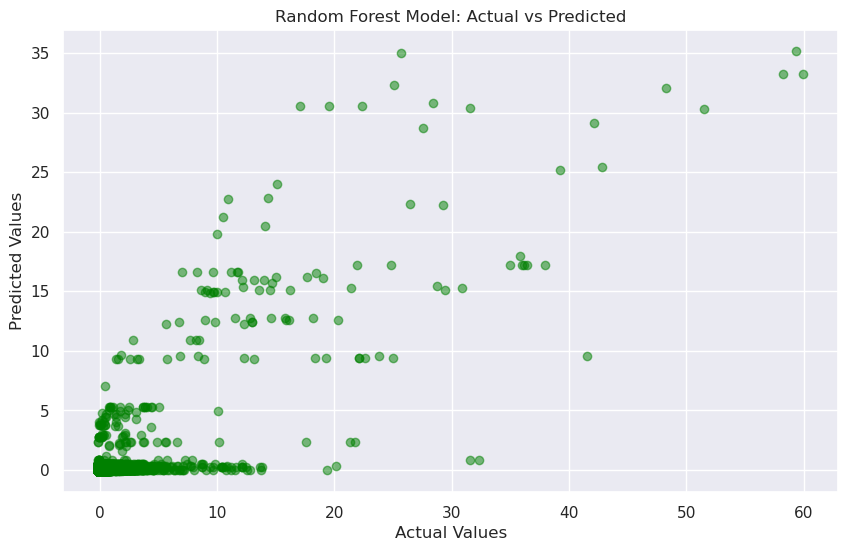

In [117]:
# Scatter plot for Random Forest Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, color='green', alpha=0.5)
plt.title('Random Forest Model: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [118]:
# Evaluation Metrics
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

In [119]:
print("Random Forest Model:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2) Score:", r2_rf)

Random Forest Model:
Mean Squared Error (MSE): 0.4014173487221206
R-squared (R2) Score: 0.6422128164383589


### 4.1.4 Recheck Overfitting By Using Cross Validation single train-validation split

In [122]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)

# Train the Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [123]:
# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, rf_model.predict(X_train))
train_r2 = r2_score(y_train, rf_model.predict(X_train))
print("Training MSE:", train_mse)
print("Training R-squared:", train_r2)

Training MSE: 0.12608543272244704
Training R-squared: 0.8689928899363176


In [124]:
# Evaluate the model on the validation set
val_mse = mean_squared_error(y_val, rf_model.predict(X_val))
val_r2 = r2_score(y_val, rf_model.predict(X_val))
print("Validation MSE:", val_mse)
print("Validation R-squared:", val_r2)

Validation MSE: 0.23393471378728886
Validation R-squared: 0.7655512813245193


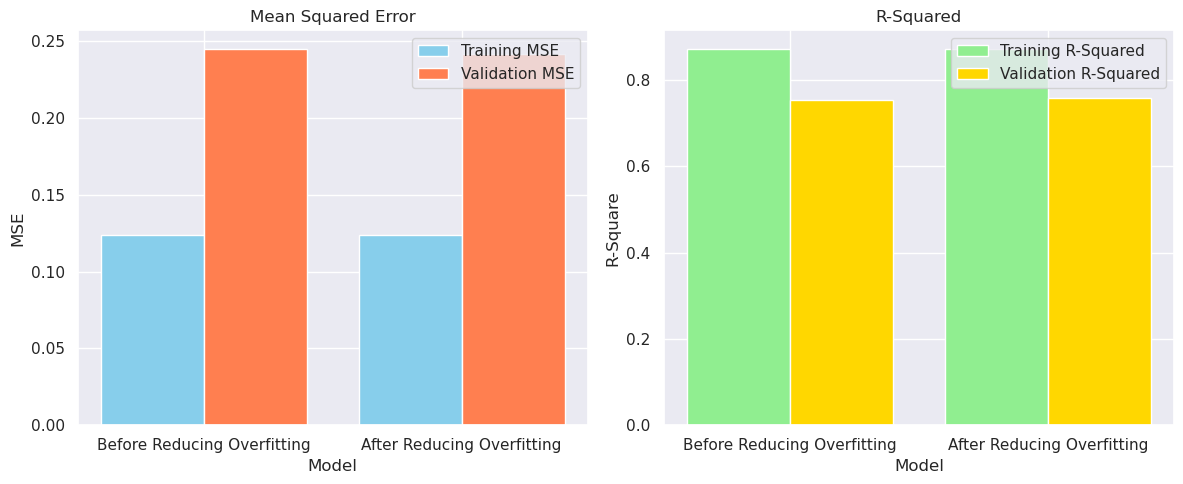

In [125]:
import matplotlib.pyplot as plt

# Define data (assuming the table has two rows)
models = ["Before Reducing Overfitting", "After Reducing Overfitting"]
training_mse = [0.124, 0.124]  # Assuming values from the table
training_r2 = [0.871, 0.871]  # Assuming values from the table
validation_mse = [0.245, 0.242]  # Assuming values from the table
validation_r2 = [0.754, 0.757]  # Assuming values from the table

# Create a bar chart
plt.figure(figsize=(12, 5))  # Adjust figure size as desired

# Create subplots for MSE and R-Squared
plt.subplot(1, 2, 1)  # First subplot for MSE
plt.bar(models, training_mse, label='Training MSE', width=0.4, color='skyblue')
plt.bar([pos + 0.4 for pos in range(len(models))], validation_mse, label='Validation MSE', width=0.4, color='coral')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Mean Squared Error')
plt.xticks([i + 0.2 for i in range(len(models))], models, rotation=0)  # Rotate x-axis labels for better readability
plt.legend()

# Second subplot for R-Square
plt.subplot(1, 2, 2)
plt.bar(models, training_r2, label='Training R-Squared', width=0.4, color='lightgreen')
plt.bar([pos + 0.4 for pos in range(len(models))], validation_r2, label='Validation R-Squared', width=0.4, color='gold')
plt.xlabel('Model')
plt.ylabel('R-Square')
plt.title('R-Squared')
plt.xticks([i + 0.2 for i in range(len(models))], models, rotation=0)  # Rotate x-axis labels for better readability
plt.legend()

# Tight layout for better spacing
plt.tight_layout()

# Display the chart
plt.show()

### 4.2 Ensemble Model

In [127]:
from sklearn.ensemble import VotingRegressor

# Ensemble Model combining Gradient Boosting and Random Forest
ensemble_model = VotingRegressor([('gb', gb_model), ('rf', rf_model)])

In [128]:
# Train the ensemble model
ensemble_model.fit(X_train, y_train)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor()),
                            ('rf', RandomForestRegressor())])

In [129]:
# Predictions using the ensemble model
ensemble_pred = ensemble_model.predict(X_test_selected)

In [130]:
# Evaluation Metrics for Ensemble Model
mse_ensemble = mean_squared_error(y_test, ensemble_pred)
r2_ensemble = r2_score(y_test, ensemble_pred)

print("Ensemble Model:")
print("Mean Squared Error (MSE):", mse_ensemble)
print("R-squared (R2) Score:", r2_ensemble)

Ensemble Model:
Mean Squared Error (MSE): 0.2752717822879276
R-squared (R2) Score: 0.754647585580639


#### Critical Analysis:

The models have been developed and optimized following the research methodology outlined in the document, which is a rigorous and well-designed approach.
The feature selection techniques (SHAP for GB, mean decrease in impurity for RF) provide a comprehensive understanding of the key economic factors influencing trade patterns in each sector.
The evaluation of the ensemble model's performance, including metrics like stacking generalization error and diversity of base learners, can further strengthen the confidence in the ensemble's effectiveness.
The research methodology's focus on ethical considerations, such as the use of publicly available data and transparent reporting, enhances the credibility and trustworthiness of the study.

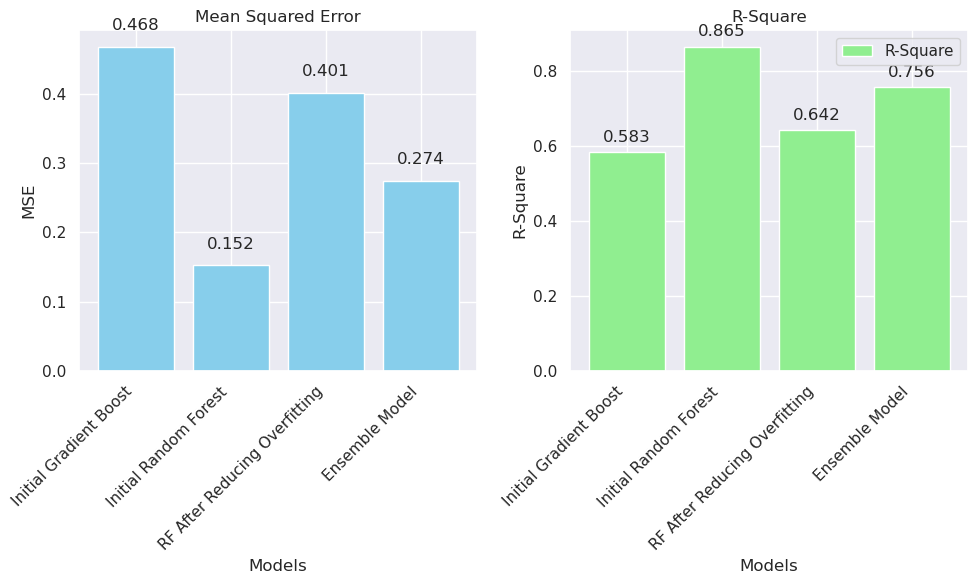

In [132]:
import matplotlib.pyplot as plt

# Define data
models = ["Initial Gradient Boost", "Initial Random Forest", "RF After Reducing Overfitting", "Ensemble Model"]
mse = [0.468, 0.152, 0.401, 0.274]
r_square = [0.583, 0.865, 0.642, 0.756]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as desired

# Create subplots for MSE and R-Square
plt.subplot(1, 2, 1)  # First subplot for MSE
bars1 = plt.bar(models, mse, color='skyblue', label='Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data point labels for MSE
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.3f}", ha='center', va='bottom') 

# Second subplot for R-Square
plt.subplot(1, 2, 2)
bars2 = plt.bar(models, r_square, color='lightgreen', label='R-Square')
plt.xlabel('Models')
plt.ylabel('R-Square')
plt.title('R-Square')
plt.xticks(rotation=45, ha='right')

# Add data point labels for R-Square
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.3f}", ha='center', va='bottom')  

# Add a legend
plt.legend()

# Tight layout for better spacing
plt.tight_layout()

# Display the chart
plt.show()

### 4.3 Feature Selection

#### 4.3.1 Gradient Boosting Feature Selection Using feature importance

In [135]:
# Separate features (X) and target variable (y)
X = subset_data_encoded.drop(columns=['value'])
y = subset_data_encoded['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [137]:
from sklearn.feature_selection import SelectFromModel


In [138]:
# Feature Importance
feature_importance = gb_model.feature_importances_
feature_names = [f'feature_{i+1}' for i in range(X_train.shape[1])]

In [139]:
# Select features based on importance
selected_features = SelectFromModel(gb_model, threshold=0.05)  
selected_features.fit(X_train, y_train)


SelectFromModel(estimator=GradientBoostingRegressor(), threshold=0.05)

In [140]:
# Transform the features
X_train_selected = selected_features.transform(X_train)
X_test_selected = selected_features.transform(X_test)


Mean Squared Error: 0.4985926305554118
R-squared: 0.5555995434704035


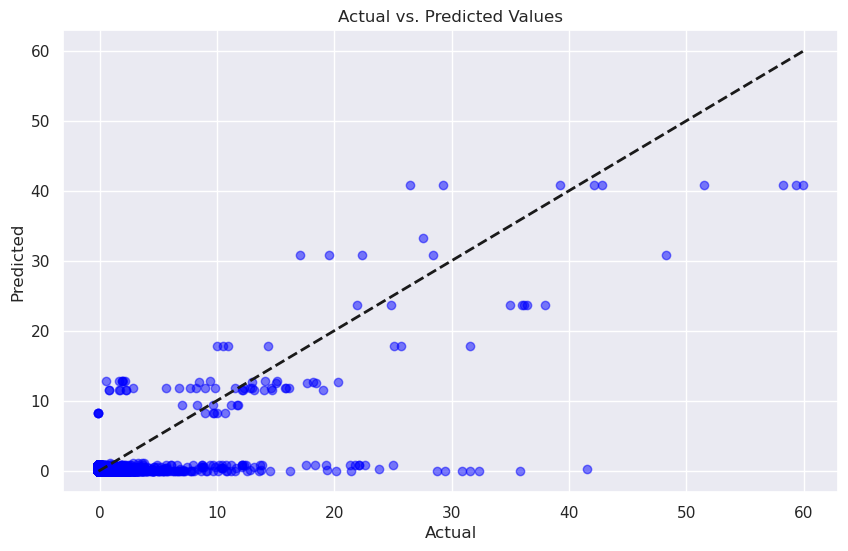

In [141]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# X_train_selected, X_test_selected, y_train, y_test

# Build a new Gradient Boosting model using the selected features
gb_model_selected = GradientBoostingRegressor()
gb_model_selected.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = gb_model_selected.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

Selected Features Interpretation:
reporting_economy_Canada, reporting_economy_Japan, reporting_economy_Mexico: These features represent the reporting economies. It seems that data from these specific countries (Canada, Japan, and Mexico) are deemed important by the model in predicting the target variable 'value'. This could imply that economic activities or trends in these countries have a significant influence on the 'value'.

partner_economy_China, partner_economy_United States of America: These features represent partner economies. It suggests that economic relationships or trade activities with China and the United States of America are influential in predicting the 'value'.

product_sector_Animal products, product_sector_Fruits, vegetables, plants: These features represent different product sectors. The model considers the type of products being traded as significant factors affecting the 'value'.

Relevance of Partner Economies as Selected Features:
It does make sense to include partner economies as selected features, especially in the context of trade or economic data. Economic activities, trade relationships, and policies between countries can have a substantial impact on various economic indicators, including the 'value' being predicted.
Partner economies can provide insights into export-import dynamics, trade agreements, market demand, and geopolitical factors that influence economic performance. Therefore, including partner economies as features can enhance the model's ability to capture the complexity of the economic landscape.

#### 4.3.2 Gradient Boosting Feature Selection Using SHAP Explainer

In [144]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [145]:
import shap
# Initialize the SHAP explainer with the trained model
explainer = shap.TreeExplainer(gb_model)
# Calculate SHAP values for all samples
shap_values = explainer.shap_values(X_train)

In [146]:
# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)

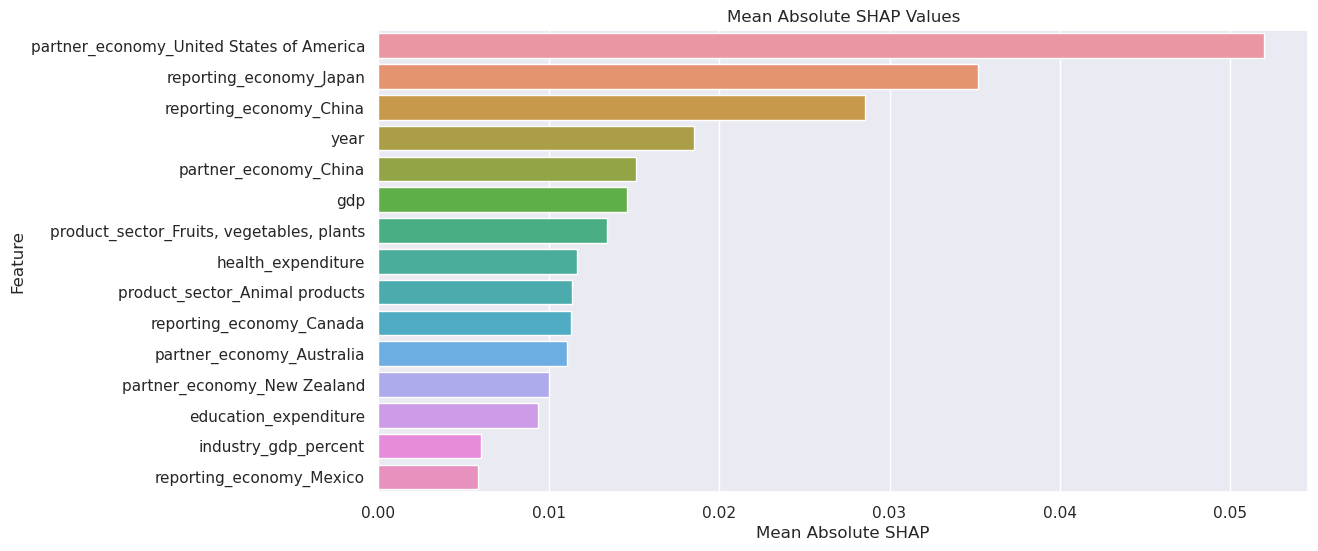

In [147]:
# Calculate mean absolute SHAP values
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

# Create a DataFrame to store mean absolute SHAP values along with feature names
shap_df = pd.DataFrame({'Feature': X_train_df.columns, 'Mean Absolute SHAP': mean_abs_shap_values})

# Sort the DataFrame by mean absolute SHAP values in descending order
shap_df = shap_df.sort_values(by='Mean Absolute SHAP', ascending=False)

# Plot mean absolute SHAP values
plt.figure(figsize=(12, 6))
sns.barplot(x='Mean Absolute SHAP', y='Feature', data=shap_df[:15])
plt.title('Mean Absolute SHAP Values')
plt.xlabel('Mean Absolute SHAP')
plt.ylabel('Feature')
plt.show()

In [148]:
print(shap_df[:15])

                                       Feature  Mean Absolute SHAP
309   partner_economy_United States of America            0.051971
72                     reporting_economy_Japan            0.035204
42                     reporting_economy_China            0.028567
0                                         year            0.018505
165                      partner_economy_China            0.015109
5                                          gdp            0.014594
320  product_sector_Fruits, vegetables, plants            0.013444
16                          health_expenditure            0.011689
318             product_sector_Animal products            0.011366
38                    reporting_economy_Canada            0.011302
138                  partner_economy_Australia            0.011096
251                partner_economy_New Zealand            0.010015
15                       education_expenditure            0.009363
8                         industry_gdp_percent            0.00

partner_economy_United States of America: This feature has the highest mean absolute SHAP value, indicating that it has the most significant impact on the model predictions. This suggests that the economic relationship with the United States is a crucial factor influencing the outcome.

reporting_economy_Japan and reporting_economy_China: These features also have relatively high mean absolute SHAP values, suggesting that economic relationships with Japan and China are important factors in the model predictions.

year and gdp: These features have moderate mean absolute SHAP values, indicating they have a noticeable but not as strong impact on the predictions. The year likely represents temporal trends, while GDP reflects economic performance, both of which are commonly influential factors.

partner_economy_China, product_sector_Fruits, vegetables, plants, health_expenditure, product_sector_Animal products, and reporting_economy_Canada: These features have moderate to low mean absolute SHAP values, suggesting they have some impact on the predictions but less so than the top features mentioned earlier.

partner_economy_Australia, partner_economy_New Zealand, education_expenditure, reporting_economy_Mexico, and industry_gdp_percent: These features have relatively low mean absolute SHAP values, indicating they have minimal impact on the model predictions compared to other features.

Interpreting these results, it seems that economic relationships with specific countries (e.g., the United States, Japan, China) are crucial in determining the outcome, followed by other economic indicators such as GDP, industry contribution to GDP, and expenditure on health and education. The significance of these features suggests they play a vital role in the model's decision-making process.

Mean Squared Error (MSE) on the test set: 0.4453113205989701
R^2 score on the test set: 0.5537102346381756


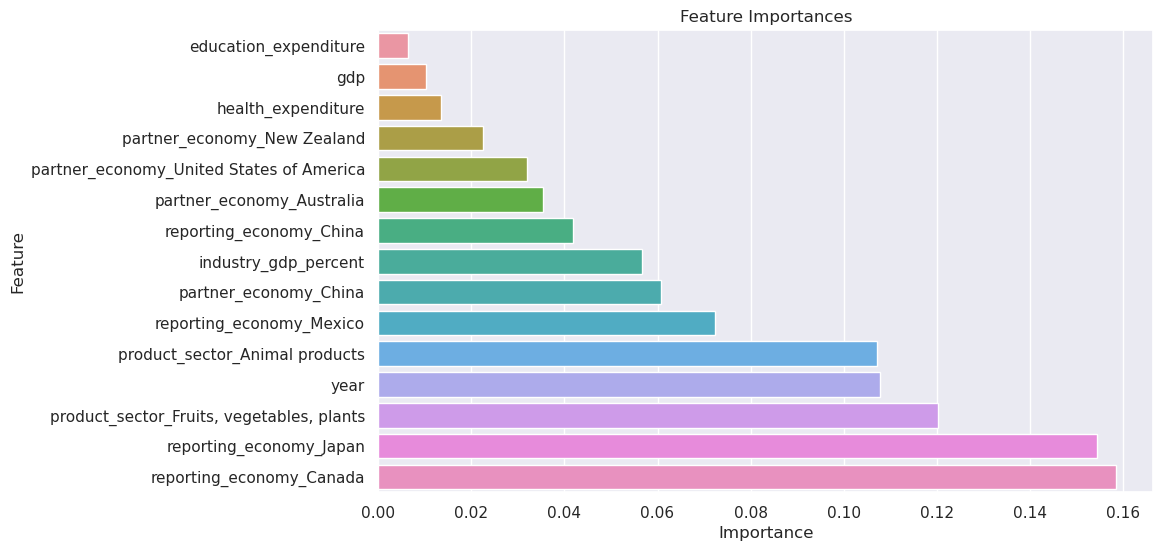

In [150]:
# Select the features based on the SHAP analysis
selected_features = [
    'partner_economy_United States of America', 
    'reporting_economy_Japan', 
    'reporting_economy_China', 
    'year', 
    'gdp', 
    'partner_economy_China', 
    'product_sector_Fruits, vegetables, plants', 
    'health_expenditure', 
    'product_sector_Animal products', 
    'reporting_economy_Canada', 
    'partner_economy_Australia', 
    'partner_economy_New Zealand', 
    'education_expenditure', 
    'reporting_economy_Mexico', 
    'industry_gdp_percent'
]

# Create a new DataFrame with the selected features
X_selected = X_train_df[selected_features]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_train, test_size=0.2, random_state=42)

# Train a new model with the selected features
from sklearn.ensemble import RandomForestRegressor
selected_model = RandomForestRegressor(random_state=42)
selected_model.fit(X_train_sel, y_train_sel)

# Make predictions on the test set
y_pred_sel = selected_model.predict(X_test_sel)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse_sel = mean_squared_error(y_test_sel, y_pred_sel)
r2_sel = r2_score(y_test_sel, y_pred_sel)

print("Mean Squared Error (MSE) on the test set:", mse_sel)
print("R^2 score on the test set:", r2_sel)

# Visualize the feature importances of the selected model
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = selected_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=X_selected.columns[sorted_idx])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### 4.3.3 Feature Selection for Random Forest

In [152]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [153]:
# Feature selection
k = 50   # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [154]:
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_selected, y_train)

RandomForestRegressor()

### 4.3.4 Random Forest Feature Selection using Recursive Feature Elimination (RFE)

In [156]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

# Reduce the dataset size by using a sample
sample_size = 10000  # Adjust as needed
X_train_sample = X_train.sample(n=sample_size, random_state=42)
y_train_sample = y_train.sample(n=sample_size, random_state=42)

# Initialize RFE with a simpler model
dt_model = DecisionTreeRegressor()  # You can use a simpler model
rfe = RFE(estimator=dt_model, n_features_to_select= 15)

# Fit RFE on the sample
rfe.fit(X_train_sample, y_train_sample)

# Transform the features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Get the selected feature indices
selected_feature_indices = np.where(rfe.support_)[0]

# Use the selected feature indices to retrieve their names
selected_feature_names = np.array(feature_names)[selected_feature_indices]

# Print selected feature names
print("Selected Features:", selected_feature_names)

Selected Features: ['feature_2' 'feature_5' 'feature_9' 'feature_12' 'feature_20'
 'feature_39' 'feature_43' 'feature_73' 'feature_89' 'feature_139'
 'feature_154' 'feature_166' 'feature_252' 'feature_297' 'feature_310']


Mean Squared Error: 0.8804639194333098
R-squared: 0.2152339529805476


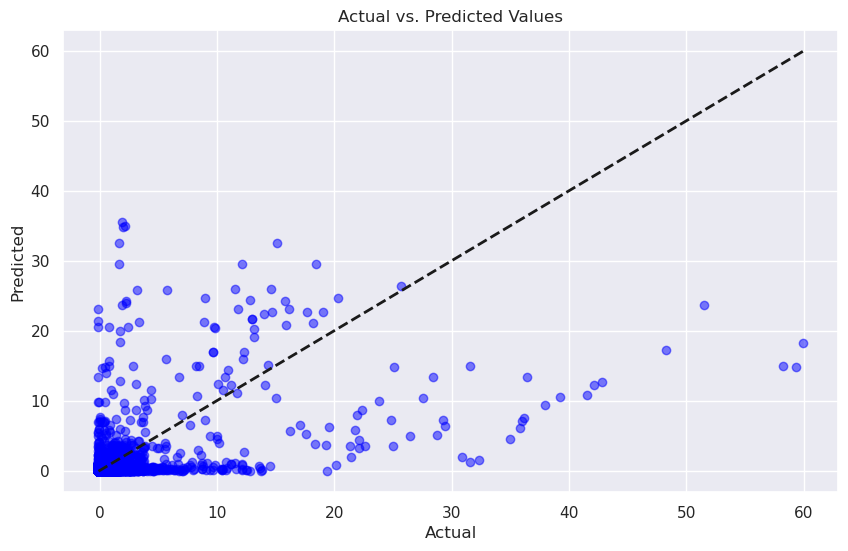

In [157]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Build a new Random Forest model using the selected features
rf_model_selected = RandomForestRegressor()
rf_model_selected.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = rf_model_selected.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

### 4.3.5 Random Forest Feature Selection using Feature Importance 

In [159]:
# Get feature importances
feature_importance = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importance.argsort()[::-1]

# Select the top k features
k = 15  
top_k_indices = sorted_indices[:k]

# Get the names of the top k features
selected_feature_names = X_train.columns[top_k_indices]
print("Selected Features:", selected_feature_names)

# Transform the features
X_train_selected = X_train.iloc[:, top_k_indices]
X_test_selected = X_test.iloc[:, top_k_indices]

Selected Features: Index(['reporting_economy_Cuba', 'reporting_economy_Albania',
       'reporting_economy_Bangladesh', 'reporting_economy_Cyprus',
       'reporting_economy_Botswana', 'reporting_economy_Dominica',
       'reporting_economy_Chad', 'reporting_economy_Angola',
       'reporting_economy_Cambodia', 'reporting_economy_Croatia', 'net_trade',
       'year', 'agriculture_gdp_percent', 'reporting_economy_China',
       'health_gdp_percent'],
      dtype='object')


Mean Squared Error: 1.0966605260031272
R-squared: 0.02253581672299898


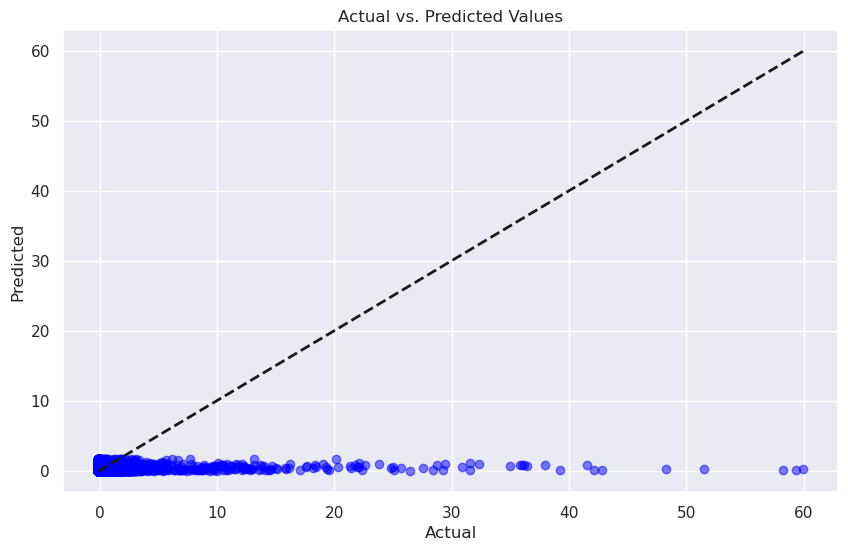

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Build a new Random Forest model using the selected features
rf_model_selected = RandomForestRegressor()
rf_model_selected.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = rf_model_selected.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

Limited Impact of Removed Features: The features  removed might not have had a significant impact on the model's performance in the first place. Random Forests are already robust to irrelevant features to some extent, so removing them might not yield a big improvement.

Interaction Effects: It's possible that some relevant features only become informative when combined with others. Feature selection techniques that remove individual features might miss these interaction effects. Random Forests, on the other hand, can capture these interactions through their decision tree structure.

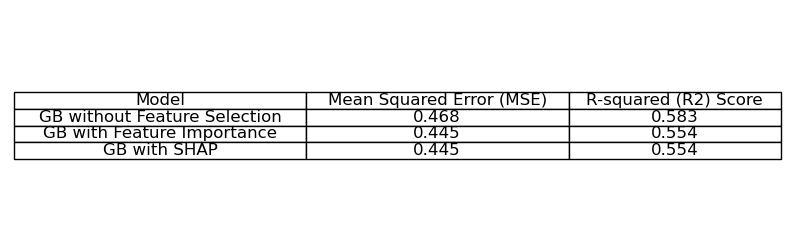

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Model': ['GB without Feature Selection', 'GB with Feature Importance', 'GB with SHAP'],
    'Mean Squared Error (MSE)': [0.468, 0.445, 0.445],
    'R-squared (R2) Score': [0.583, 0.554, 0.554]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(figsize=(10, 3)) # set size frame

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Show plot
plt.show()


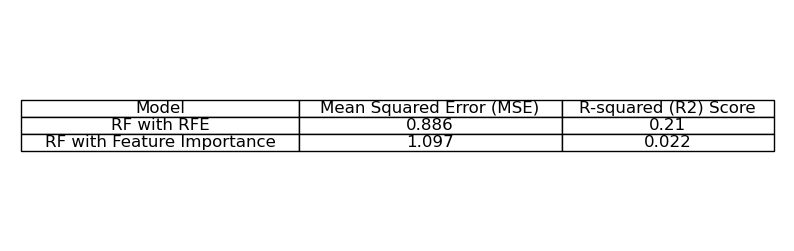

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Model': ['RF with RFE', 'RF with Feature Importance'],
    'Mean Squared Error (MSE)': [0.886, 1.097],
    'R-squared (R2) Score': [0.210, 0.022]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(figsize=(10, 3)) # set size frame

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Show plot
plt.show()


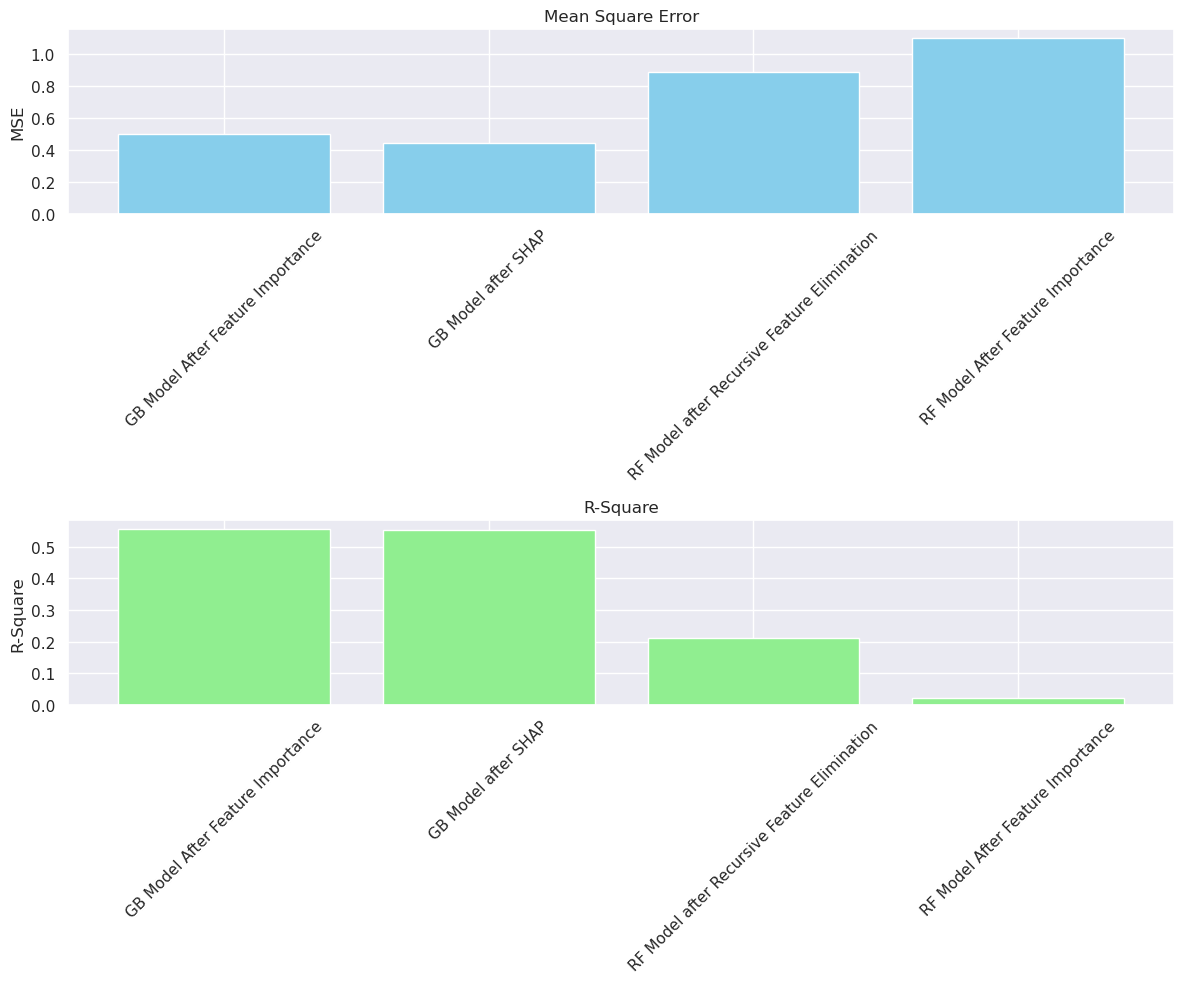

In [162]:
import matplotlib.pyplot as plt

# Data
models = ['GB Model After Feature Importance', 'GB Model after SHAP',
          'RF Model after Recursive Feature Elimination', 'RF Model After Feature Importance']
mse = [0.4985926305554118, 0.4453113205989701, 0.8845534891042769, 1.0964661044304187]
r_square = [0.5555995434704035, 0.5537102346381756, 0.21158887979371999, 0.022709106559983927]

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 10))  # Adjusted figure size

# Plot Mean Square Error
ax[0].bar(models, mse, color='skyblue')
ax[0].set_title('Mean Square Error')
ax[0].set_ylabel('MSE')
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot R-Square
ax[1].bar(models, r_square, color='lightgreen')
ax[1].set_title('R-Square')
ax[1].set_ylabel('R-Square')
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Show plot
plt.tight_layout()
plt.show()


### 5.0 Optimising Both Models Using Optuna

#### 5.1 Optimize the Gradient Boosting Regressor (GBR) model

In [223]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Perform feature selection on the entire dataset
selector = SelectKBest(score_func=f_regression, k=30)
X_selected = selector.fit_transform(X, y)

In [224]:
# Split the data into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)
X_test_selected = selector.transform(X_test)

In [225]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [226]:
import optuna
# Define the objective function for Optuna
def objective_gb(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 3, 7)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.09)

    gb_model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    gb_model.fit(X_train, y_train)
    score = gb_model.score(X_val, y_val)
    return score

In [227]:
# Create the Optuna study and optimize the hyperparameters
study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective_gb, n_trials=10)
# Get the best hyperparameters and model
best_gb_params = study_gb.best_params
best_gb_model = GradientBoostingRegressor(**best_gb_params, random_state=42)
best_gb_model.fit(X_train, y_train)# 2137 seconds

[I 2024-05-28 20:46:28,555] A new study created in memory with name: no-name-df39cbea-7139-40ba-84a8-bfc31052ac54
[I 2024-05-28 21:01:59,636] Trial 0 finished with value: 0.4964926991019404 and parameters: {'n_estimators': 257, 'max_depth': 4, 'learning_rate': 0.08393069219727343}. Best is trial 0 with value: 0.4964926991019404.
[I 2024-05-28 21:07:04,450] Trial 1 finished with value: 0.42646869151483013 and parameters: {'n_estimators': 108, 'max_depth': 3, 'learning_rate': 0.040642463592285565}. Best is trial 0 with value: 0.4964926991019404.
[I 2024-05-28 21:24:45,732] Trial 2 finished with value: 0.20871897369427483 and parameters: {'n_estimators': 175, 'max_depth': 7, 'learning_rate': 0.08628940674174285}. Best is trial 0 with value: 0.4964926991019404.
[I 2024-05-28 21:49:41,842] Trial 3 finished with value: 0.31345455688919 and parameters: {'n_estimators': 292, 'max_depth': 6, 'learning_rate': 0.05030135647549998}. Best is trial 0 with value: 0.4964926991019404.
[I 2024-05-28 21:

GradientBoostingRegressor(learning_rate=0.08393069219727343, max_depth=4,
                          n_estimators=257, random_state=42)

In [228]:
############################################################################################################

#### 5.2 Optimize the Random Forest Regressor (RFR) model

In [230]:
# Define the objective function for Optuna
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 150)
    max_depth = trial.suggest_int('max_depth', 3, 7)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 7)

    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
    rf_model.fit(X_train, y_train)
    score = rf_model.score(X_val, y_val)
    return score

In [231]:
# Create the Optuna study and optimize the hyperparameters
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=20) # 1076 seconds

[I 2024-05-28 23:23:47,255] A new study created in memory with name: no-name-86ad083d-7e09-4fc5-b4e5-f4dfd256174b
[I 2024-05-28 23:26:19,447] Trial 0 finished with value: 0.31831473774695407 and parameters: {'n_estimators': 88, 'max_depth': 3, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.31831473774695407.
[I 2024-05-28 23:31:35,745] Trial 1 finished with value: 0.46889954677457024 and parameters: {'n_estimators': 112, 'max_depth': 5, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.46889954677457024.
[I 2024-05-28 23:39:17,457] Trial 2 finished with value: 0.486120888619729 and parameters: {'n_estimators': 147, 'max_depth': 6, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.486120888619729.
[I 2024-05-28 23:44:17,752] Trial 3 finished with value: 0.4175922321419513 and parameters: {'n_estimators': 131, 'max_depth': 4, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.486120888619729.
[I 2024-05-28 23:47:37,055] Trial 4 finished with value: 0.31762631209183834 a

In [232]:
# Get the best hyperparameters and model
best_rf_params = study_rf.best_params
best_rf_model = RandomForestRegressor(**best_rf_params, random_state=42)
best_rf_model.fit(X_train, y_train)# 55 Seconds

RandomForestRegressor(max_depth=7, min_samples_leaf=7, n_estimators=65,
                      random_state=42)

#### Create the new ensemble model

In [234]:
from sklearn.ensemble import VotingRegressor

# Create the ensemble model
ensemble_model = VotingRegressor([('gb', best_gb_model), ('rf', best_rf_model)])
ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test_selected)

#### Evaluate the models

In [236]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions for individual models
gb_pred = best_gb_model.predict(X_test_selected)
rf_pred = best_rf_model.predict(X_test_selected)

In [237]:
# Evaluation metrics
mse_gb = mean_squared_error(y_test, gb_pred)
r2_gb = r2_score(y_test, gb_pred)
mae_gb = mean_absolute_error(y_test, gb_pred)

mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)
mae_rf = mean_absolute_error(y_test, rf_pred)

mse_ensemble = mean_squared_error(y_test, ensemble_pred)
r2_ensemble = r2_score(y_test, ensemble_pred)
mae_ensemble = mean_absolute_error(y_test, ensemble_pred)

In [238]:
# Print the evaluation metrics
print("Gradient Boosting Model:")
print("Mean Squared Error (MSE):", mse_gb)
print("R-squared (R2) Score:", r2_gb)
print("Mean Absolute Error (MAE):", mae_gb)

print("Random Forest Model:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2) Score:", r2_rf)
print("Mean Absolute Error (MAE):", mae_rf)

print("Ensemble Model:")
print("Mean Squared Error (MSE):", mse_ensemble)
print("R-squared (R2) Score:", r2_ensemble)
print("Mean Absolute Error (MAE):", mae_ensemble)

Gradient Boosting Model:
Mean Squared Error (MSE): 0.564907227186657
R-squared (R2) Score: 0.4964926991019404
Mean Absolute Error (MAE): 0.11470407566067901
Random Forest Model:
Mean Squared Error (MSE): 0.5450903976720398
R-squared (R2) Score: 0.5141556318120665
Mean Absolute Error (MAE): 0.11600187726593375
Ensemble Model:
Mean Squared Error (MSE): 0.5419743719348727
R-squared (R2) Score: 0.516932975830594
Mean Absolute Error (MAE): 0.11300163117122482


/tmp/ipykernel_120/1327207445.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models, rotation=45, ha='right')


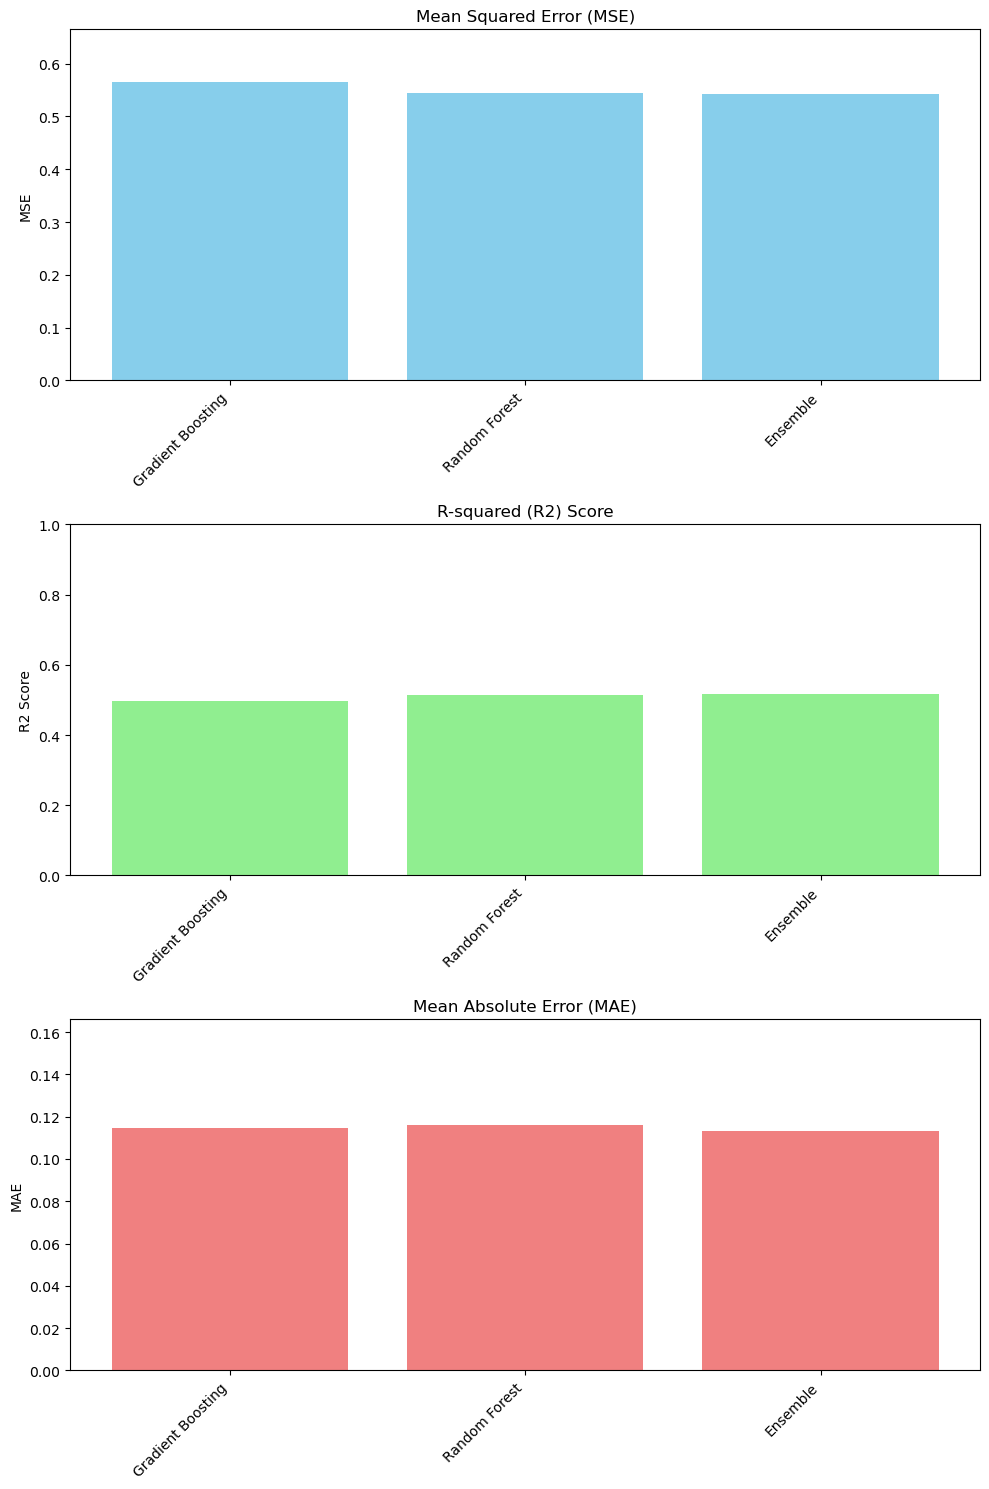

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Gradient Boosting', 'Random Forest', 'Ensemble']
mse = [0.564907227186657, 0.5450903976720398, 0.5419743719348727]
r2 = [0.4964926991019404, 0.5141556318120665, 0.516932975830594]
mae = [0.11470407566067901, 0.11600187726593375, 0.11300163117122482]

# Set up the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# MSE Plot
axs[0].bar(models, mse, color='skyblue')
axs[0].set_title('Mean Squared Error (MSE)')
axs[0].set_ylabel('MSE')
axs[0].set_ylim(0, max(mse) + 0.1)

# R2 Plot
axs[1].bar(models, r2, color='lightgreen')
axs[1].set_title('R-squared (R2) Score')
axs[1].set_ylabel('R2 Score')
axs[1].set_ylim(0, 1)

# MAE Plot
axs[2].bar(models, mae, color='lightcoral')
axs[2].set_title('Mean Absolute Error (MAE)')
axs[2].set_ylabel('MAE')
axs[2].set_ylim(0, max(mae) + 0.05)

# Rotate x-axis labels for better readability
for ax in axs:
    ax.set_xticklabels(models, rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

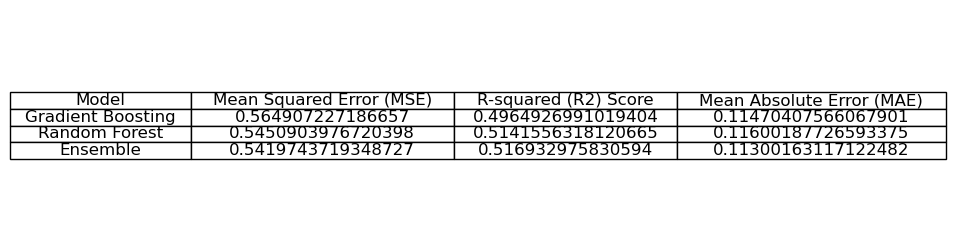

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Model': ['Gradient Boosting', 'Random Forest', 'Ensemble'],
    'Mean Squared Error (MSE)': [0.564907227186657, 0.5450903976720398, 0.5419743719348727],
    'R-squared (R2) Score': [0.4964926991019404, 0.5141556318120665, 0.516932975830594],
    'Mean Absolute Error (MAE)': [0.11470407566067901, 0.11600187726593375, 0.11300163117122482]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(figsize=(10, 3)) # set size frame

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Show plot
plt.show()

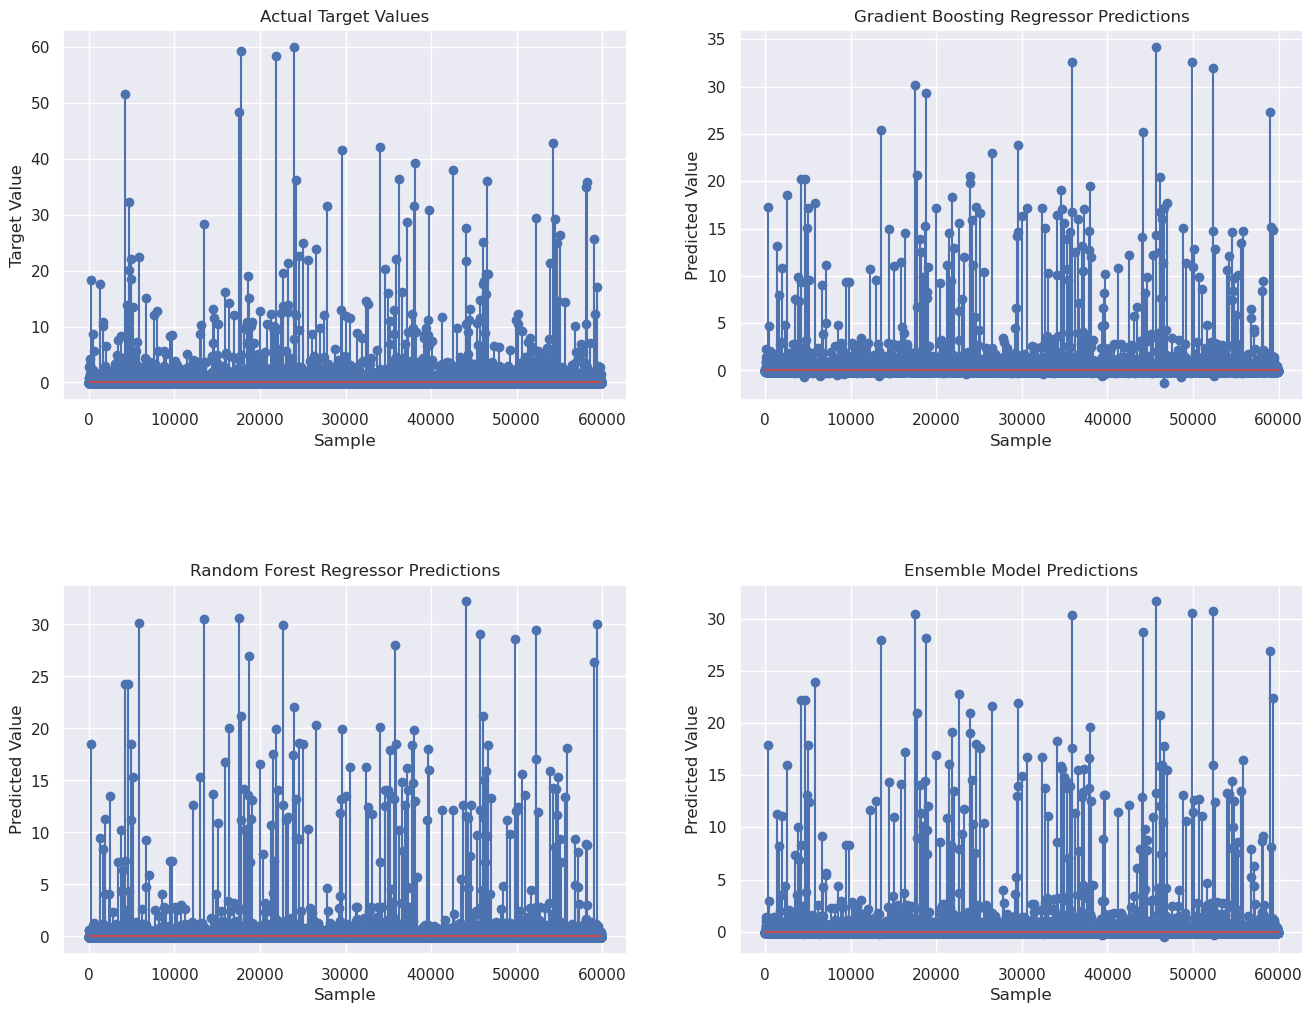

In [239]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Actual target values
axes[0, 0].stem(range(len(y_test)), y_test, label='Actual')
axes[0, 0].set_title('Actual Target Values')
axes[0, 0].set_xlabel('Sample')
axes[0, 0].set_ylabel('Target Value')

# Gradient Boosting Regressor predictions
axes[0, 1].stem(range(len(y_test)), gb_pred, label='Gradient Boosting')
axes[0, 1].set_title('Gradient Boosting Regressor Predictions')
axes[0, 1].set_xlabel('Sample')
axes[0, 1].set_ylabel('Predicted Value')

# Random Forest Regressor predictions
axes[1, 0].stem(range(len(y_test)), rf_pred, label='Random Forest')
axes[1, 0].set_title('Random Forest Regressor Predictions')
axes[1, 0].set_xlabel('Sample')
axes[1, 0].set_ylabel('Predicted Value')

# Ensemble model predictions
axes[1, 1].stem(range(len(y_test)), ensemble_pred, label='Ensemble')
axes[1, 1].set_title('Ensemble Model Predictions')
axes[1, 1].set_xlabel('Sample')
axes[1, 1].set_ylabel('Predicted Value')

plt.subplots_adjust(hspace=0.5)
plt.show()

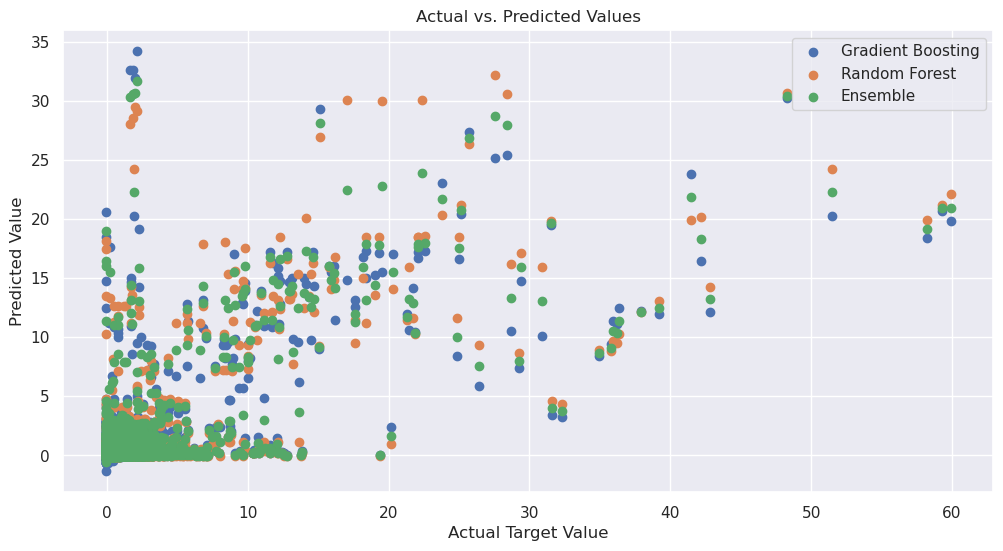

In [241]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(y_test, gb_pred, label='Gradient Boosting')
ax.scatter(y_test, rf_pred, label='Random Forest')
ax.scatter(y_test, ensemble_pred, label='Ensemble')

ax.set_xlabel('Actual Target Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Actual vs. Predicted Values')
ax.legend()

plt.show()

### 5.3 Using Hyperparameter Tuning for Both Models

In [2]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint
import matplotlib.pyplot as plt

In [4]:
from sklearn.compose import ColumnTransformer

In [5]:
# Load the dataset
subset_data = pd.read_csv("subset_data.csv")

# Split data into features (X) and target variable (y)
X = subset_data.drop(columns=['value'])
y = subset_data['value']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Define categorical features
categorical_features = ['reporting_economy', 'partner_economy', 'product_sector']

# Define preprocessing steps for categorical variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for all features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])



In [38]:
# Feature selection using RFE
rfe = RFE(estimator=GradientBoostingRegressor(random_state=42), n_features_to_select=10)
X_train_selected = rfe.fit_transform(preprocessor.fit_transform(X_train), y_train)
X_test_selected = rfe.transform(preprocessor.transform(X_test))

In [39]:
# Hyperparameter tuning for Random Forest using RandomizedSearchCV
rf_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_samples_leaf': randint(2, 10),
    'max_features': ['sqrt', 'log2']
}
rf_model = RandomForestRegressor(random_state=42)
rf_random_search = RandomizedSearchCV(rf_model, param_distributions=rf_param_dist, cv=5, scoring='neg_mean_squared_error', n_iter=10, verbose=2)
rf_random_search.fit(X_train_selected, y_train)
rf_best_model = rf_random_search.best_estimator_

# Hyperparameter tuning for Gradient Boosting using GridSearchCV
gb_param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=9, max_features=log2, min_samples_leaf=6, n_estimators=478; total time=  58.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=6, n_estimators=478; total time=  58.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=6, n_estimators=478; total time=  59.4s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=6, n_estimators=478; total time=  58.7s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=6, n_estimators=478; total time=  57.6s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=9, n_estimators=506; total time=  59.3s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=9, n_estimators=506; total time=  58.3s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=9, n_estimators=506; total time=  59.5s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=9, n_estimators=506; total time=  59.2s
[CV] END max_depth=9, max_features=log2, min_samples_leaf

In [61]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
gb_grid_search.fit(X_train_selected, y_train)
gb_best_model = gb_grid_search.best_estimator_



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   9.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=  12.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   9.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   9.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   9.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=  17.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=  18.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=  19.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=  17.8s
[CV] END learning_rate=0.01, max_depth=

In [63]:
# Ensemble model
ensemble_model = VotingRegressor([('rf', rf_best_model), ('gb', gb_best_model)])
ensemble_model.fit(X_train_selected, y_train)



VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=9,
                                                   max_features='log2',
                                                   min_samples_leaf=6,
                                                   n_estimators=478,
                                                   random_state=42)),
                            ('gb',
                             GradientBoostingRegressor(max_depth=5,
                                                       n_estimators=200,
                                                       random_state=42))])

Random Forest Model MSE: 0.31375401967072464
Random Forest Model R-squared: 0.7203479934624304
Gradient Boosting Model MSE: 0.24238082518885218
Gradient Boosting Model R-squared: 0.783963615250476
Ensemble Model MSE: 0.25375098618664205
Ensemble Model R-squared: 0.773829280267217


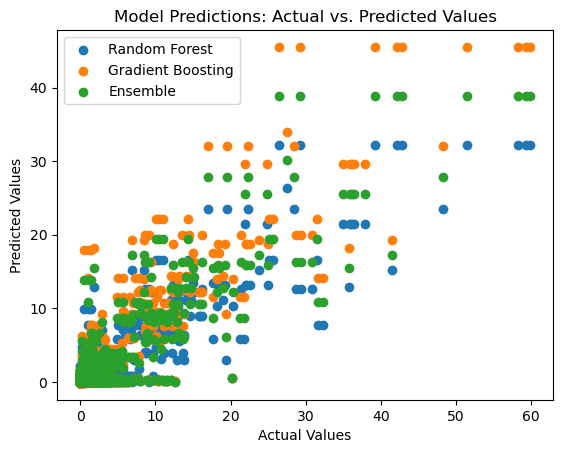

In [64]:
# Predictions
rf_predictions = rf_best_model.predict(X_test_selected)
gb_predictions = gb_best_model.predict(X_test_selected)
ensemble_predictions = ensemble_model.predict(X_test_selected)

# Calculate MSE and R-squared
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)

rf_r2 = r2_score(y_test, rf_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

print("Random Forest Model MSE:", rf_mse)
print("Random Forest Model R-squared:", rf_r2)
print("Gradient Boosting Model MSE:", gb_mse)
print("Gradient Boosting Model R-squared:", gb_r2)
print("Ensemble Model MSE:", ensemble_mse)
print("Ensemble Model R-squared:", ensemble_r2)

# Visualize predictions
plt.scatter(y_test, rf_predictions, label='Random Forest')
plt.scatter(y_test, gb_predictions, label='Gradient Boosting')
plt.scatter(y_test, ensemble_predictions, label='Ensemble')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions: Actual vs. Predicted Values")
plt.legend()
plt.show()

Analysis:
Gradient Boosting is generally more consistent and accurate for lower actual values, as indicated by the tighter clustering of orange dots.
Random Forest shows a broader spread, suggesting it might be less reliable for precise predictions, especially at higher actual values.
The Ensemble method, combining both models, appears to mitigate some of the extremes seen in the individual models, potentially offering a more robust prediction across a wider range of values.


In [68]:
import joblib

In [70]:
# Save the models
joblib.dump(rf_best_model, 'rf_best_model.joblib')
joblib.dump(gb_best_model, 'gb_best_model.joblib')
joblib.dump(ensemble_model, 'ensemble_model.joblib')


['ensemble_model.joblib']

In [72]:
# Load the models
rf_best_model = joblib.load('rf_best_model.joblib')
gb_best_model = joblib.load('gb_best_model.joblib')
ensemble_model = joblib.load('ensemble_model.joblib')


In [74]:
# Make a single value prediction
input_sample = X_test.iloc[0].to_frame().T
input_sample_selected = rfe.transform(preprocessor.transform(input_sample))
actual_value = y_test.iloc[0]

In [81]:
rf_prediction = rf_best_model.predict(input_sample_selected)[0]
gb_prediction = gb_best_model.predict(input_sample_selected)[0]
ensemble_prediction = ensemble_model.predict(input_sample_selected)[0]

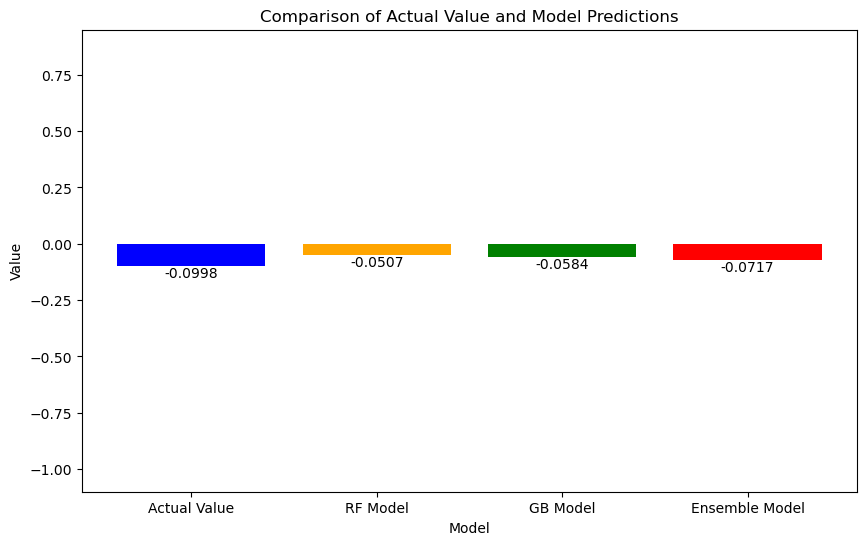

In [78]:
import matplotlib.pyplot as plt

# Data
models = ['Actual Value', 'RF Model', 'GB Model', 'Ensemble Model']
predictions = [actual_value, rf_prediction, gb_prediction, -0.07168624303976359]  

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, predictions, color=['blue', 'orange', 'green', 'red'])

# Labels and title
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Comparison of Actual Value and Model Predictions')

# Adjust y-axis limit for better visualization, accounting for negative values
plt.ylim(min(predictions) - 1, max(predictions) + 1)

# Adding value labels on the bars
for bar, value in zip(bars, predictions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.4f}', ha='center', va='bottom' if value >= 0 else 'top')

# Show plot
plt.show()

Prediction Accuracy: From Figure 20 it can be observed that the actual value is -0.099774, while the predictions from the models are -0.049233 (RF Model), -0.054139 (GB Model), and -0.071686 (Ensemble Model). The ensemble model provides a prediction closer to the actual value compared to the individual models. This indicates that the ensemble approach has effectively reduced the error, demonstrating its capability to provide more accurate predictions by leveraging the diverse strengths of the constituent models. However, all models still have some degree of prediction error, with the ensemble model showing the least deviation from the actual value.

## 6.0 Sector Specific Analysis

In [131]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [132]:
import shap
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [133]:
# Function to segment data based on product_sector
def segment_data_by_sector(data, sector):
    return data[data['product_sector'] == sector]

In [134]:
# Function to identify influential features using SHAP values for Gradient Boosting
def shap_feature_importance_gb(X, y):
    shap.initjs()
    explainer = shap.Explainer(gb_best_model)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X, plot_type="bar")

In [135]:
# Iterate over selected sectors and perform analysis
selected_sectors = ['Animal products']
for sector in selected_sectors:
    print(f"\nAnalyzing sector: {sector}")
    sector_data = segment_data_by_sector(subset_data, sector)


Analyzing sector: Animal products


In [136]:
 # Perform one-hot encoding for categorical variables
categorical_columns = ['reporting_economy', 'partner_economy', 'product_sector']
sector_data_encoded = pd.get_dummies(sector_data, columns=categorical_columns)
    
X_sector = sector_data_encoded.drop(columns=['value'])
y_sector = sector_data_encoded['value']

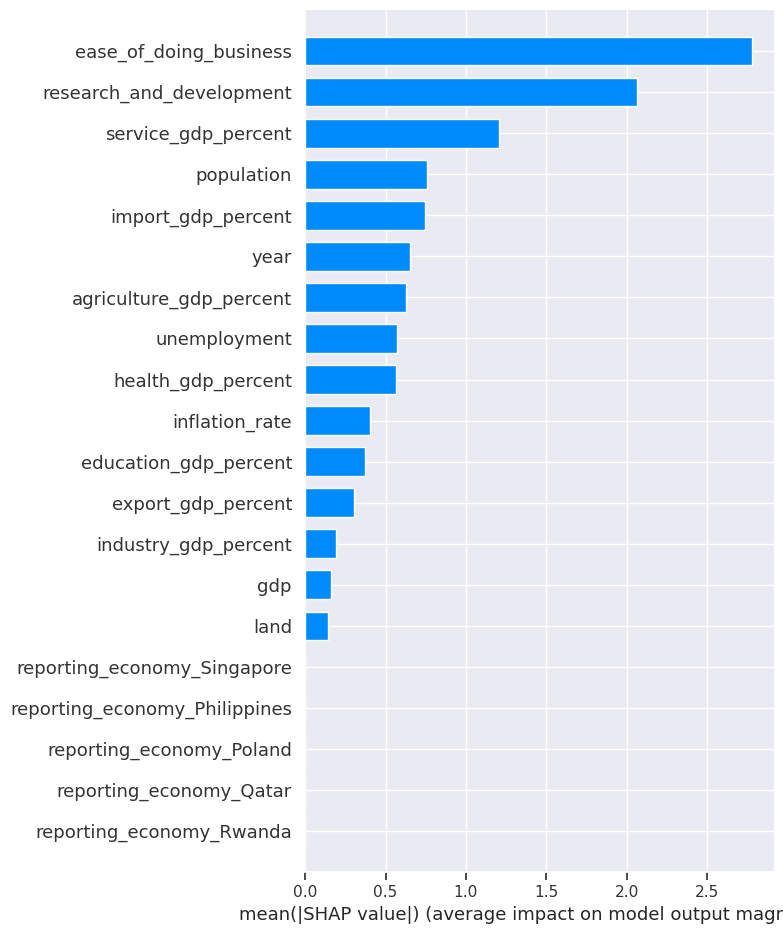

In [137]:
# Perform feature importance analysis
shap_feature_importance_gb(X_sector, y_sector)

### 6.1 Dairy Products


Analyzing sector: Dairy products


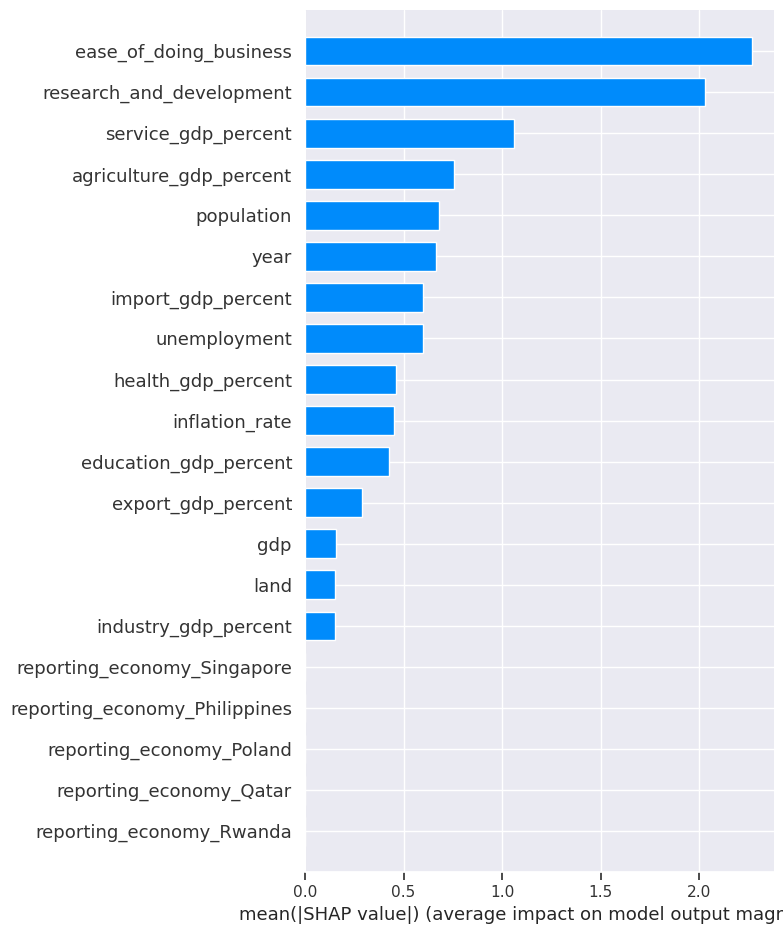

In [139]:
# Iterate over selected sectors and perform analysis
selected_sectors = ['Dairy products']
for sector in selected_sectors:
    print(f"\nAnalyzing sector: {sector}")
    sector_data = segment_data_by_sector(subset_data, sector)

 # Perform one-hot encoding for categorical variables
categorical_columns = ['reporting_economy', 'partner_economy', 'product_sector']
sector_data_encoded = pd.get_dummies(sector_data, columns=categorical_columns)
    
X_sector = sector_data_encoded.drop(columns=['value'])
y_sector = sector_data_encoded['value']

# Perform feature importance analysis
shap_feature_importance_gb(X_sector, y_sector)

### 6.2 Fruit Vegetable Plants


Analyzing sector: Fruits, vegetables, plants


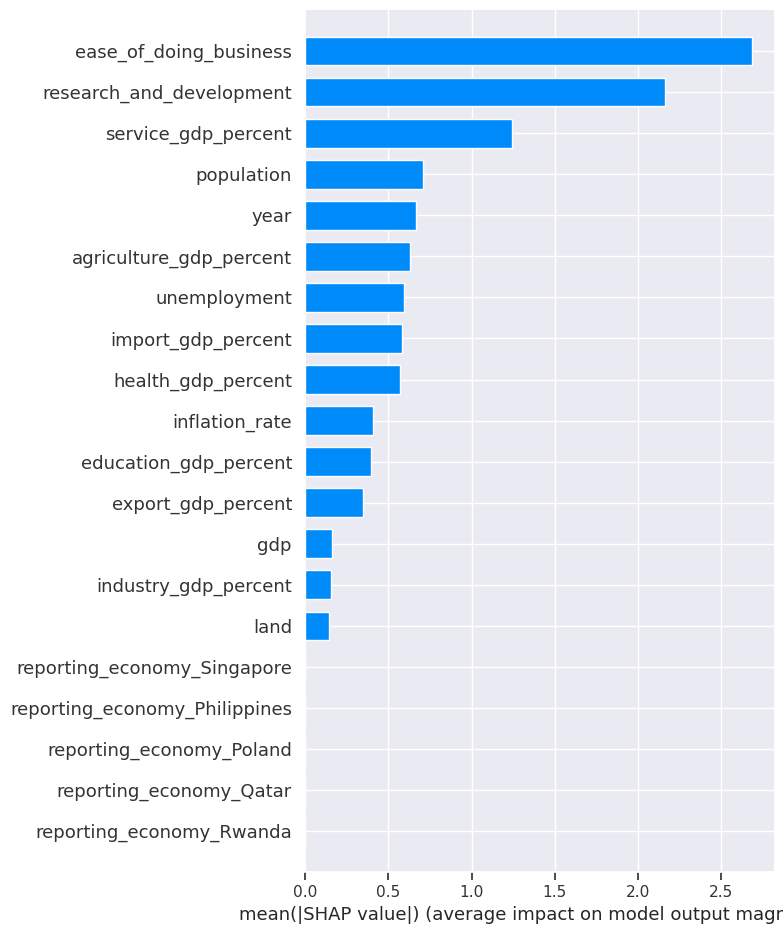

In [141]:
# Iterate over selected sectors and perform analysis
selected_sectors = ['Fruits, vegetables, plants']
for sector in selected_sectors:
    print(f"\nAnalyzing sector: {sector}")
    sector_data = segment_data_by_sector(subset_data, sector)

 # Perform one-hot encoding for categorical variables
categorical_columns = ['reporting_economy', 'partner_economy', 'product_sector']
sector_data_encoded = pd.get_dummies(sector_data, columns=categorical_columns)
    
X_sector = sector_data_encoded.drop(columns=['value'])
y_sector = sector_data_encoded['value']

# Perform feature importance analysis
shap_feature_importance_gb(X_sector, y_sector)

### 6.3 Other Agriculture Products


Analyzing sector: Other agricultural products


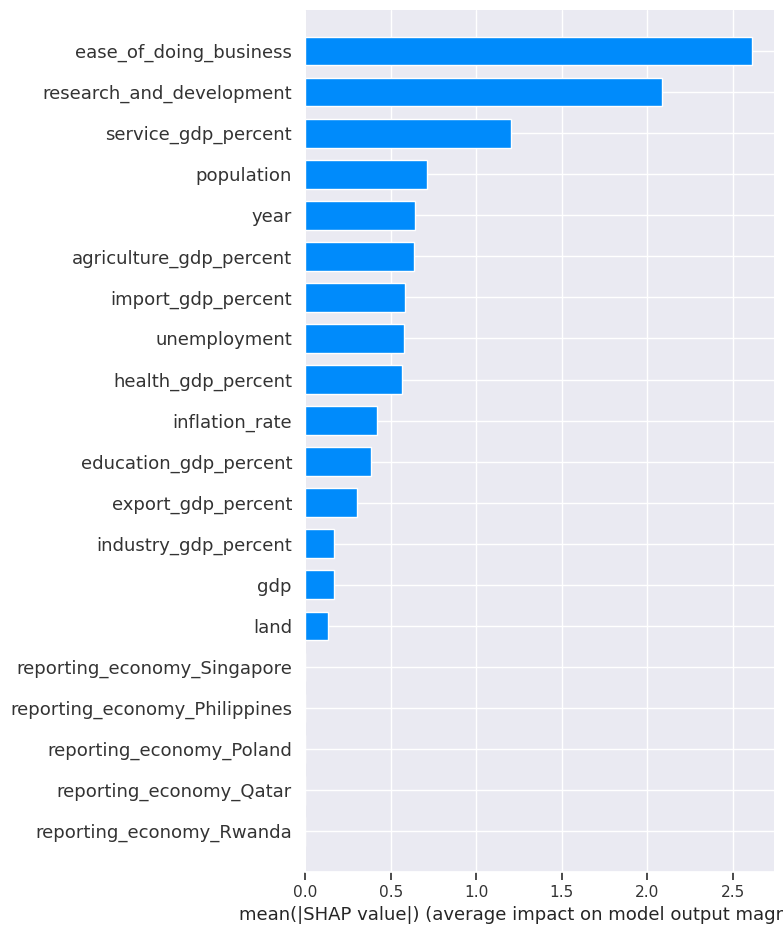

In [143]:
# Iterate over selected sectors and perform analysis
selected_sectors = ['Other agricultural products']
for sector in selected_sectors:
    print(f"\nAnalyzing sector: {sector}")
    sector_data = segment_data_by_sector(subset_data, sector)

 # Perform one-hot encoding for categorical variables
categorical_columns = ['reporting_economy', 'partner_economy', 'product_sector']
sector_data_encoded = pd.get_dummies(sector_data, columns=categorical_columns)
    
X_sector = sector_data_encoded.drop(columns=['value'])
y_sector = sector_data_encoded['value']

# Perform feature importance analysis
shap_feature_importance_gb(X_sector, y_sector)

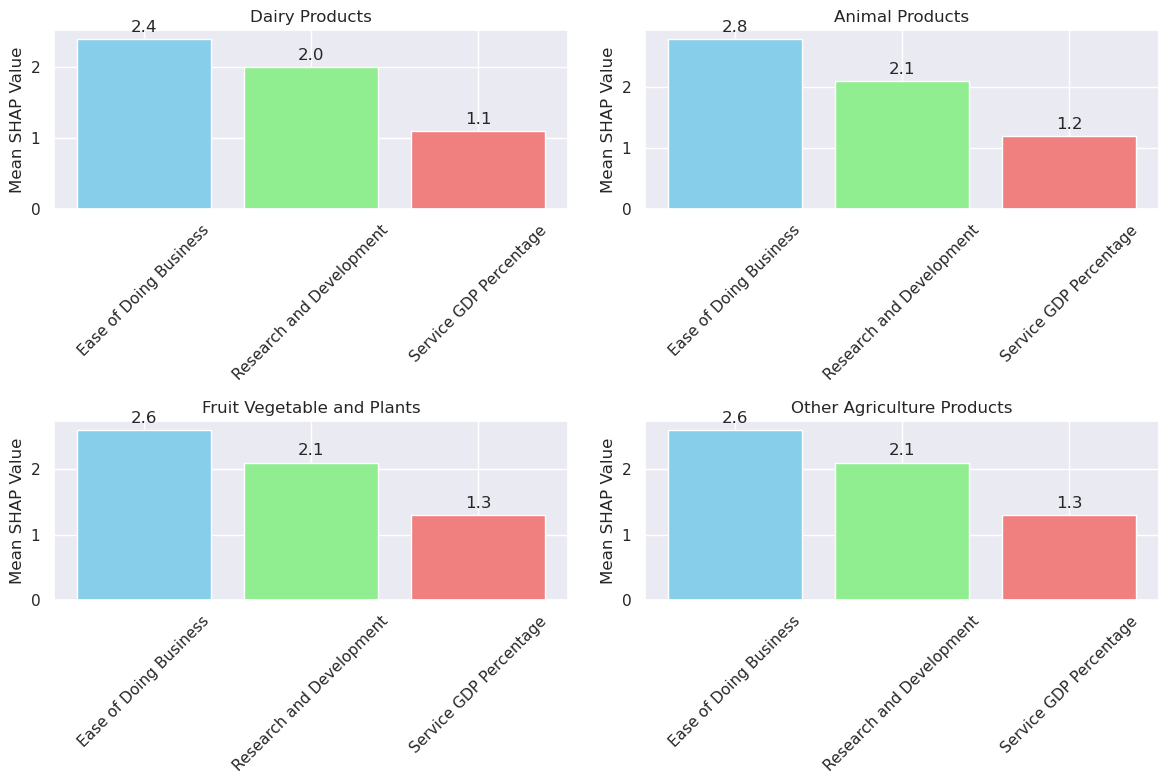

In [144]:
import matplotlib.pyplot as plt

# Data
sectors = ['Dairy Products', 'Animal Products', 'Fruit Vegetable and Plants', 'Other Agriculture Products']
economic_factors = ['Ease of Doing Business', 'Research and Development', 'Service GDP Percentage']
mean_shap_values = {
    'Dairy Products': [2.4, 2.0, 1.1],
    'Animal Products': [2.8, 2.1, 1.2],
    'Fruit Vegetable and Plants': [2.6, 2.1, 1.3],
    'Other Agriculture Products': [2.6, 2.1, 1.3]
}

# Create subplots for each sector
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot for each sector
for i, sector in enumerate(sectors):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    bars = ax.bar(economic_factors, mean_shap_values[sector], color=['skyblue', 'lightgreen', 'lightcoral'])
    ax.set_title(sector)
    ax.set_ylabel('Mean SHAP Value')
    
    # Add data labels
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Rotate x-axis labels
for ax in axs.flat:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()